# 分析

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import scienceplots
import numpy as np
# from .utils import plot_utils

font1 = {'family': 'Times New Roman',
        'weight': 'normal',
        'size': 18,
        }
font2 = {'family': 'simhei',
        'weight': 'normal',
        'size': 18,
        }
fonts = {'en':font1,
        'cn':font2}
# plt.style.use(['science','no-latex'])
plt.style.use(['science','ieee'])

# plt.style.use('science')
# sns.set_theme(style="white",font='sans-serif',font_scale=1.4) #serif,simhei
plt.rcParams['font.sans-serif']=['Times New Roman'] #用来正常显示中文标签
plt.rcParams['font.family'] = 'Times New Roman'

## history

In [5]:
import wandb
api = wandb.Api()
run = api.run("/richie_team/THU_FD/runs/vgt8vjly") #2vw3ktyf
data = run.history()
print(run.history())

    gradients/symbolic_transform_layer.0.learnable_param_47_mu  \
0                                                 None           
1                                                 None           
2                                                 None           
3                                                 None           
4                                                 None           
..                                                 ...           
167                                               None           
168                                               None           
169                                               None           
170                                               None           
171                                               None           

    gradients/symbolic_transform_layer.1.learnable_param_19_sigma  \
0                                                 None              
1                                                 None              


In [10]:
def line_plot(data,name = 'Accuracy',
              train='acc', val='valacc', test='testacc', window=10, alpha=0.2, dpi=512):
###
#'-'：实线
#'--'：点划线
#':'：虚线
#'-.'：点划虚线
##
    
    # 绘制折线图
    plt.plot(data[train].rolling(window=window).mean(), color='blue', label=f"Train")
    plt.plot(data[val].rolling(window=window).mean(), color='red', label='Val')
    # plt.plot(data[test].rolling(window=window).mean(), color='red',linestyle=':', label='Test')
    
    # 添加置信区间
    plt.fill_between(data.index, data[train].rolling(window=window).mean()+data[train].rolling(window=window).std(), 
                     data[train].rolling(window=window).mean()-data[train].rolling(window=window).std(), alpha=alpha, color='blue')
    plt.fill_between(data.index, data[val].rolling(window=window).mean()+data[val].rolling(window=window).std(), 
                     data[val].rolling(window=window).mean()-data[val].rolling(window=window).std(), alpha=alpha, color='red')
    # plt.fill_between(data.index, data[test].rolling(window=window).mean()+data[test].rolling(window=window).std(), 
    #                  data[test].rolling(window=window).mean()-data[test].rolling(window=window).std(), alpha=alpha, color='red')
    if name == 'Loss':
        # plt.xlim([0, 2])
        plt.ylim([0, 2])
    # 添加图例和标签
    plt.legend()
    plt.xlabel('Epochs')
    plt.ylabel(f'{name}')
    
    # 保存图像
    plt.savefig(f'{name}.png', transparent=True, dpi=dpi)
    plt.savefig(f'{name}.svg', transparent=True, dpi=dpi)
    
    # 显示图像
    plt.show()

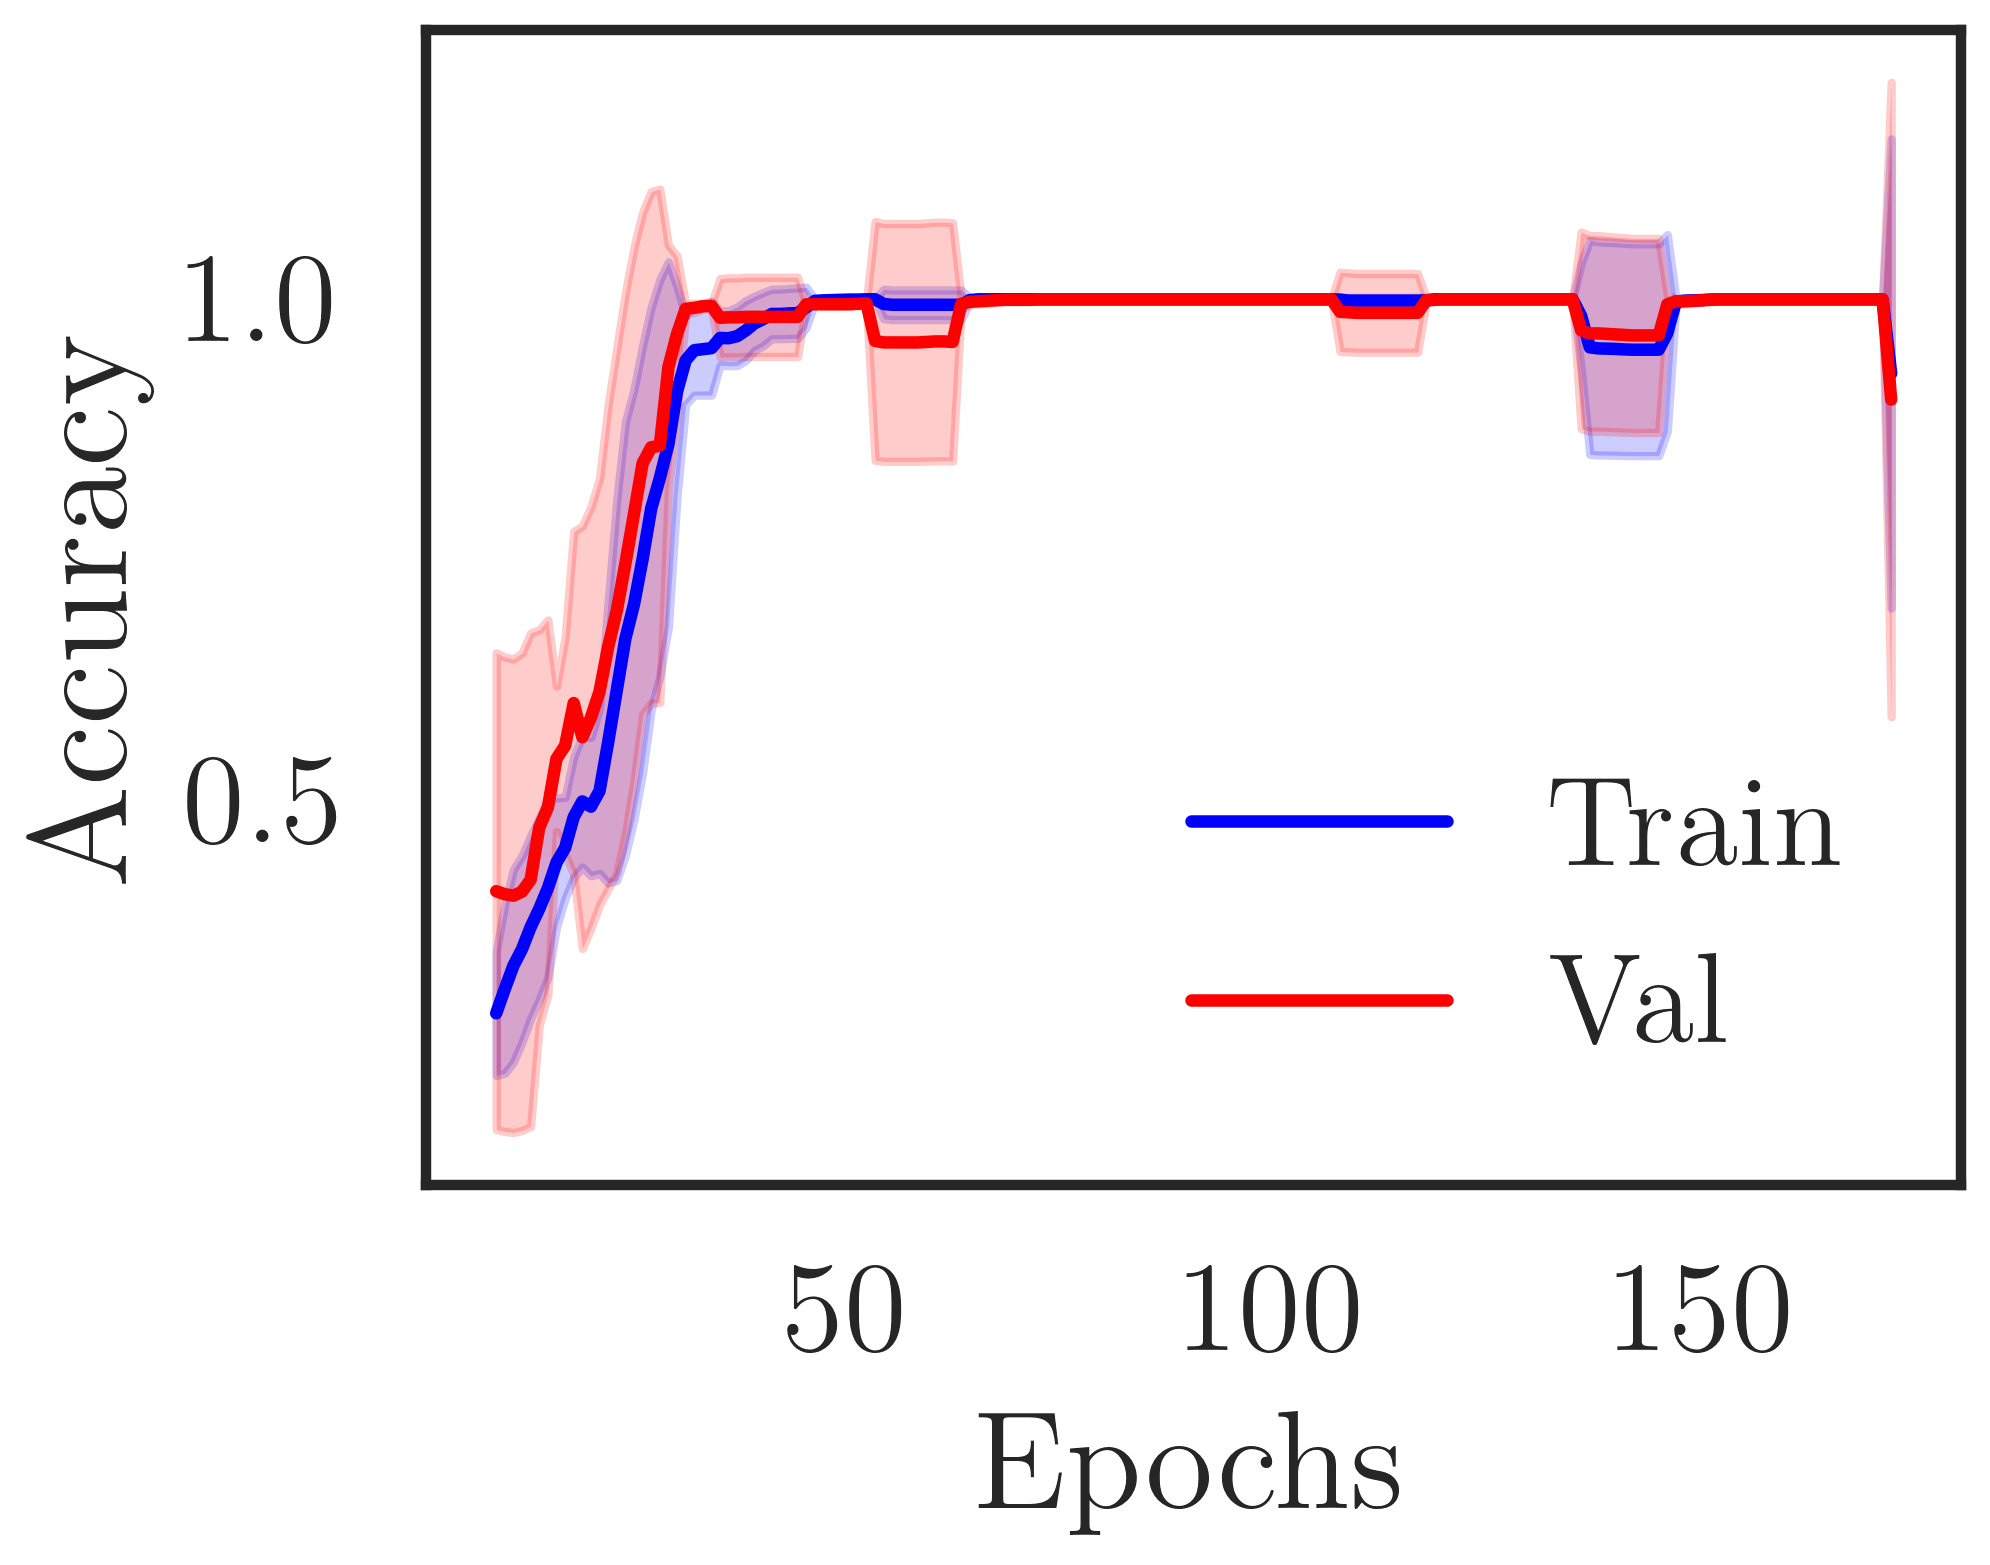

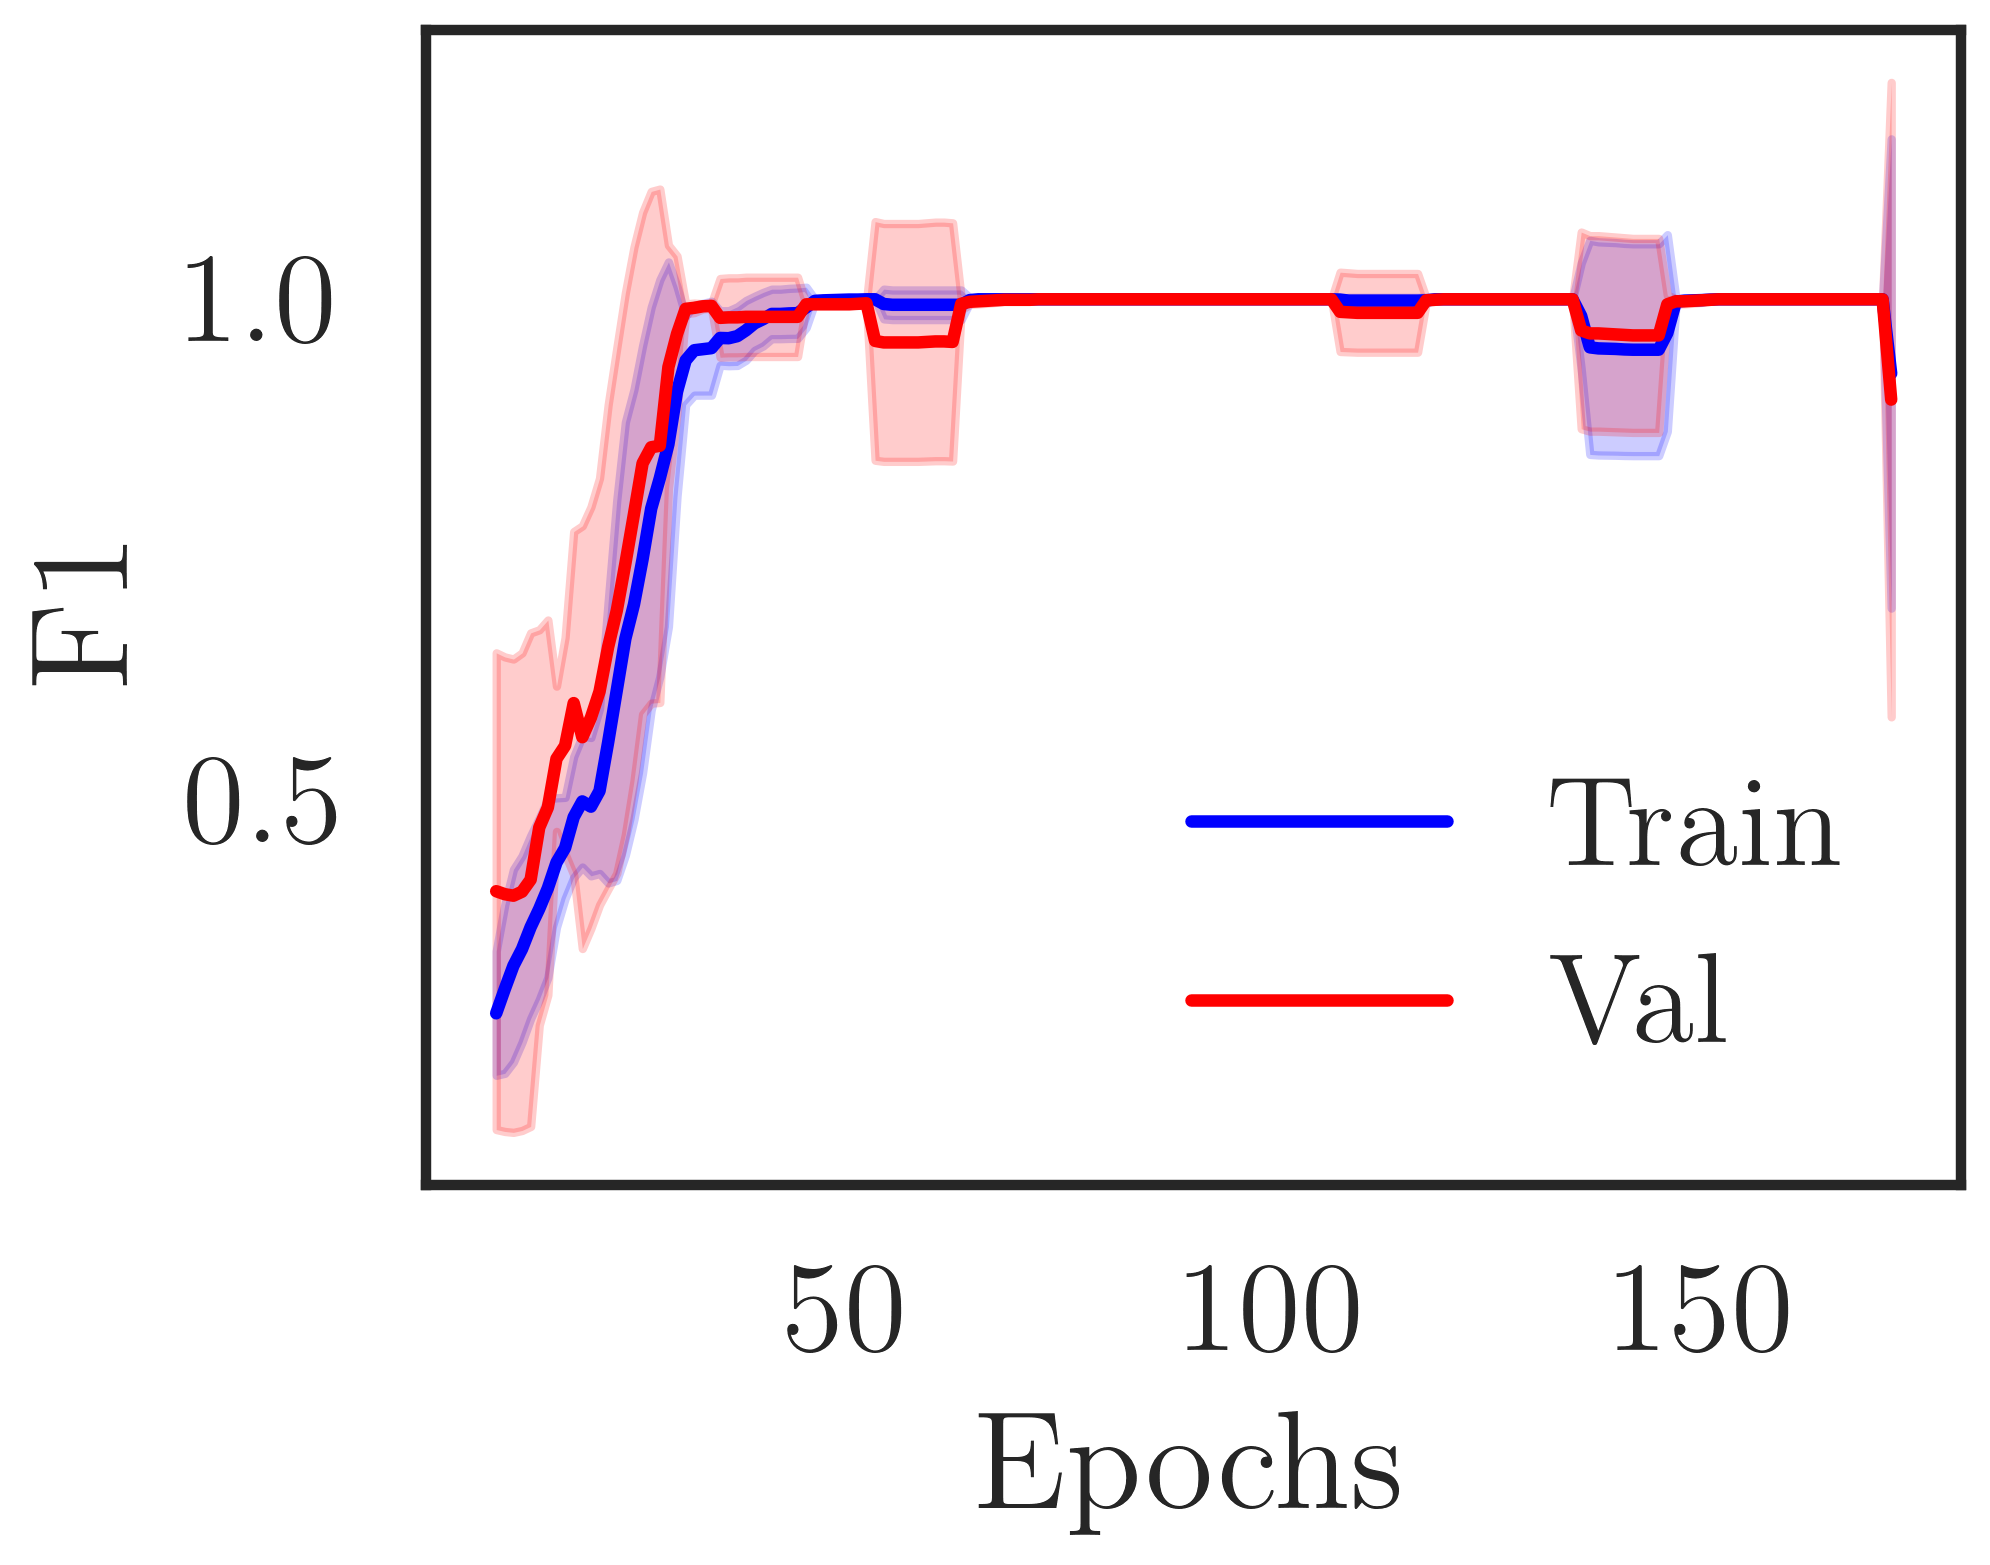

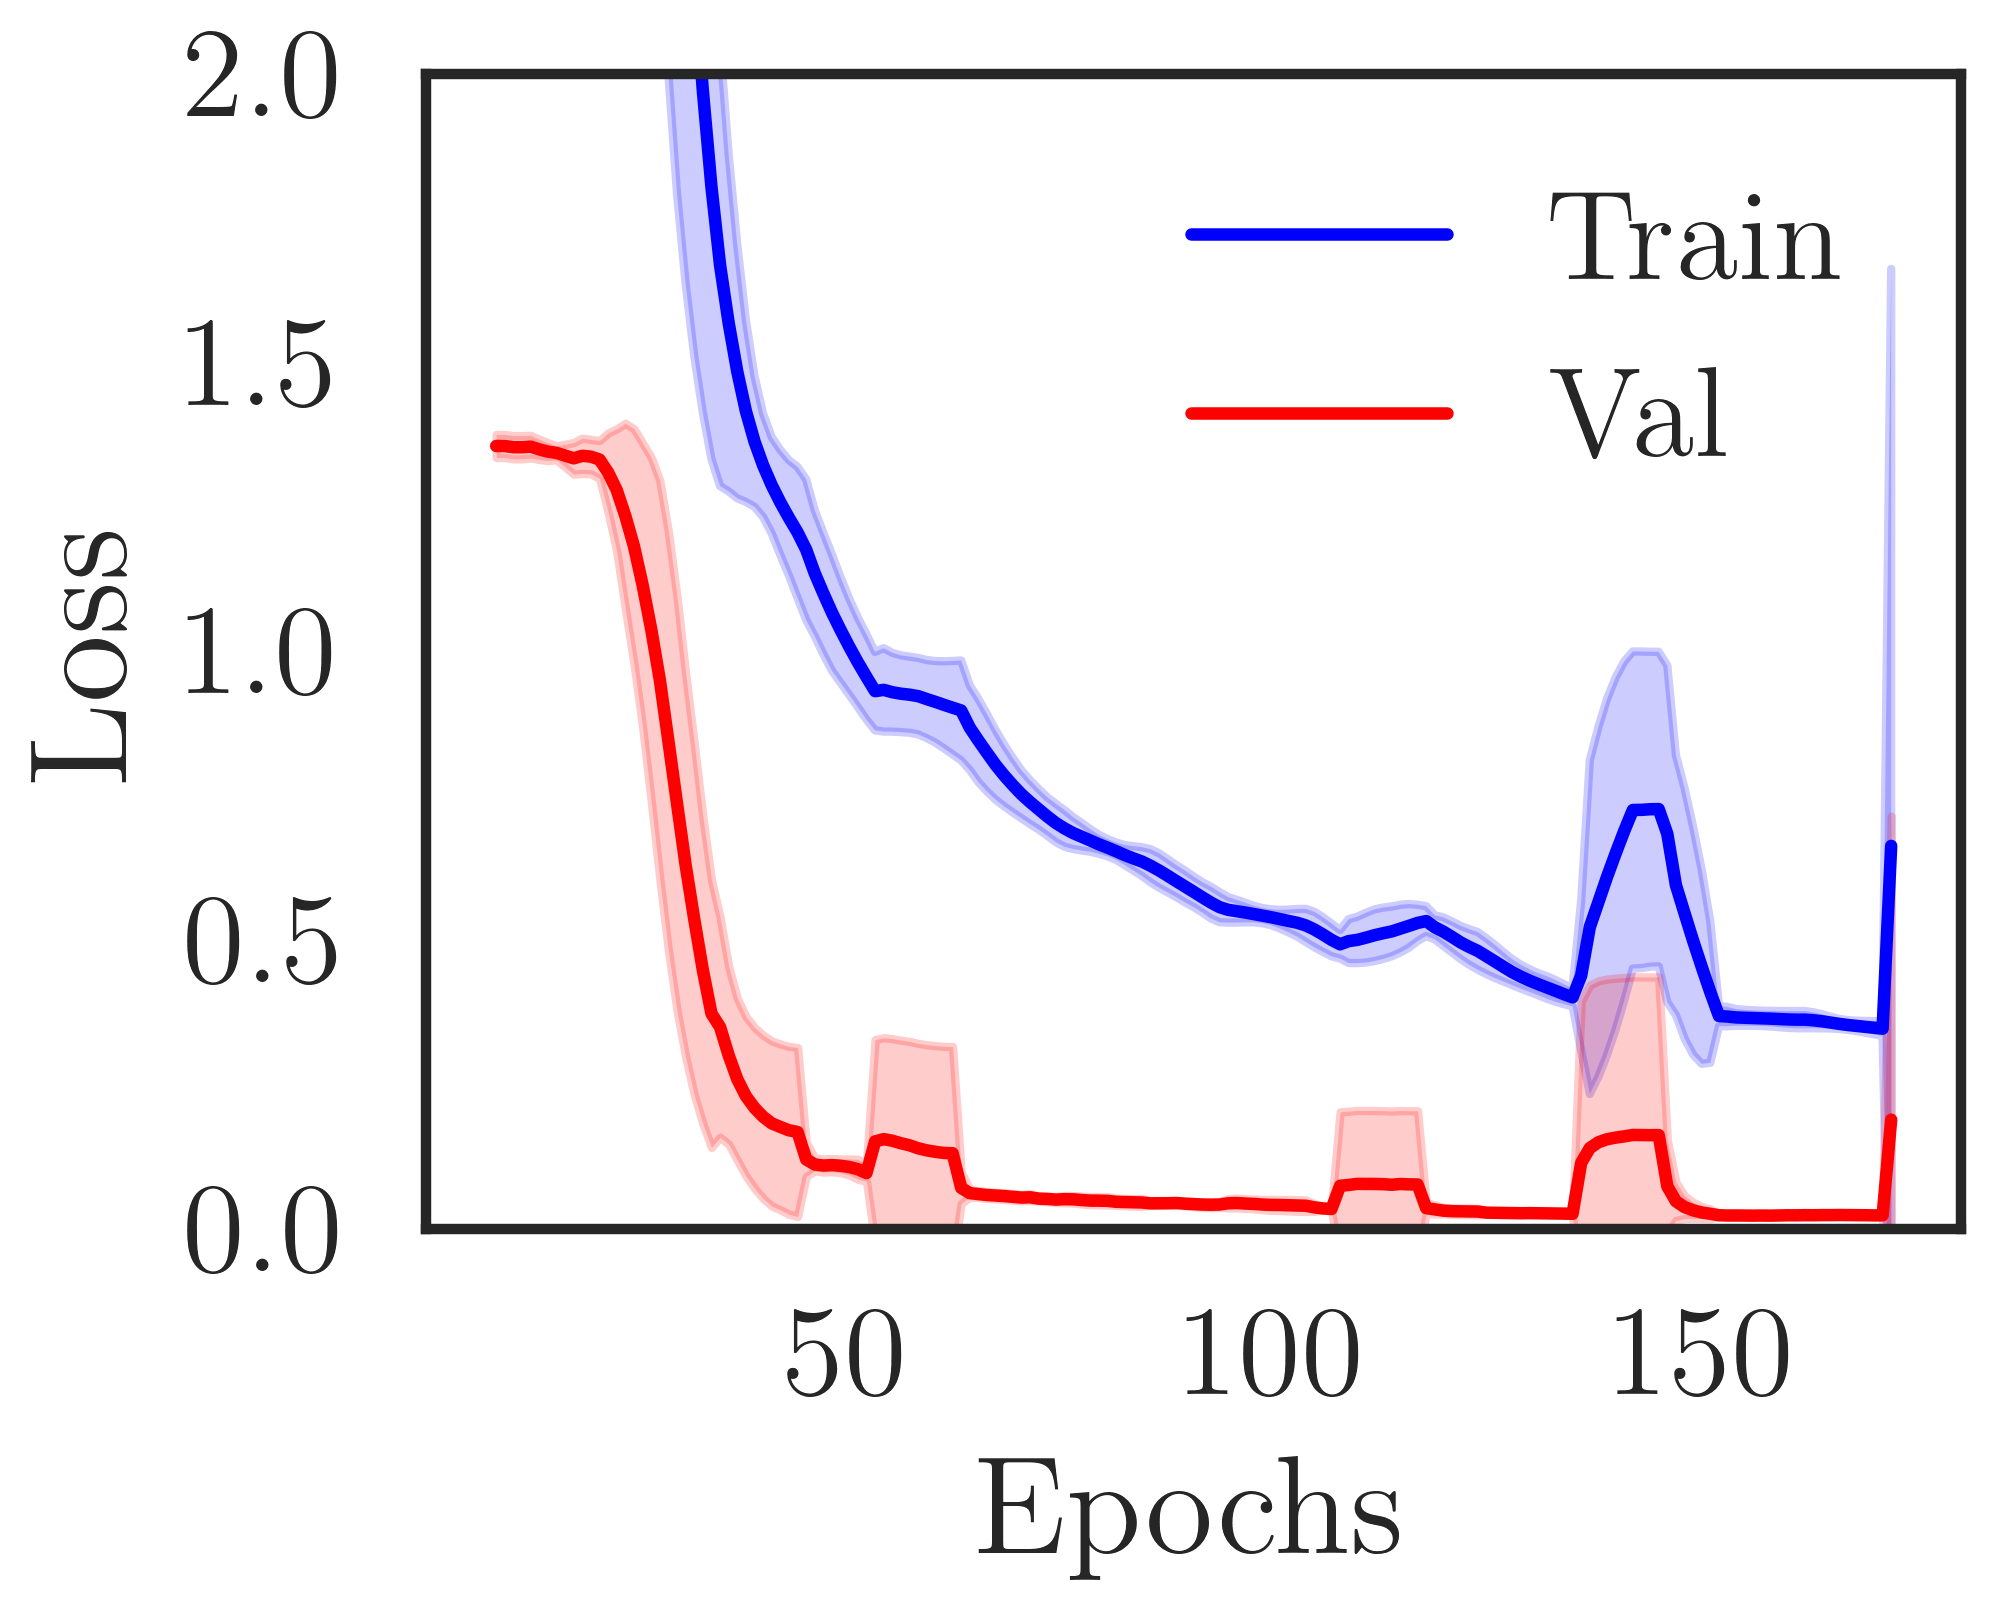

In [11]:
# 添加平滑项和置信区间
line_plot(data,name = 'Accuracy', train='acc', val='valacc', test='testacc', window=10, alpha=0.2, dpi=256)
line_plot(data,name = 'F1', train='f1', val='valf1', test='testf1', window=10, alpha=0.2, dpi=256)
line_plot(data,name = 'Loss', train='loss', val='valloss', test='testloss', window=10, alpha=0.2, dpi=256)


## 2混淆矩陣

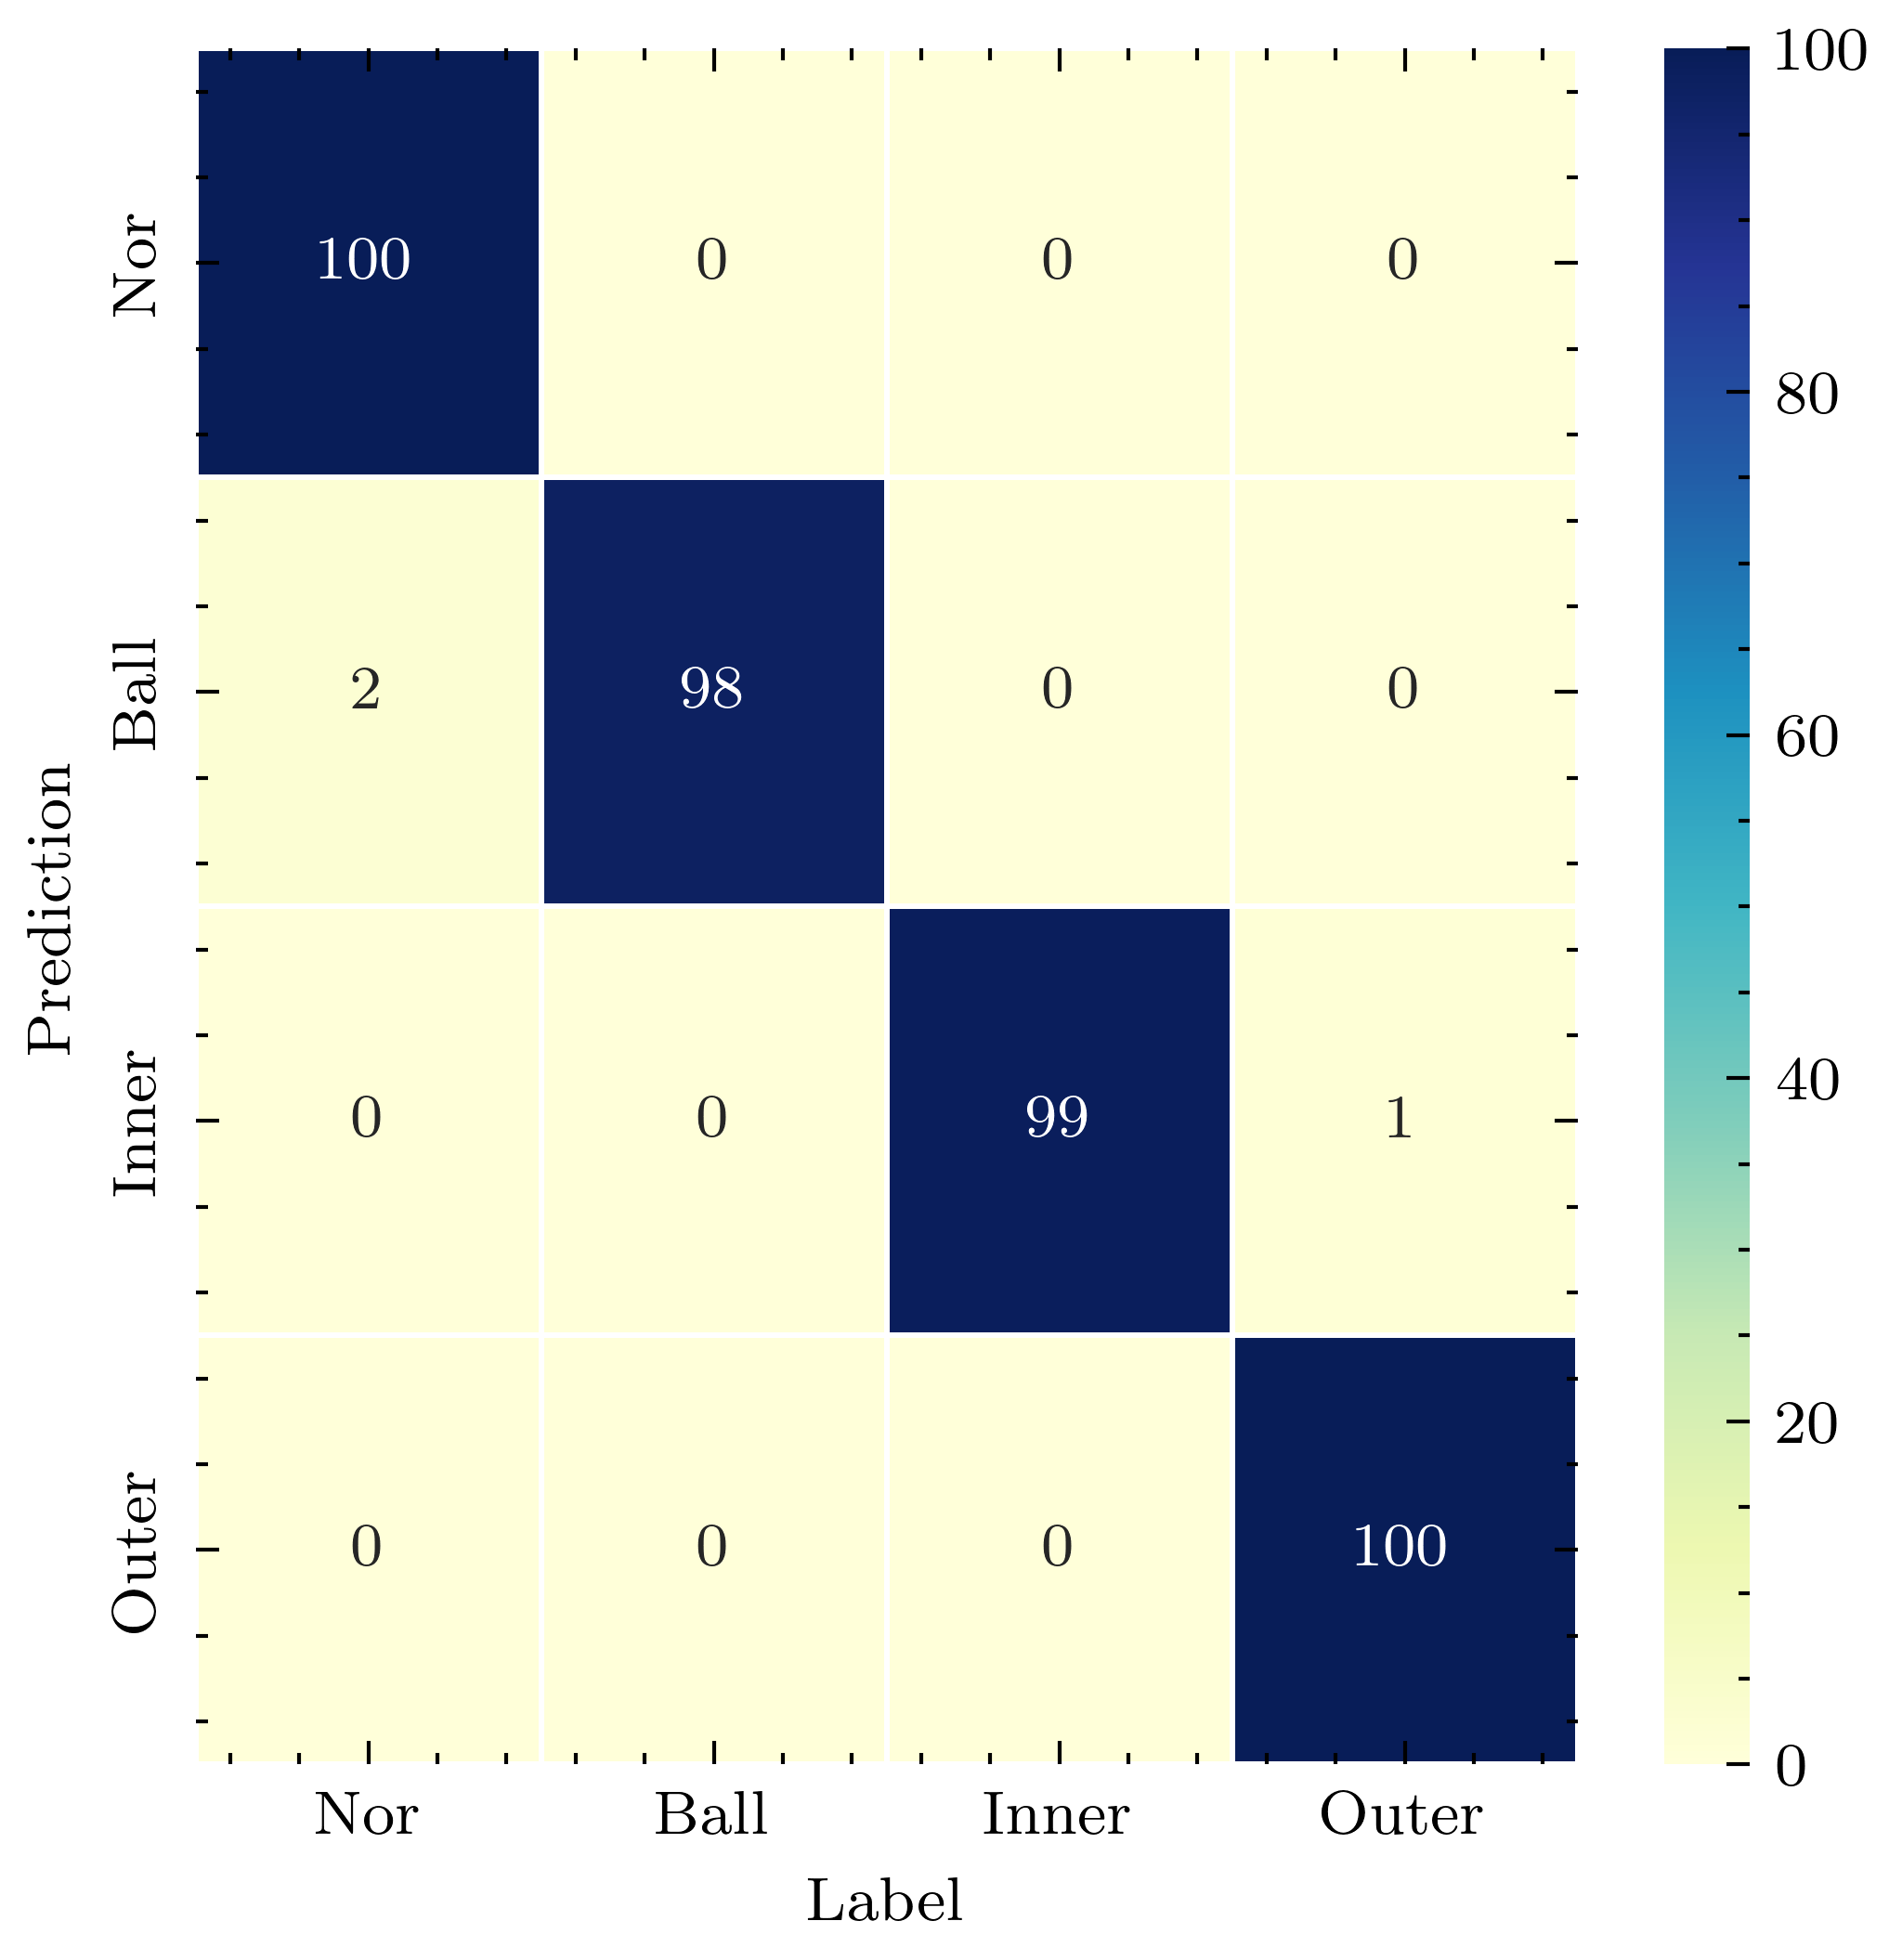

In [2]:
def heatmap_confusion(matrix,x_labels=['1','2','3'],
            y_labels=['1','2','3'],x_title = 'Label',y_title = 'Prediction',
            title = '',font_type = 'en',plot_dir = './',name = '',cmap =None,
            save_type = '.svg'):
    '''
    
    camp 关注大小默认即可
    把中间值作白，则用 coolworm
    
    weight 2 36*32 so figsize = (9,8)
    weight 3 32*32 so figsize = (8,8)
    
    '''
    f, ax = plt.subplots(figsize=(4, 4))
    font = fonts[font_type]
    
    sns.heatmap(matrix, cmap =cmap, annot=True, fmt=".0f",
                linewidths=.5, ax=ax,xticklabels = x_labels, yticklabels = y_labels,
                vmax=None, vmin=None)
    plt.title(title)
    # plt.title('Result Analysis')

    plt.xlabel(x_title)
    plt.ylabel(y_title)
    plt.savefig(plot_dir + f'{name}heatmap'+save_type, transparent=True,dpi=512)   
    
    
dir = '_name:THU10_4'
confusion_matrix = np.load(f'{dir}/0.8100000000Confusion matrix.npy')
heatmap_confusion(confusion_matrix,
                  x_labels = ['Nor','Ball','Inner','Outer'],
                  y_labels= ['Nor','Ball','Inner','Outer'],
                  name = '1',
                  cmap = 'YlGnBu')

## 3 权重

In [2]:
def heatmap_weight(matrix,x_labels='',
            y_labels='',x_title = '',y_title = '',
            title = '',font_type = 'en',plot_dir = './',name = '',cmap =None,
            save_type = 'svg'):
    '''
    
    camp 关注大小默认即可
    把中间值作白，则用 coolworm
    
    weight 2 36*32 so figsize = (9,8)
    weight 3 32*32 so figsize = (8,8)
    
    '''
    f, ax = plt.subplots(figsize=(9, 3))
    font = fonts[font_type]
    
    sns.heatmap(matrix, cmap ='YlGnBu', annot=False, fmt="f",
                linewidths=.5, ax=ax,xticklabels = x_labels, yticklabels = y_labels,
                vmax=-0.5, vmin=0.5)
    plt.title(title,font)
    # plt.title('Result Analysis')

    plt.xlabel(x_title,font)
    plt.ylabel(y_title,font)
    plt.savefig(plot_dir + f'{name}heatmap.'+save_type,dpi=512) 





In [8]:

def weight_plot( dir = '_name:THU10_4',weight0 = '/epoch0.npy',
                weight1 = '/epoch381.npy',
                weight2 = '/epoch635.npy',):



    weights0 = np.load(dir+weight0, allow_pickle=True).item()
    weights1 = np.load(dir+weight1, allow_pickle=True).item()
    weights2 = np.load(dir+weight2, allow_pickle=True).item()

    epoch_weights = zip(weights0['parms_weight'],weights1['parms_weight'],weights2['parms_weight'])
    for i,weight in enumerate(epoch_weights):

        for j,weight_i in enumerate(weight):
            if 'learnable_param' in weights0['name'][i]:
                continue
            print(weights0['name'][i])
            if weights0['name'][i] == 'regression_layer.weight':
                pass
                # vmax = -0.2
                # vmin = 0.2
            else:
                weight_i = weight_i.squeeze(-1)
                # vmax = -0.1
                # vmin = 0.1
            print(weight_i.shape)
            sns.heatmap(weight_i,vmin=0.1, vmax=-0.1, cmap ='RdYlBu', annot=False, fmt="f",
                linewidths=.5, xticklabels = '', yticklabels = '')
            plt.savefig(f'./layer{i}+epoch{j}.svg',dpi=256)
            plt.savefig(f'./layer{i}+epoch{j}.png',dpi=256)  
            plt.show()
            # plt.xlabel('Signal gated weight')
            # plt.ylabel('Signal gated weight')


            # plt.subplot(312)
            # sns.heatmap(weight_i.squeeze(-1), cmap ='YlGnBu', annot=False, fmt="f",
            #     linewidths=.5, xticklabels = '', yticklabels = '',
            #     vmax=-0.5, vmin=0.5)
            # plt.xlabel('Signal gated weight')
            # plt.ylabel('Signal gated weight')
        
        
    

symbolic_transform_layer.0.channel_conv.weight
(12, 1)


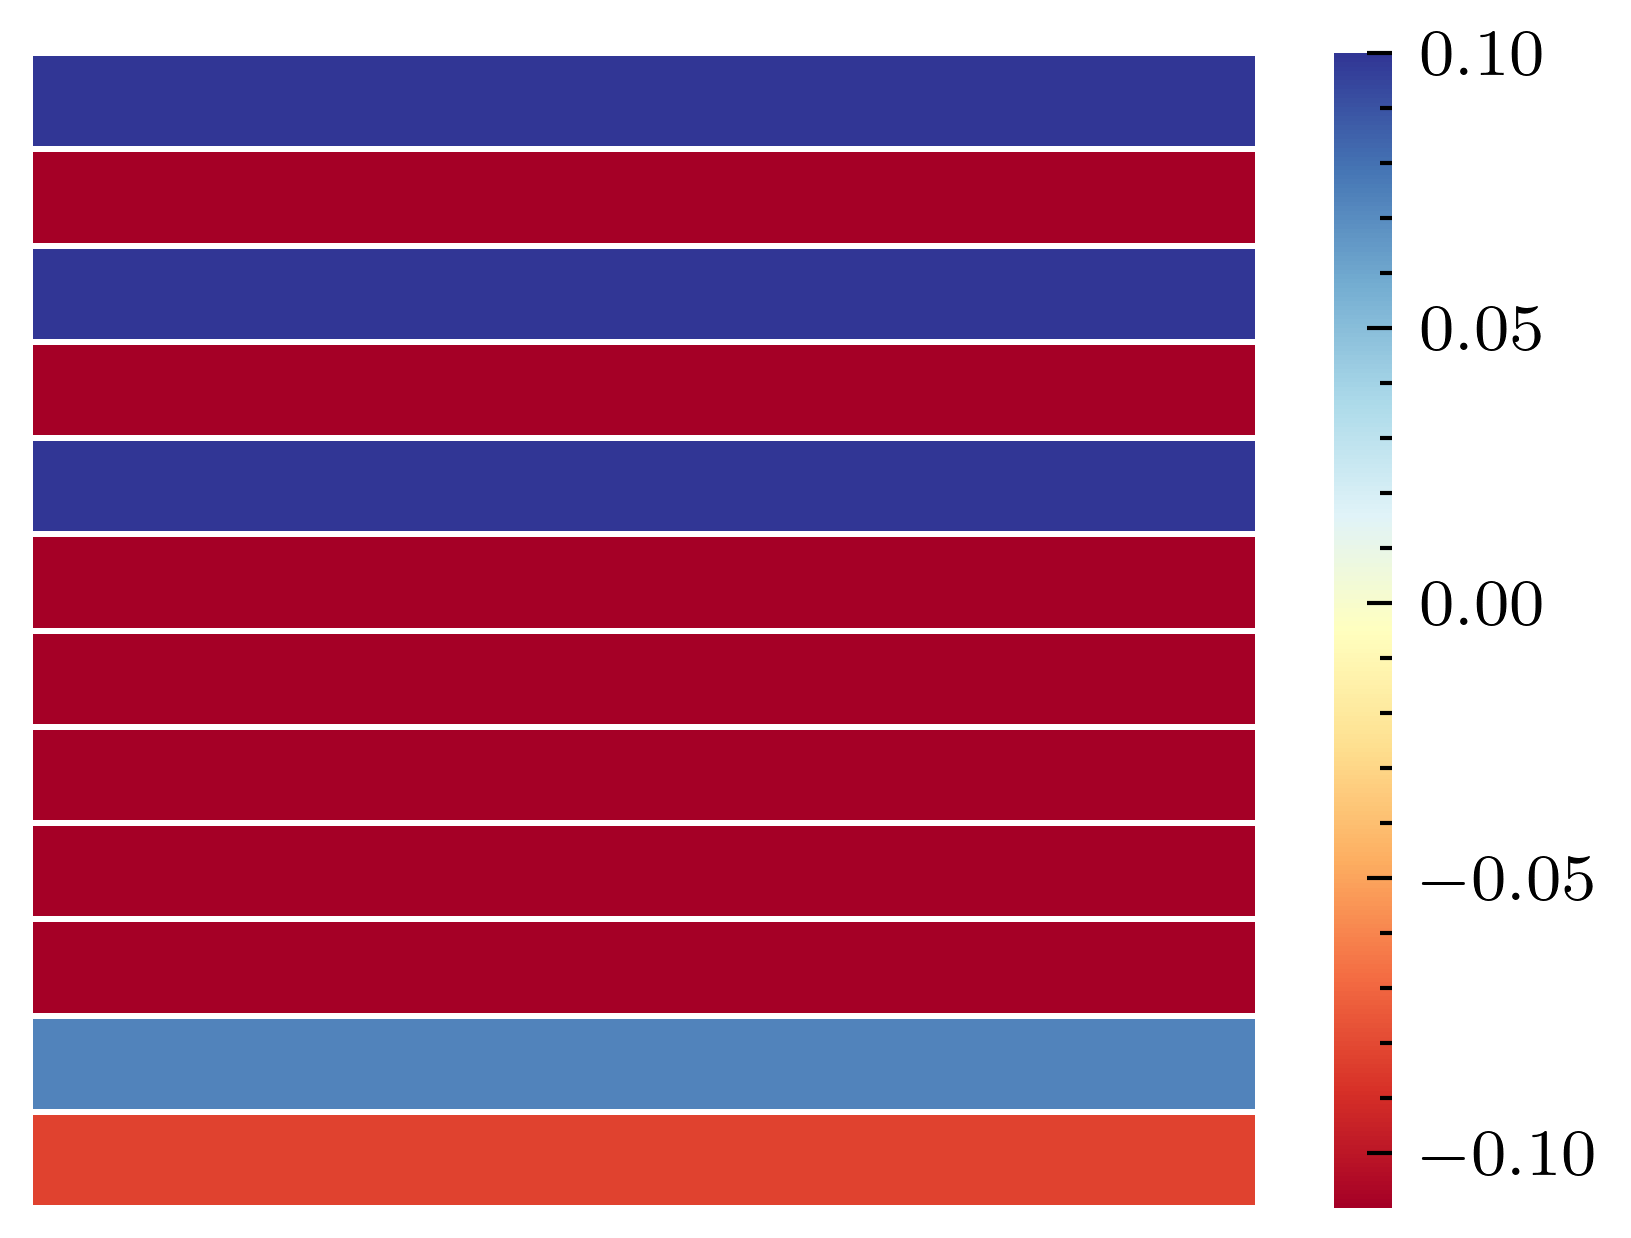

symbolic_transform_layer.0.channel_conv.weight
(12, 1)


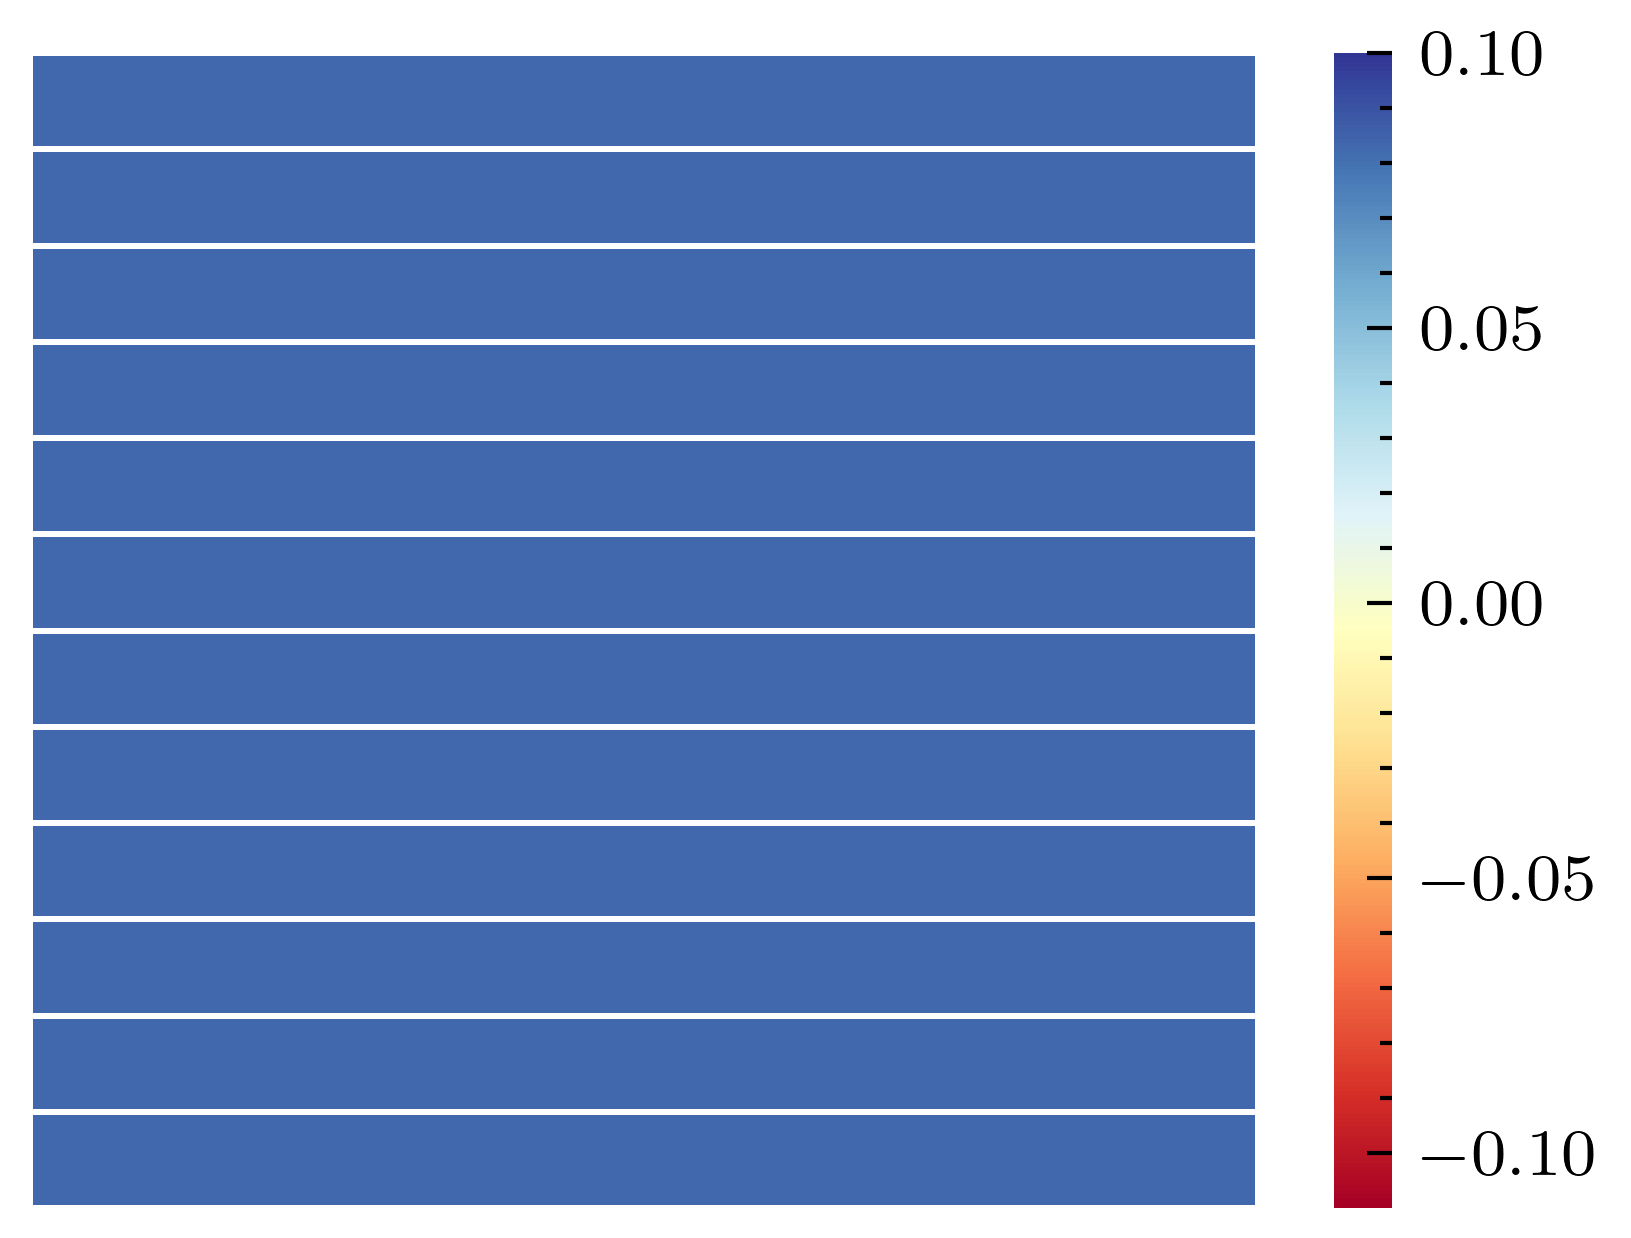

symbolic_transform_layer.0.channel_conv.weight
(12, 1)


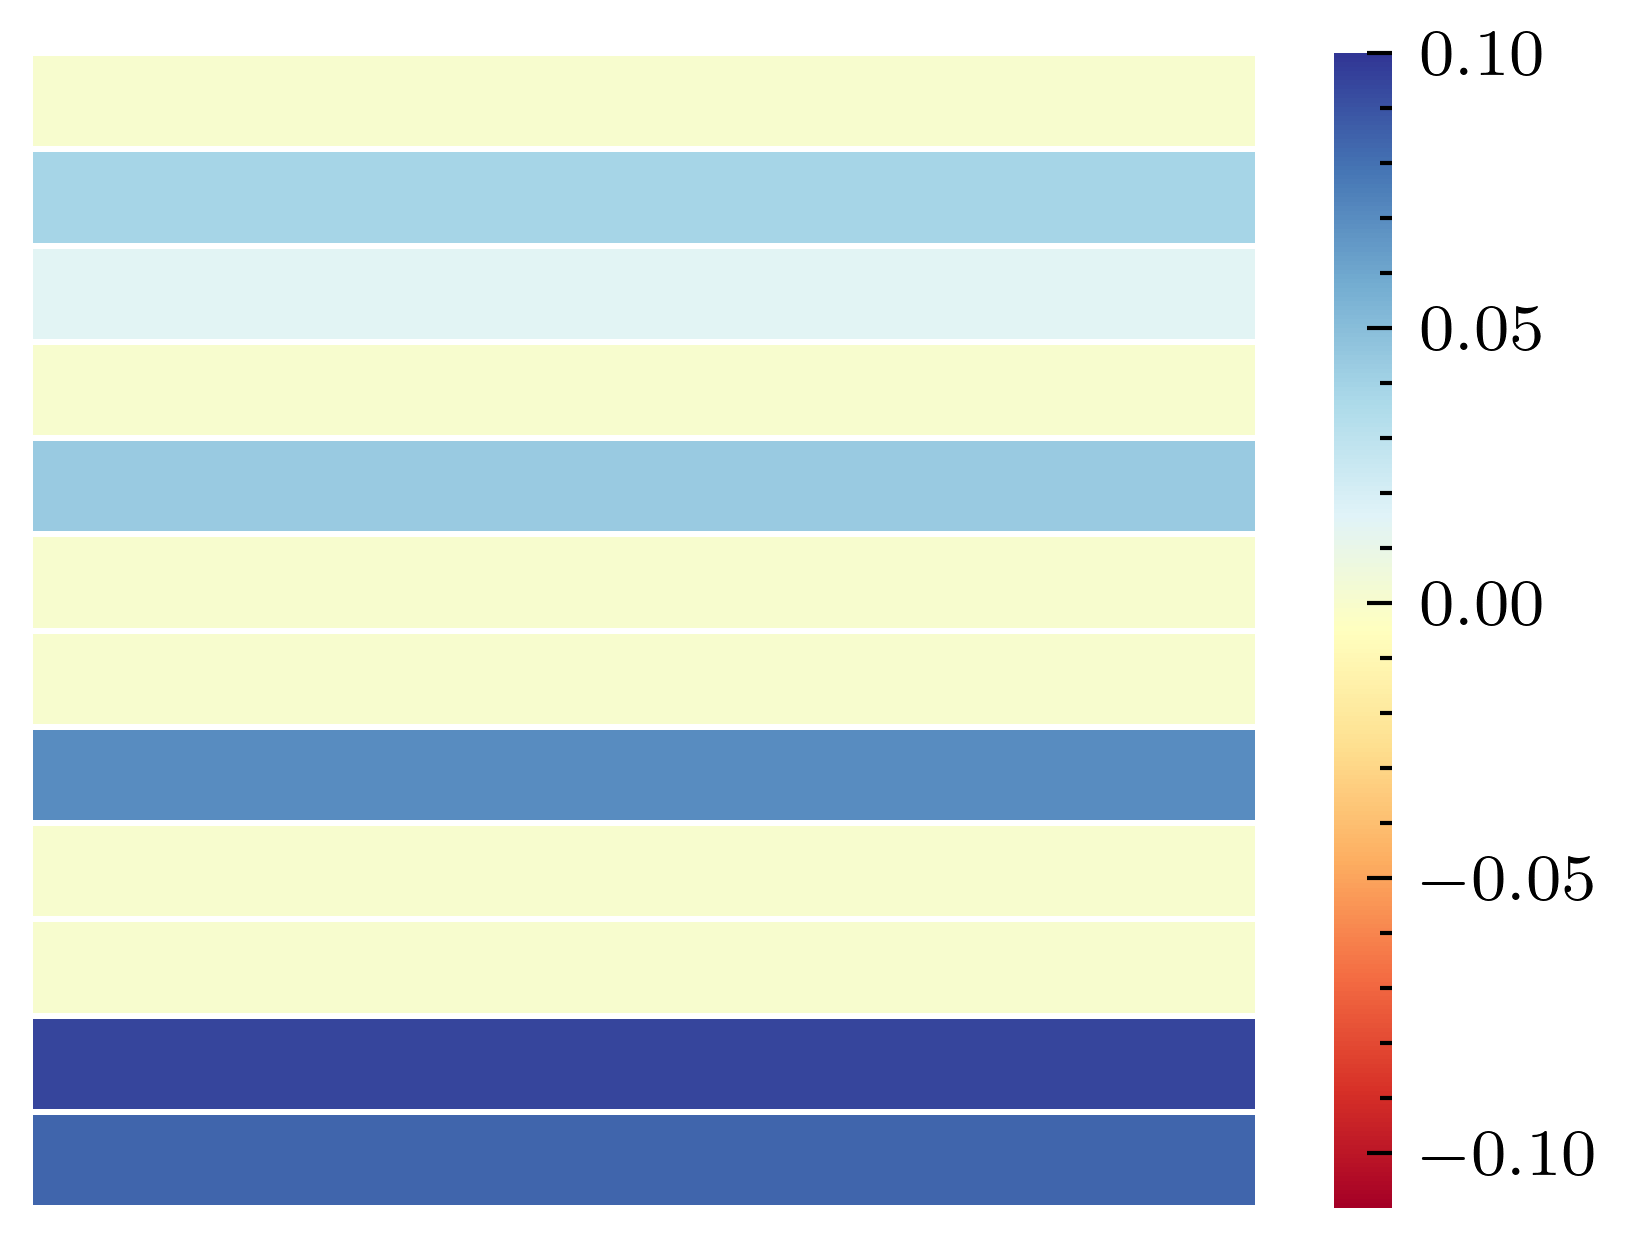

symbolic_transform_layer.0.down_conv.weight
(12, 1)


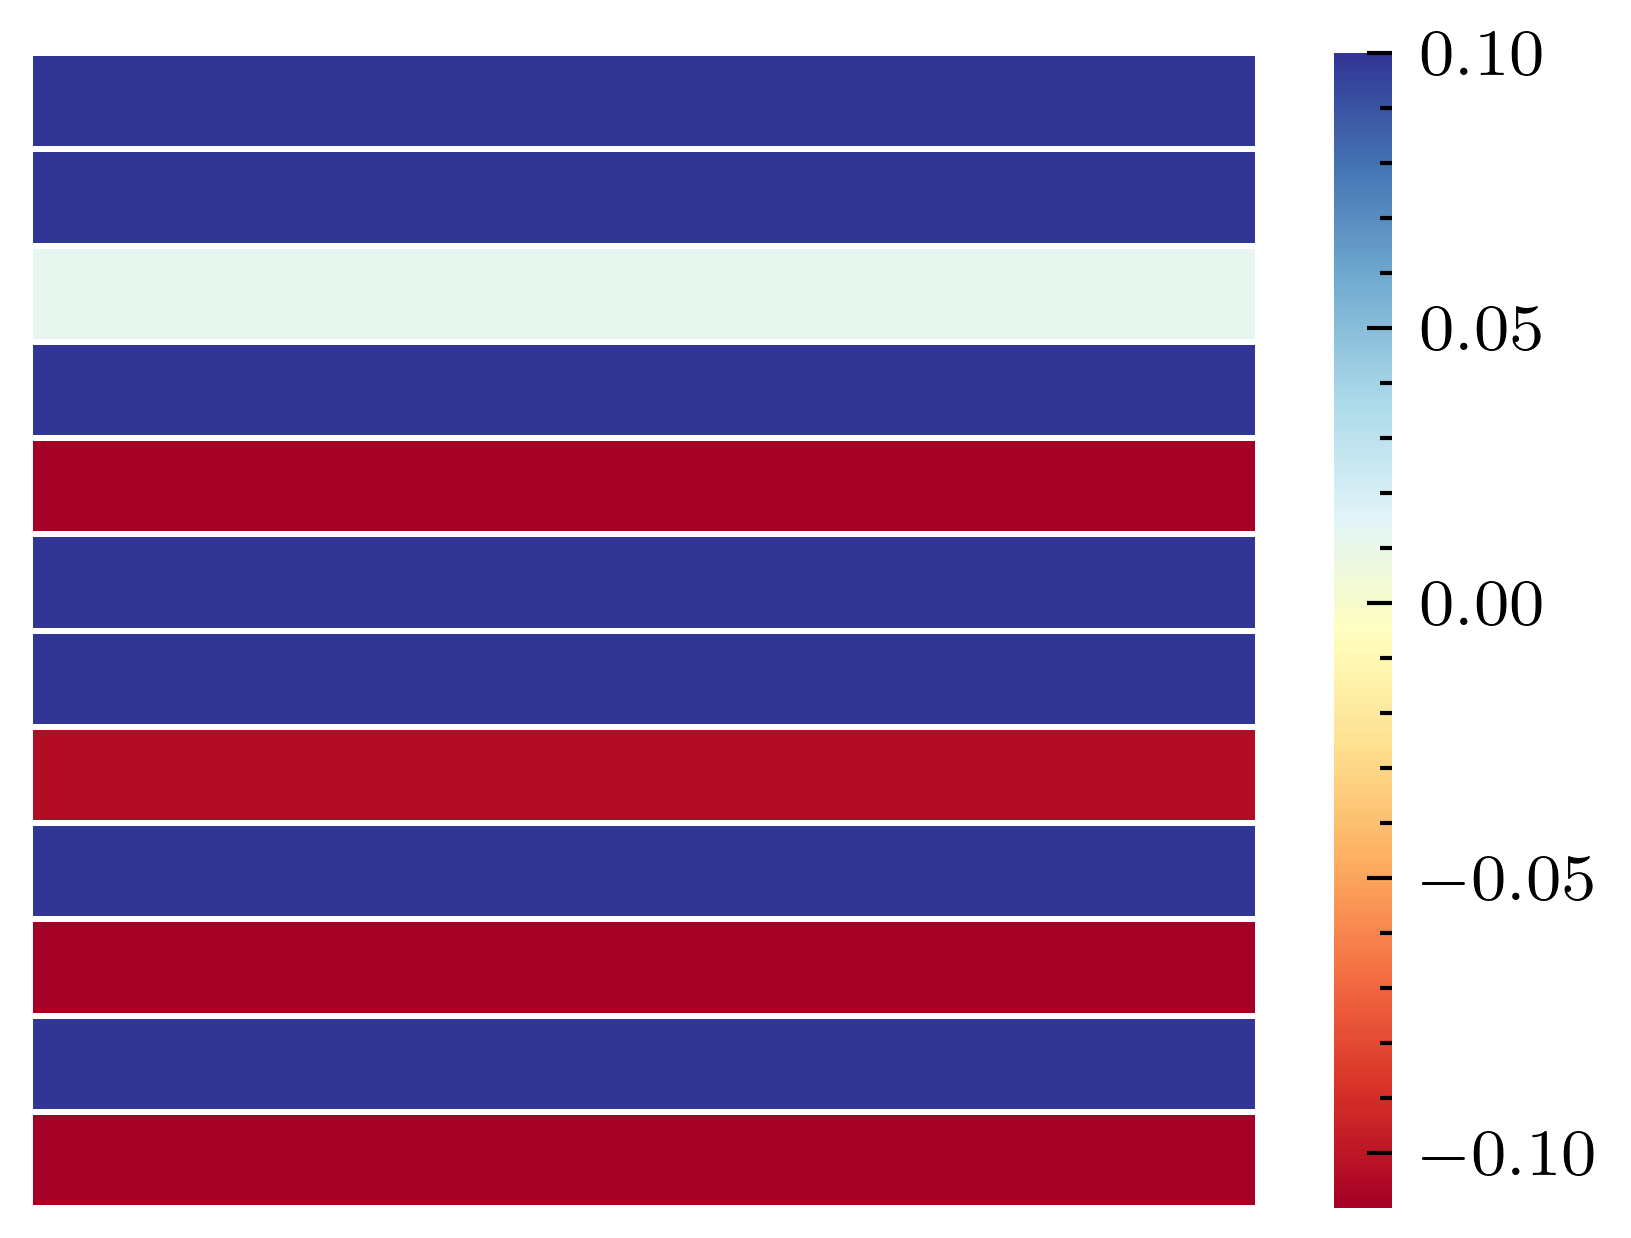

symbolic_transform_layer.0.down_conv.weight
(12, 1)


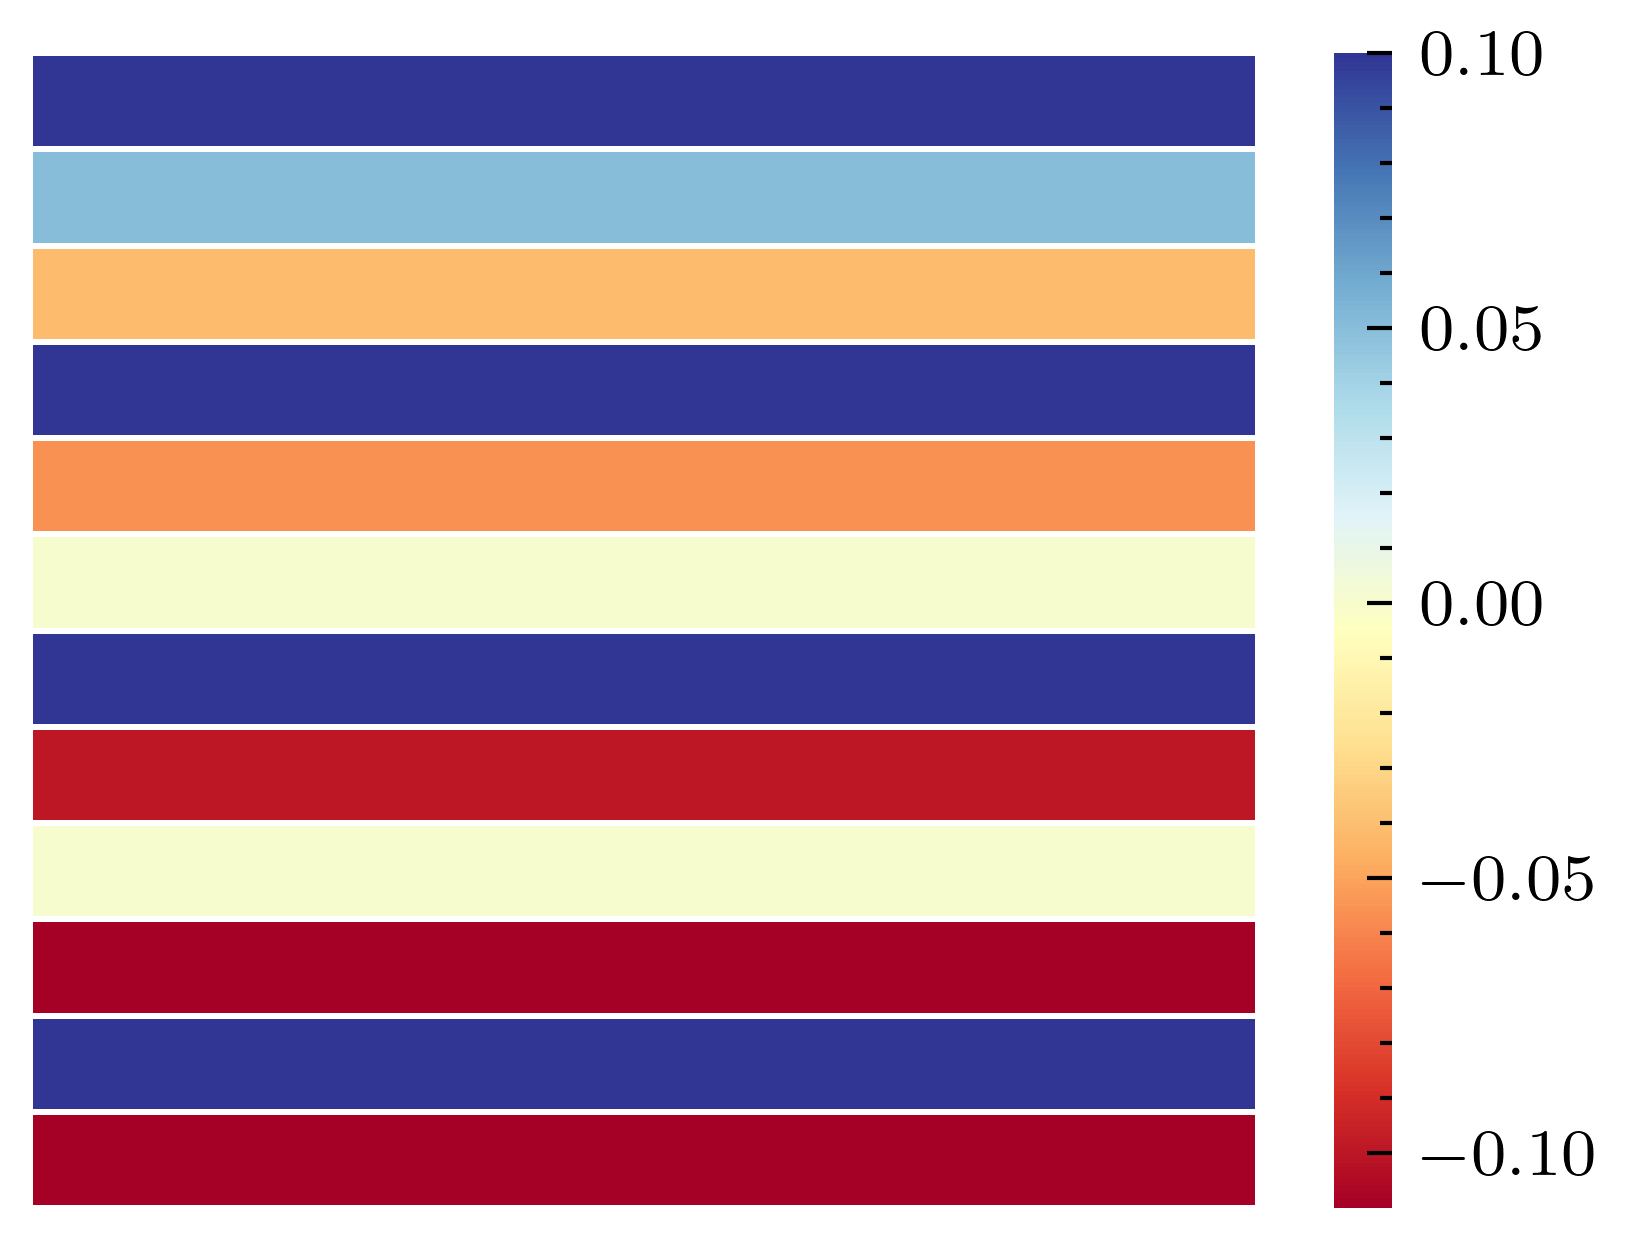

symbolic_transform_layer.0.down_conv.weight
(12, 1)


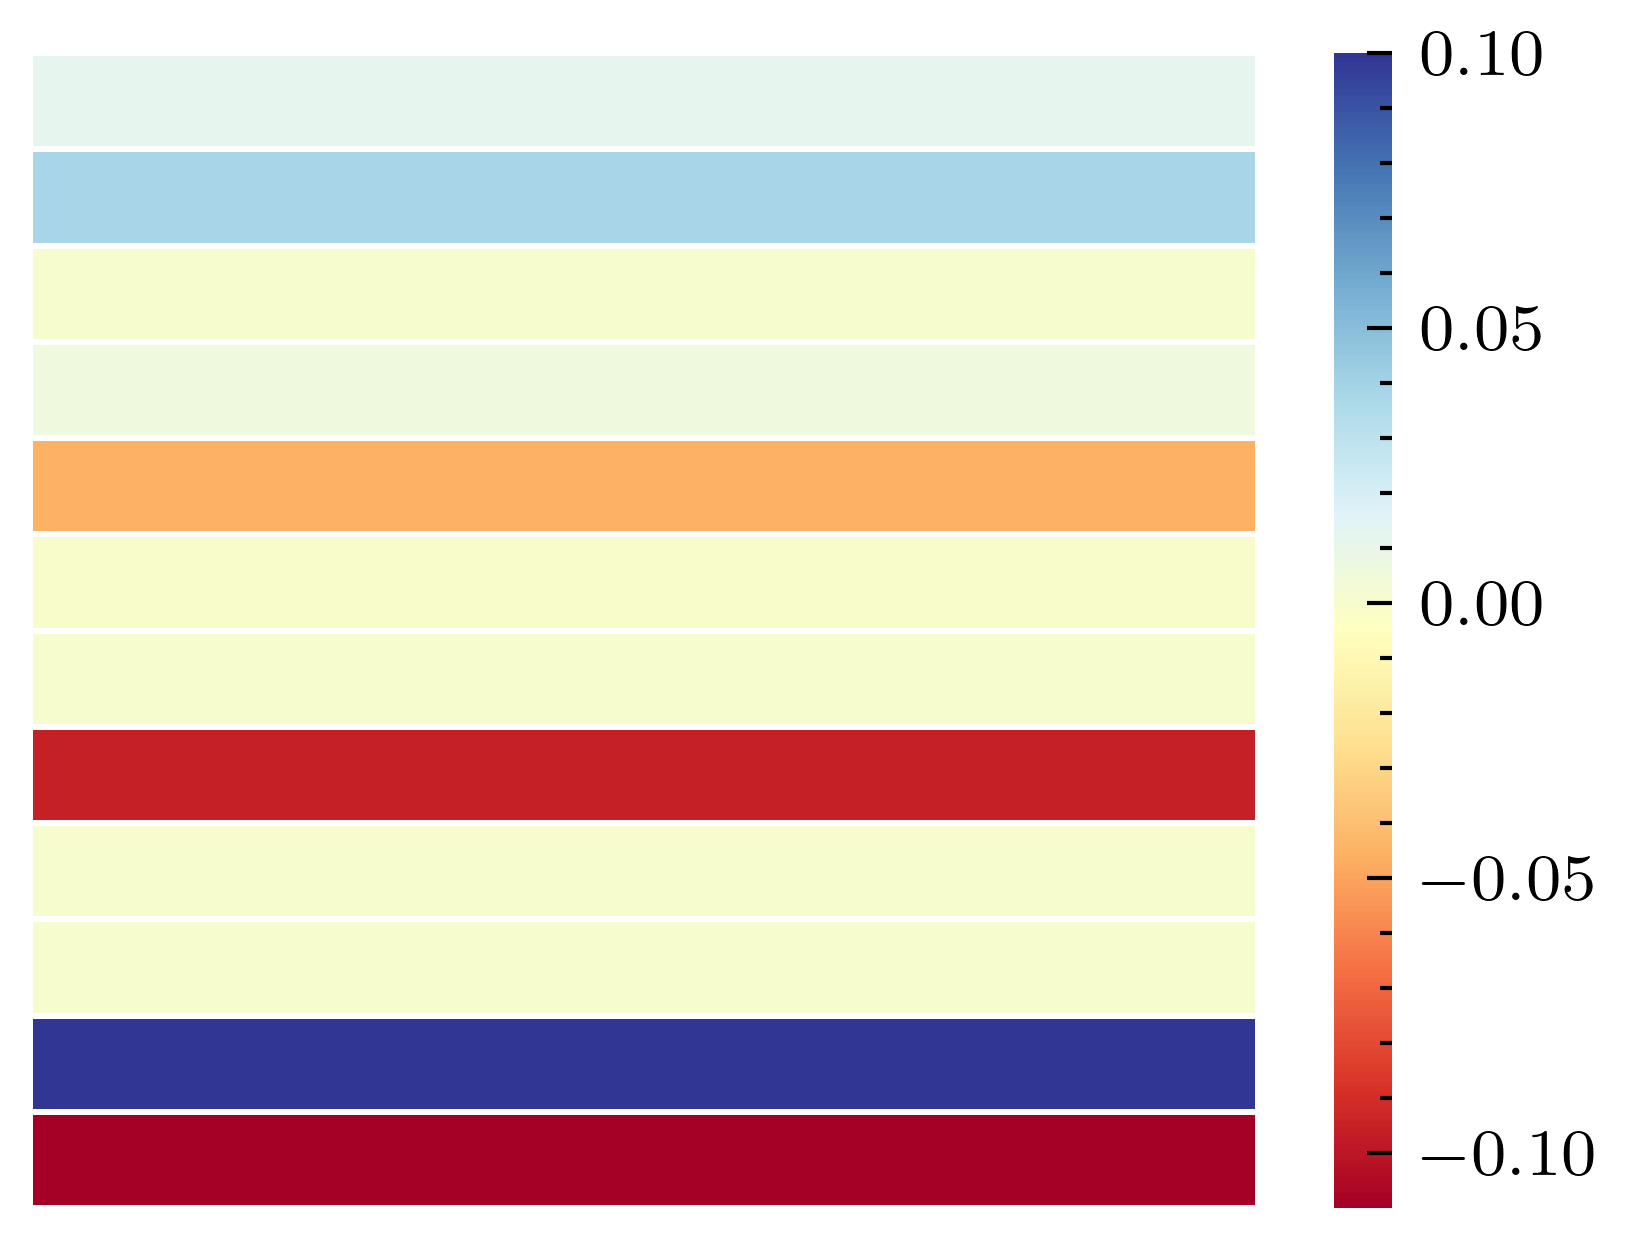

symbolic_transform_layer.1.channel_conv.weight
(12, 12)


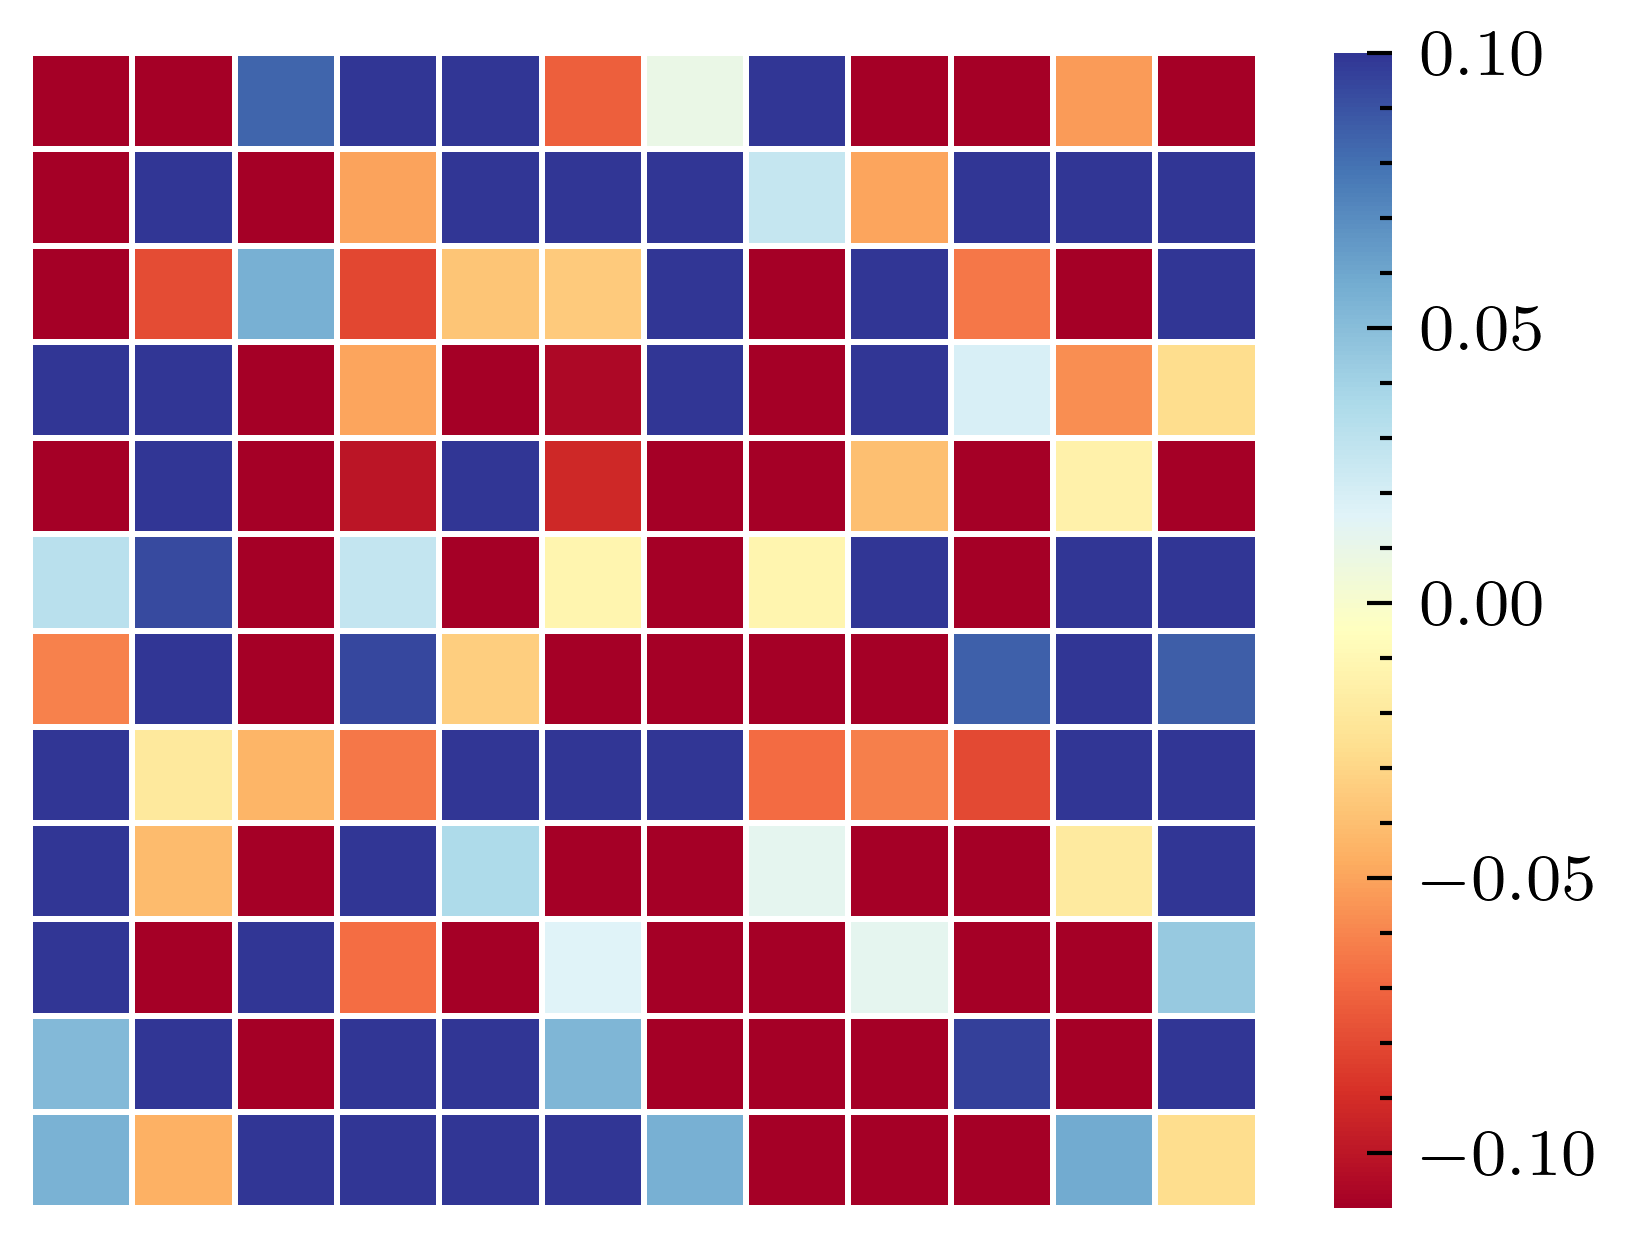

symbolic_transform_layer.1.channel_conv.weight
(12, 12)


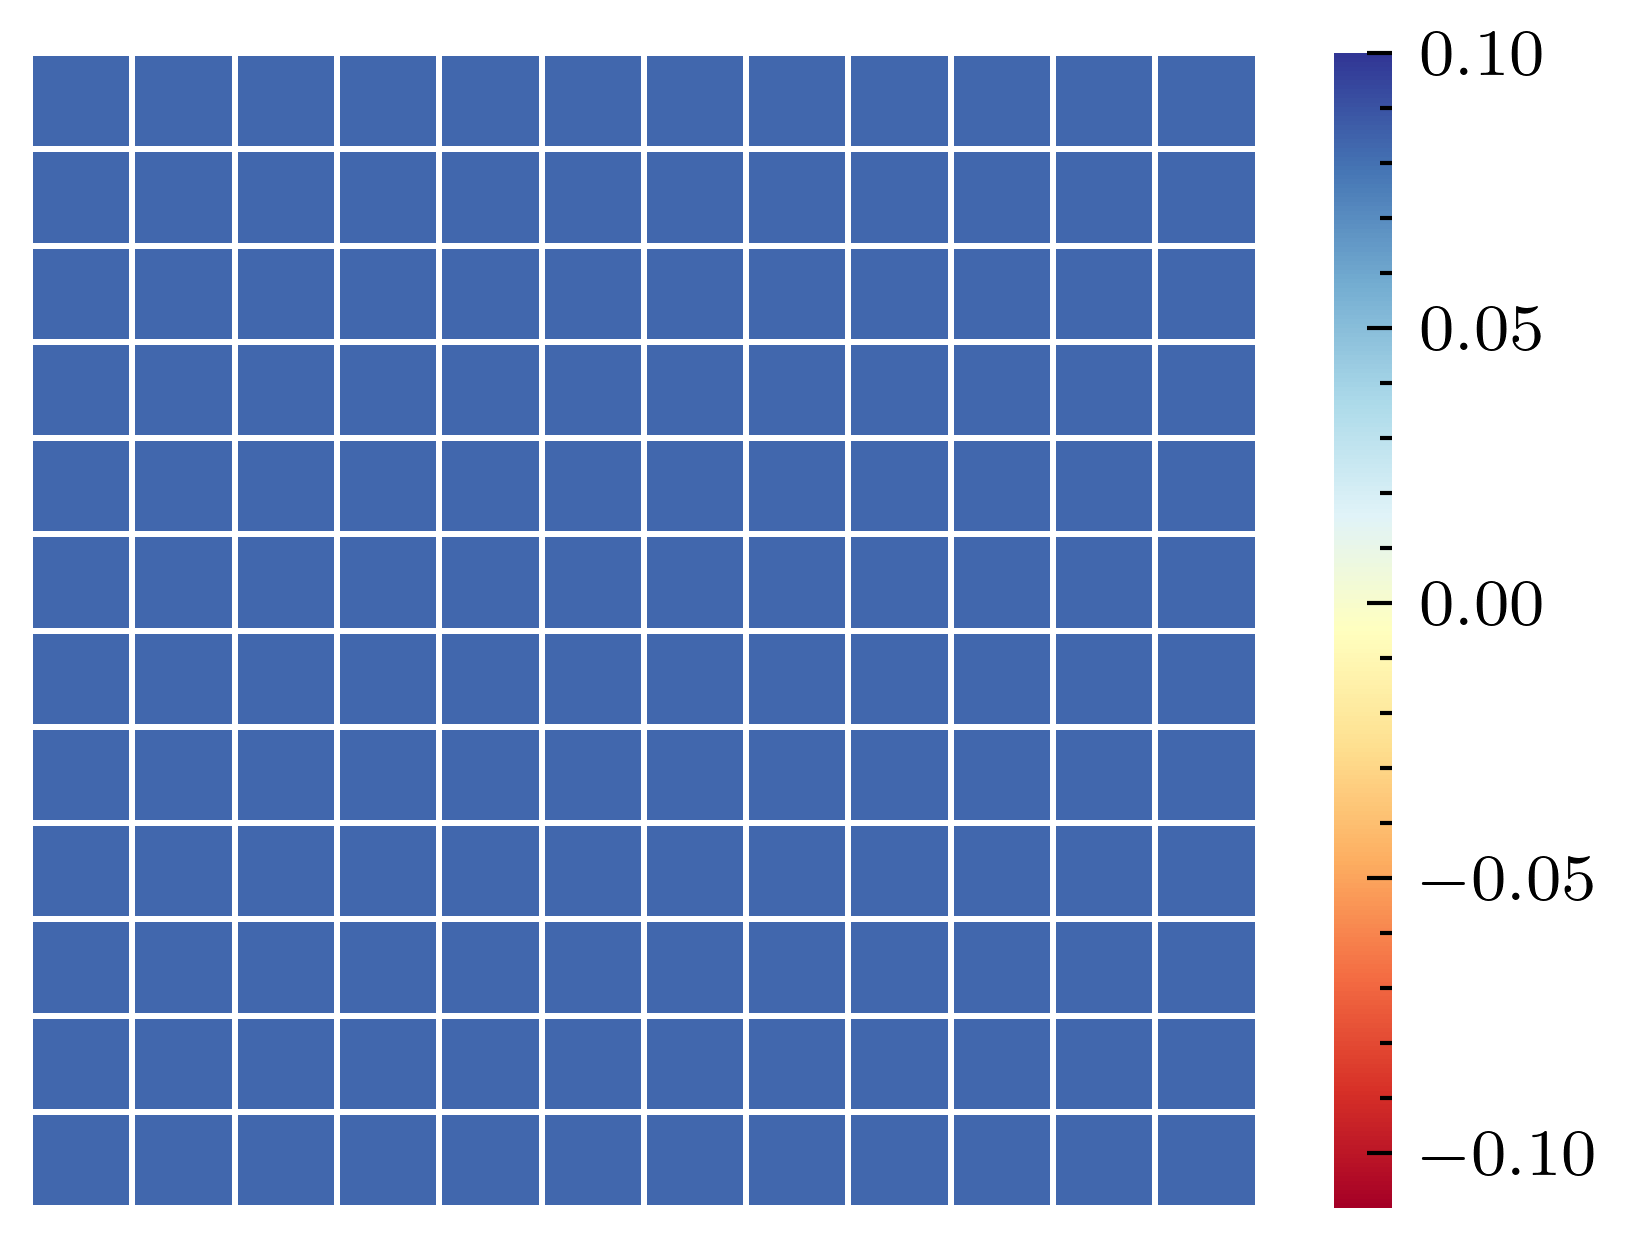

symbolic_transform_layer.1.channel_conv.weight
(12, 12)


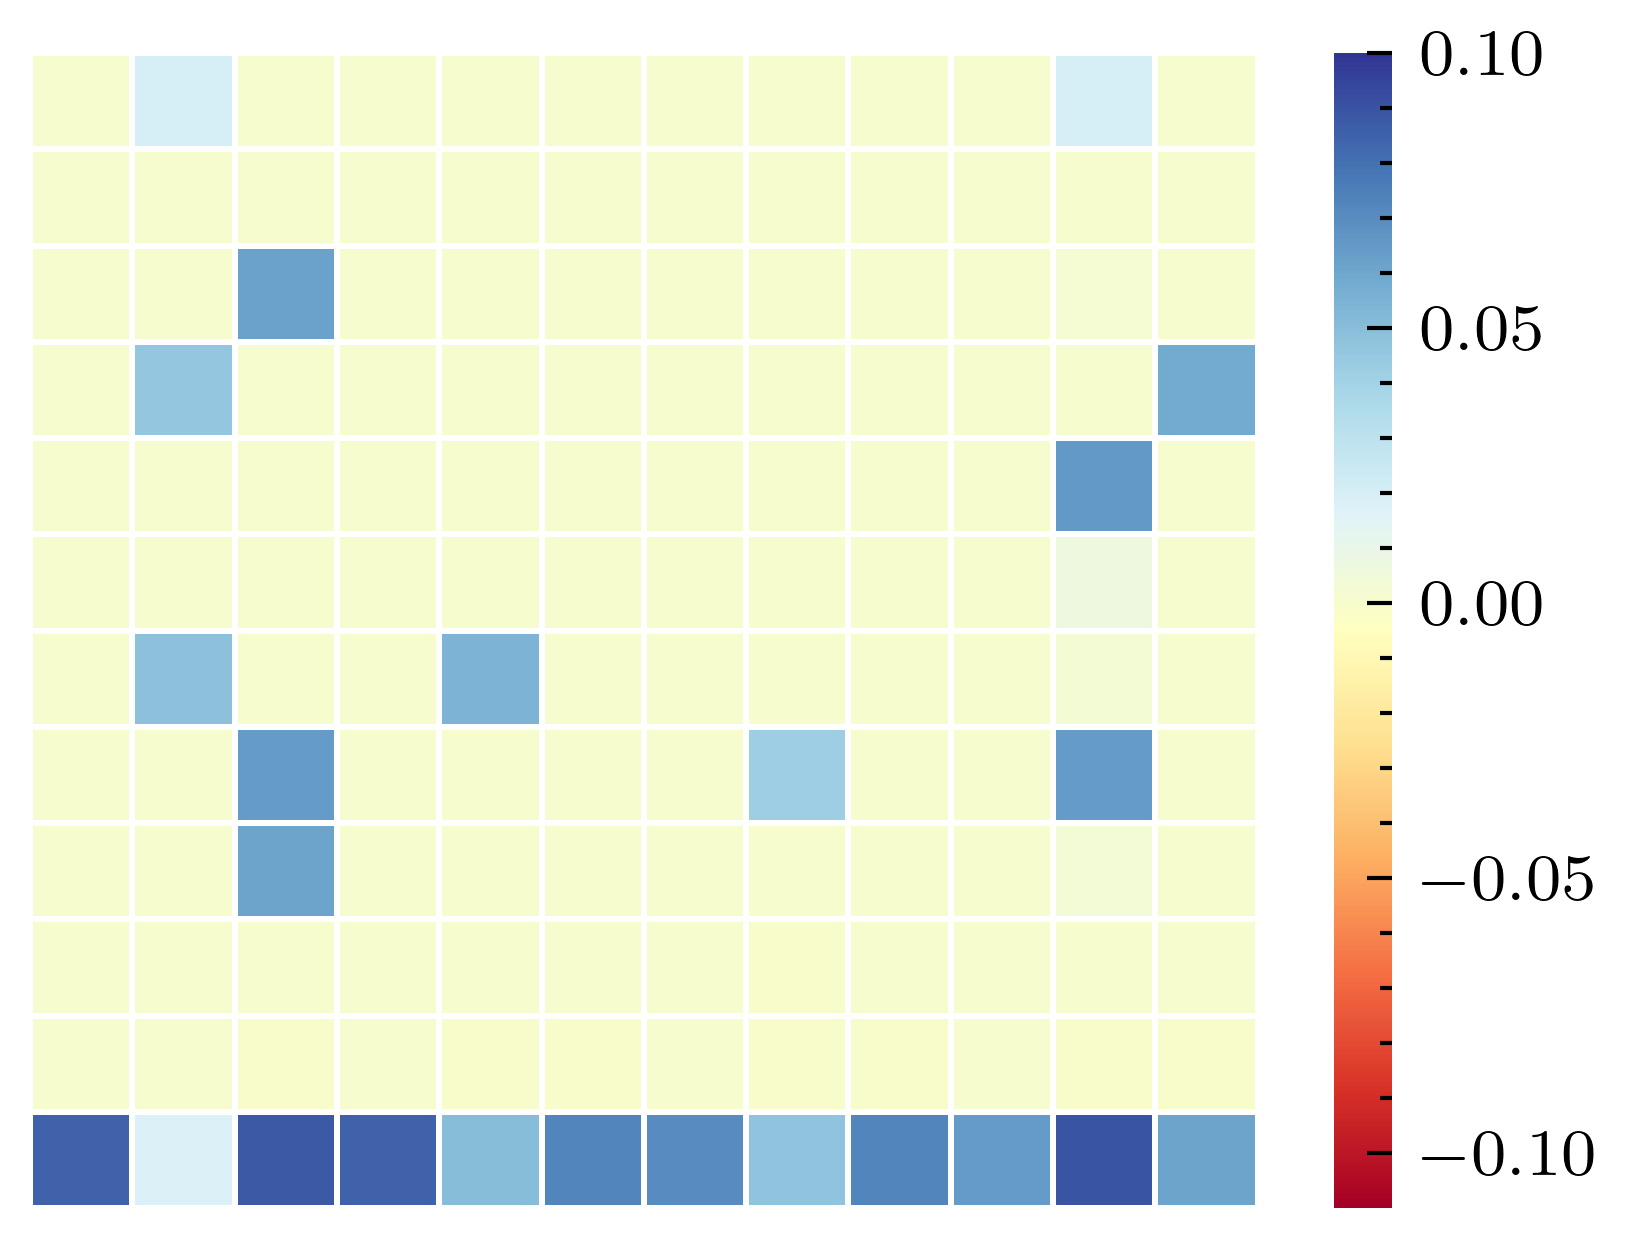

symbolic_transform_layer.1.down_conv.weight
(12, 12)


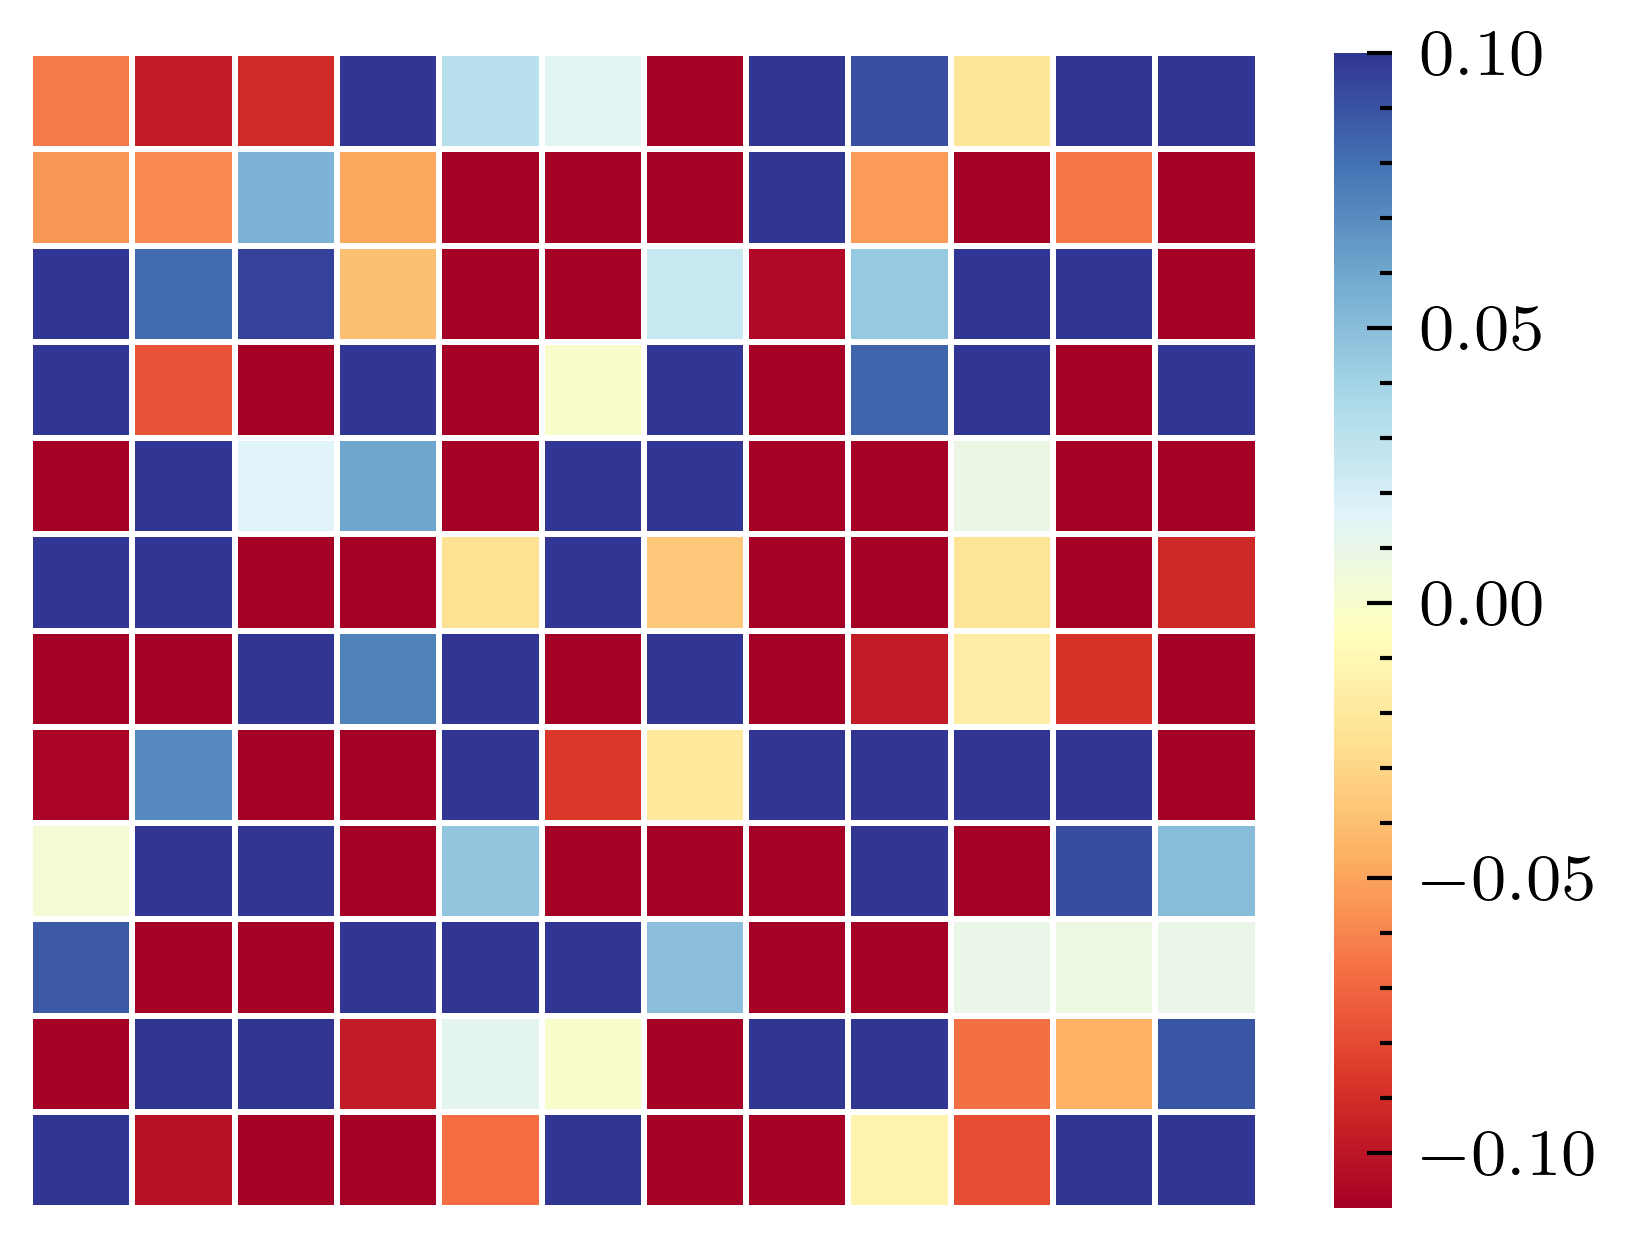

symbolic_transform_layer.1.down_conv.weight
(12, 12)


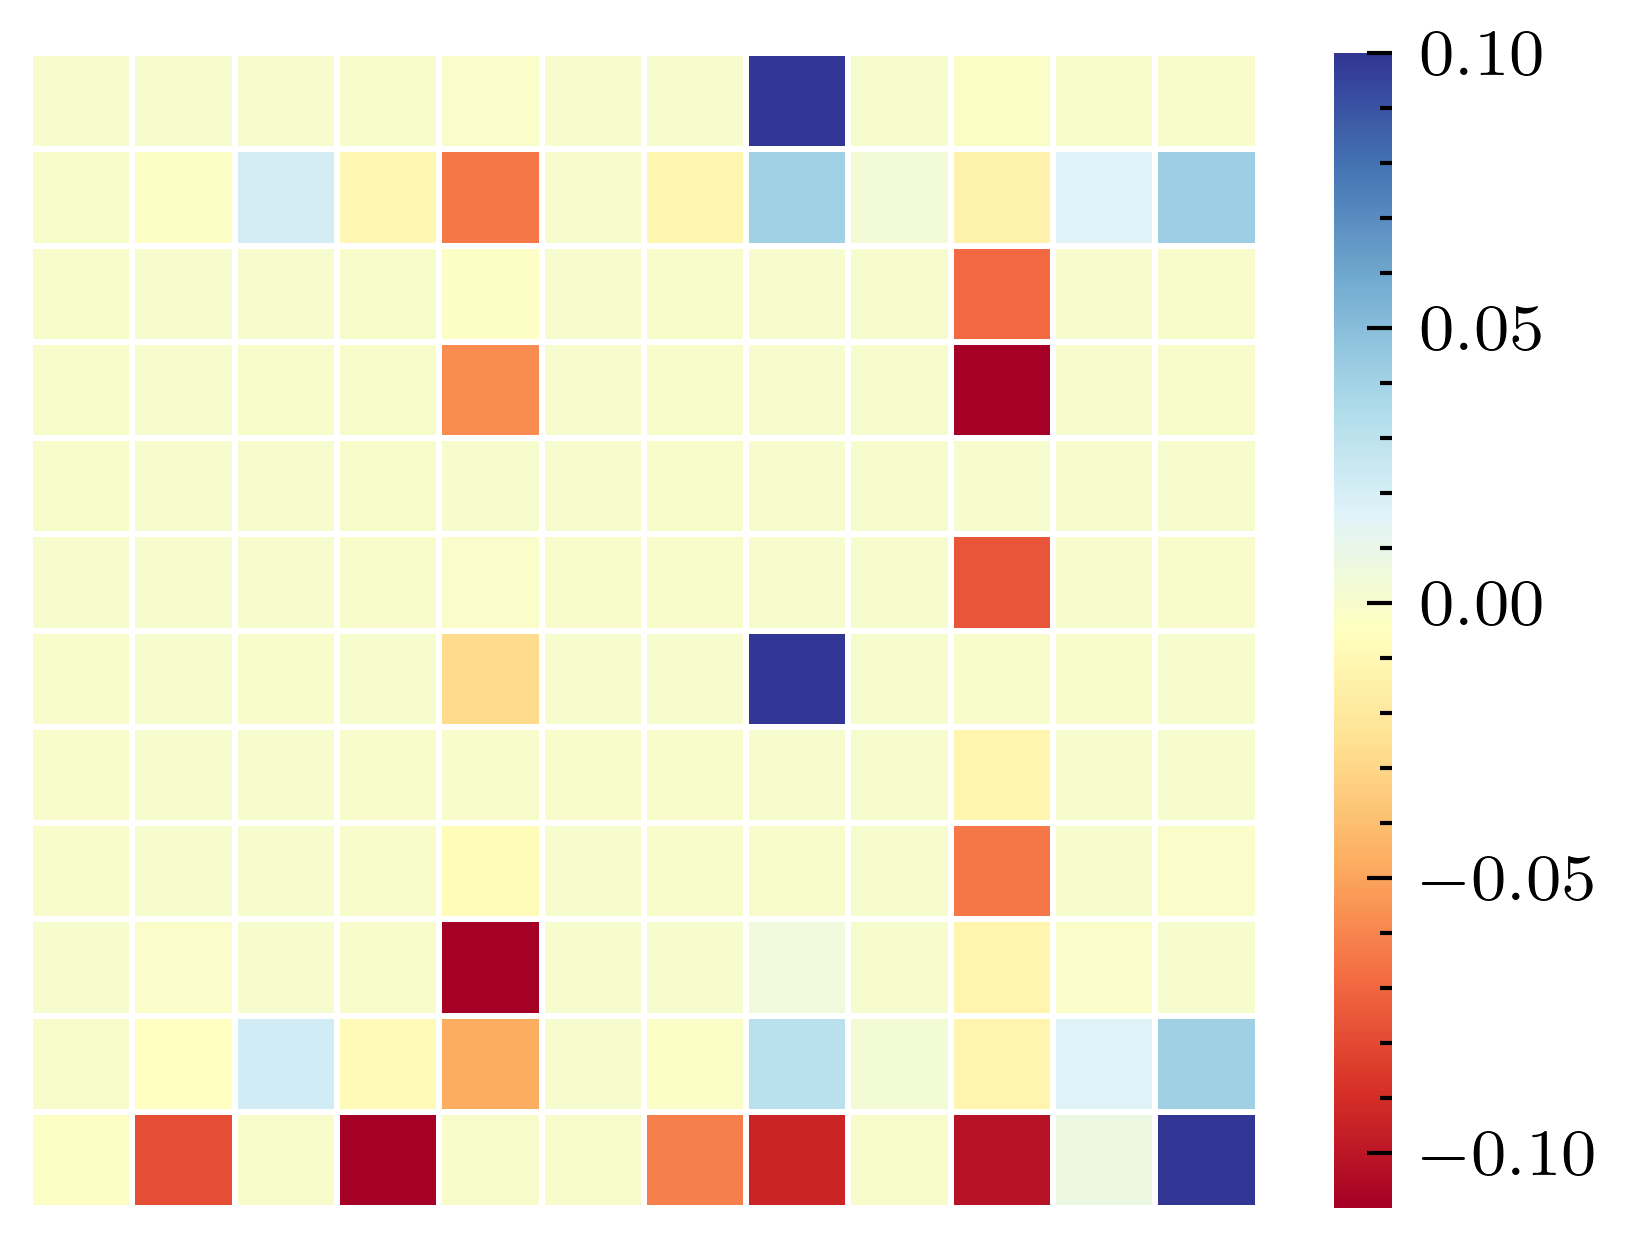

symbolic_transform_layer.1.down_conv.weight
(12, 12)


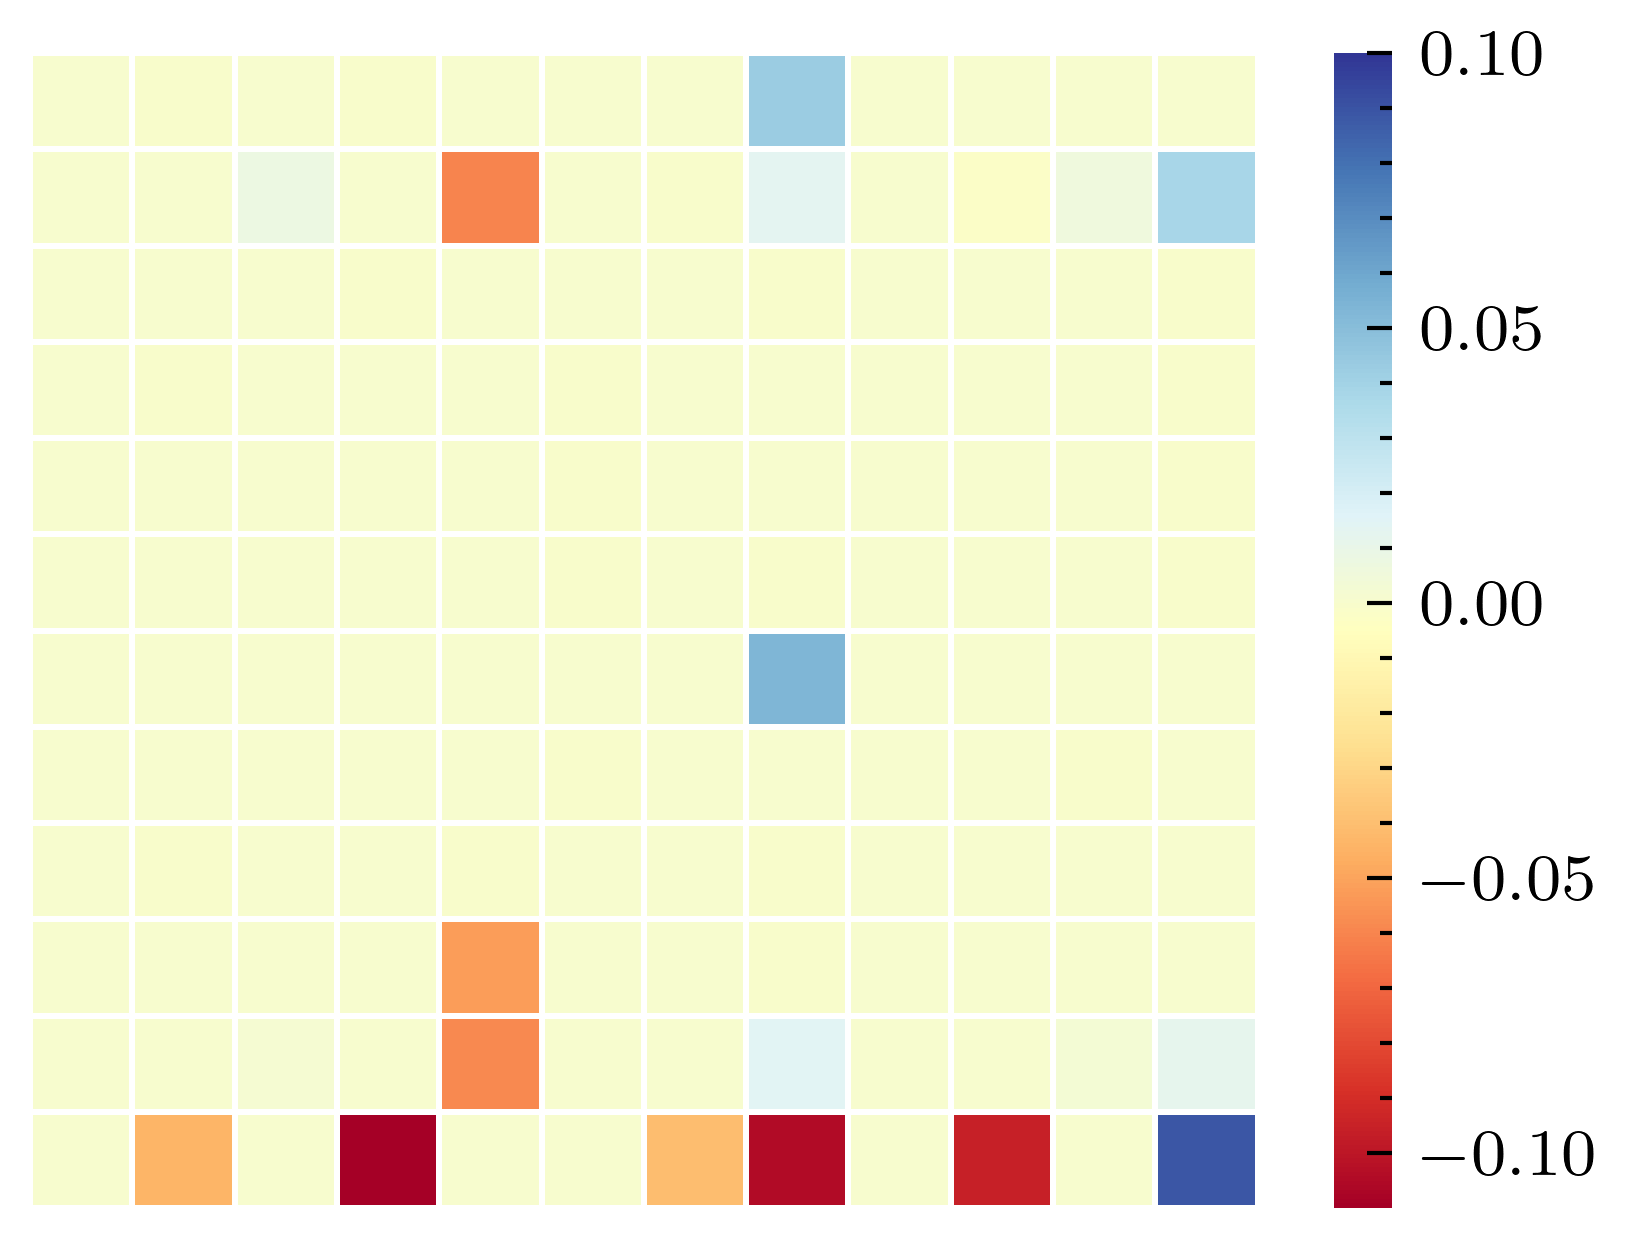

symbolic_transform_layer.2.channel_conv.weight
(12, 12)


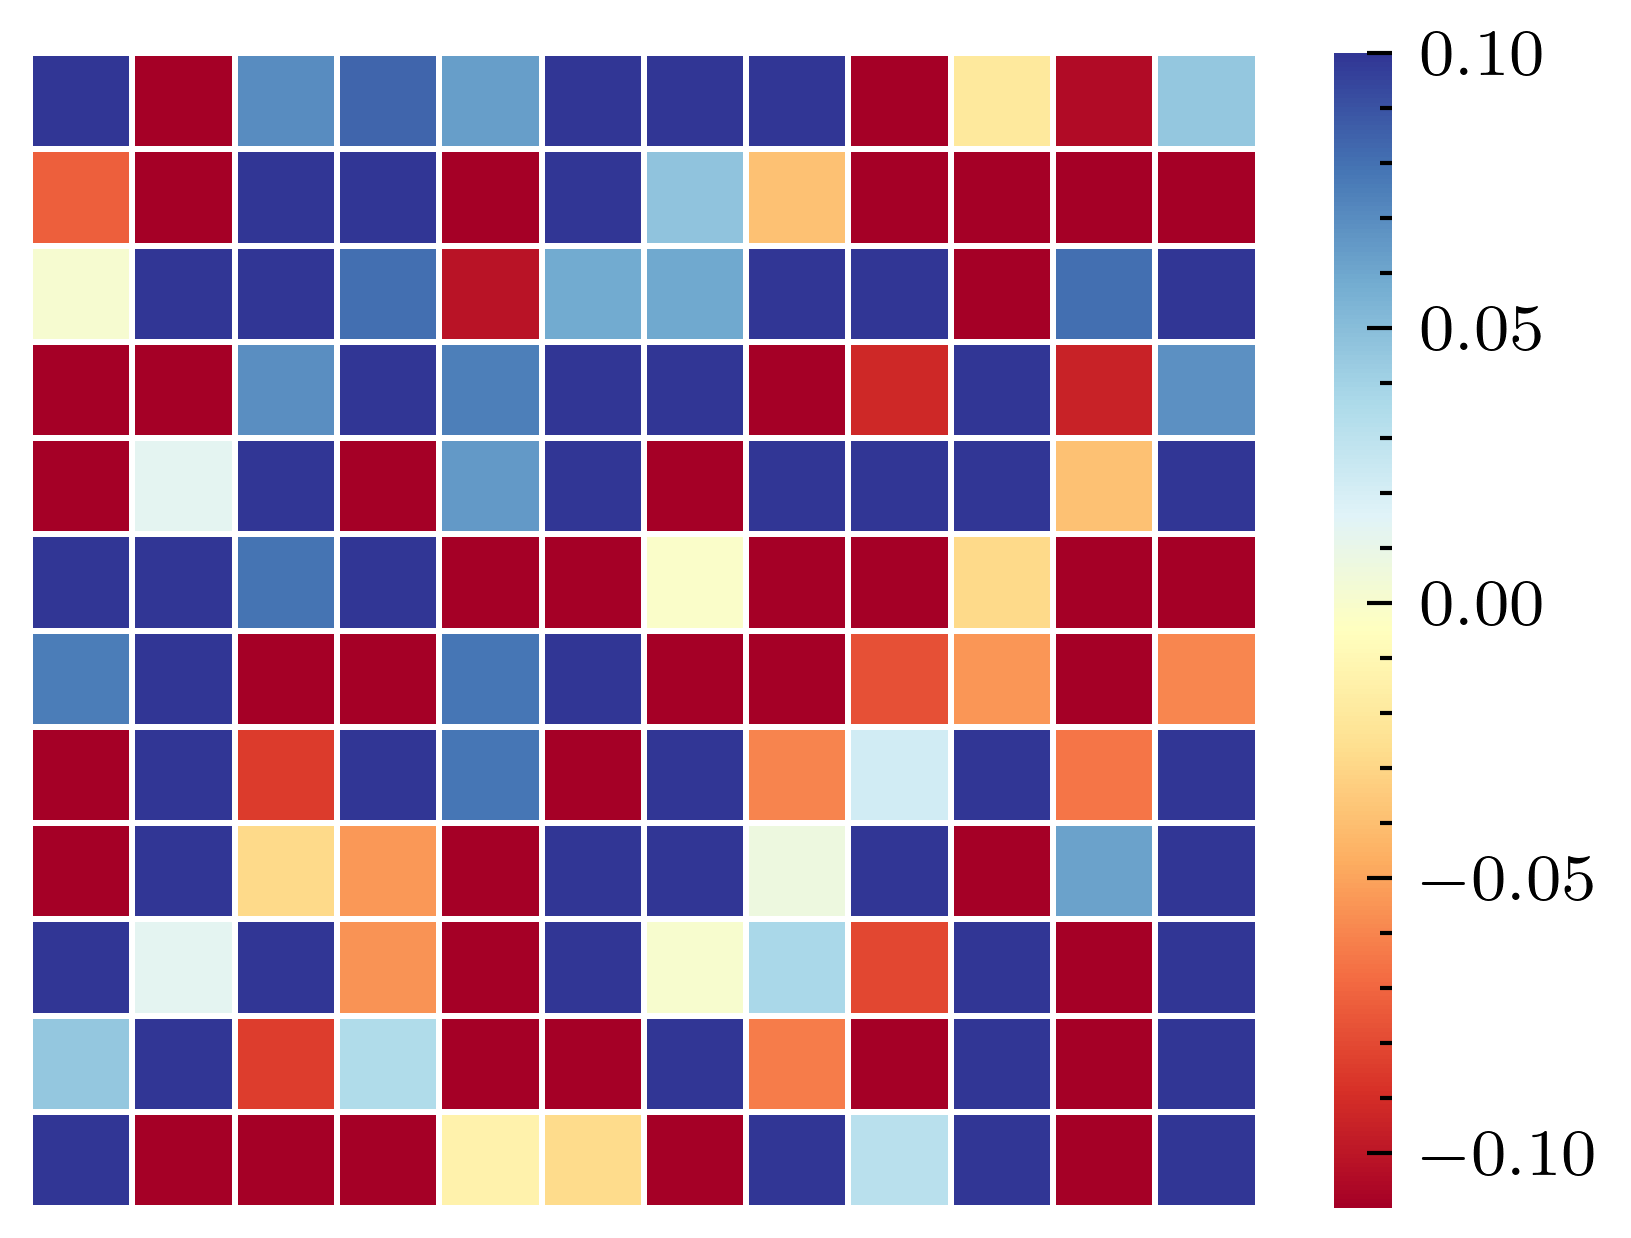

symbolic_transform_layer.2.channel_conv.weight
(12, 12)


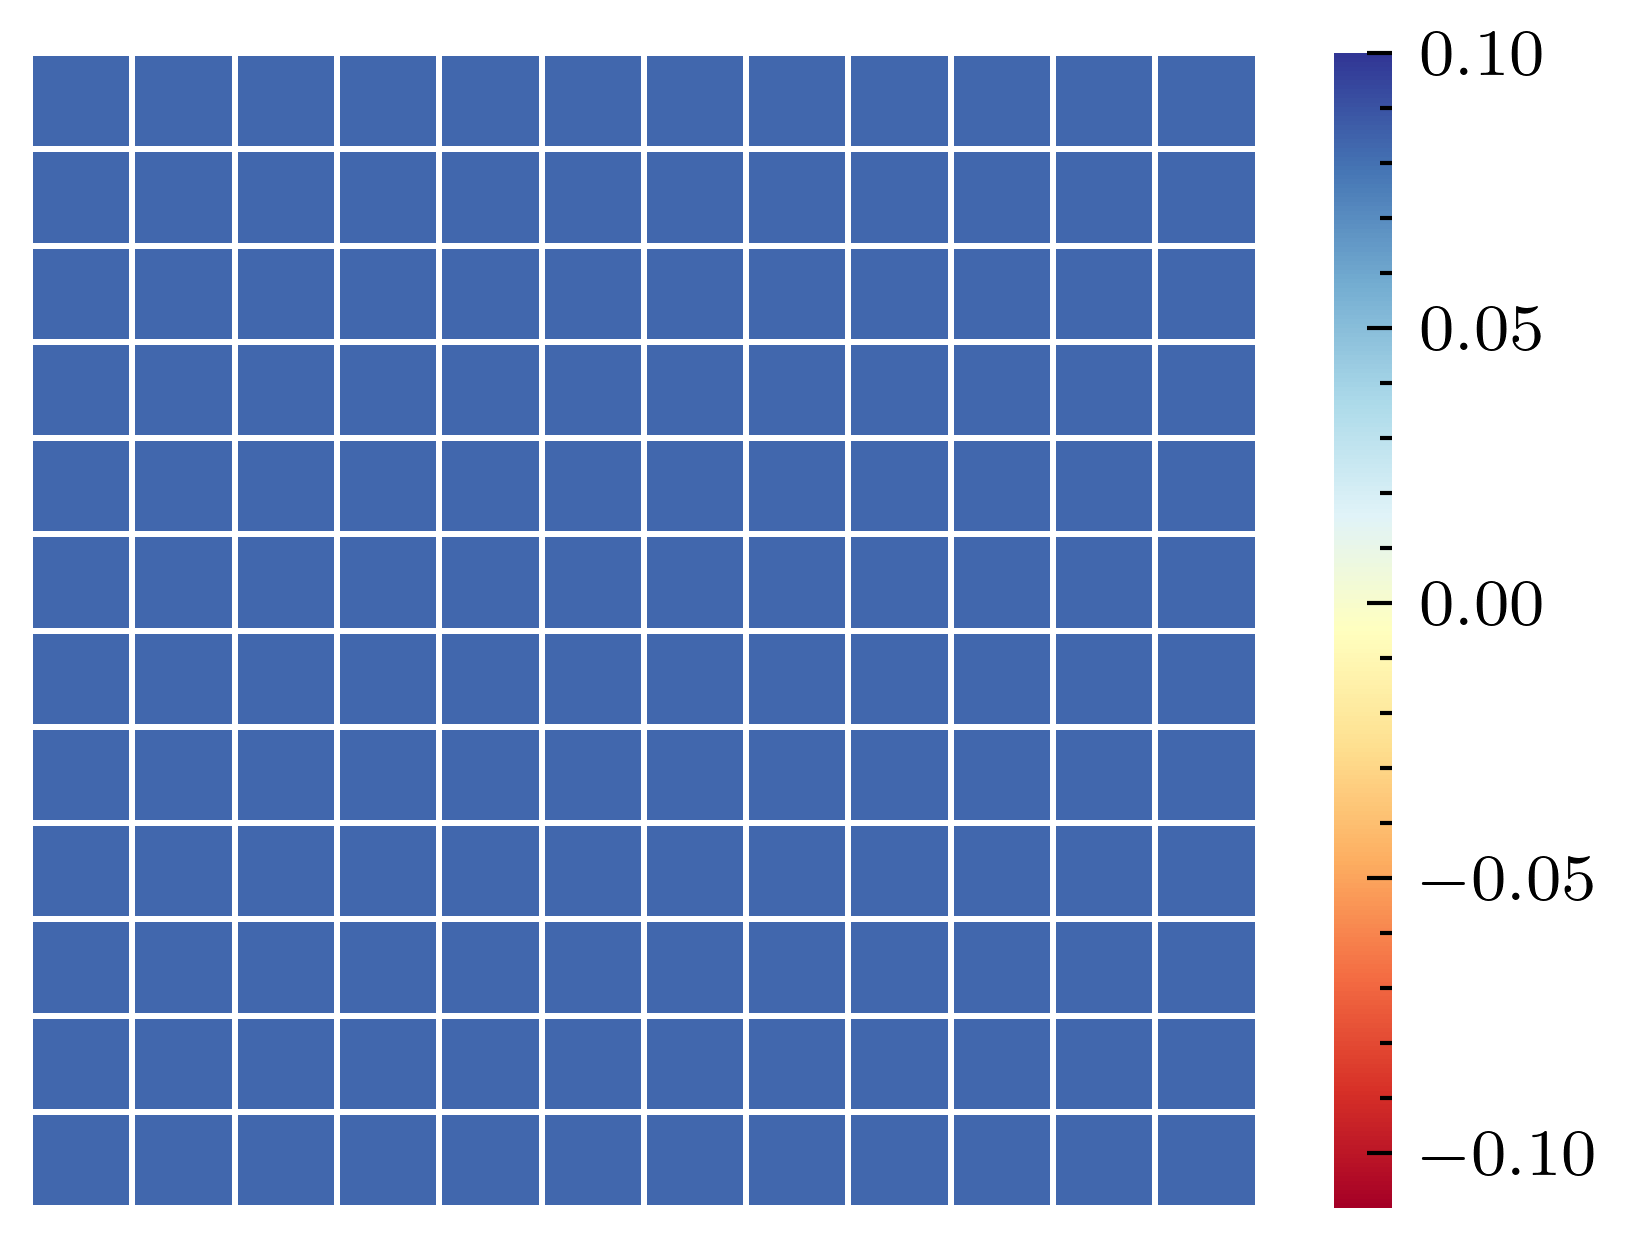

symbolic_transform_layer.2.channel_conv.weight
(12, 12)


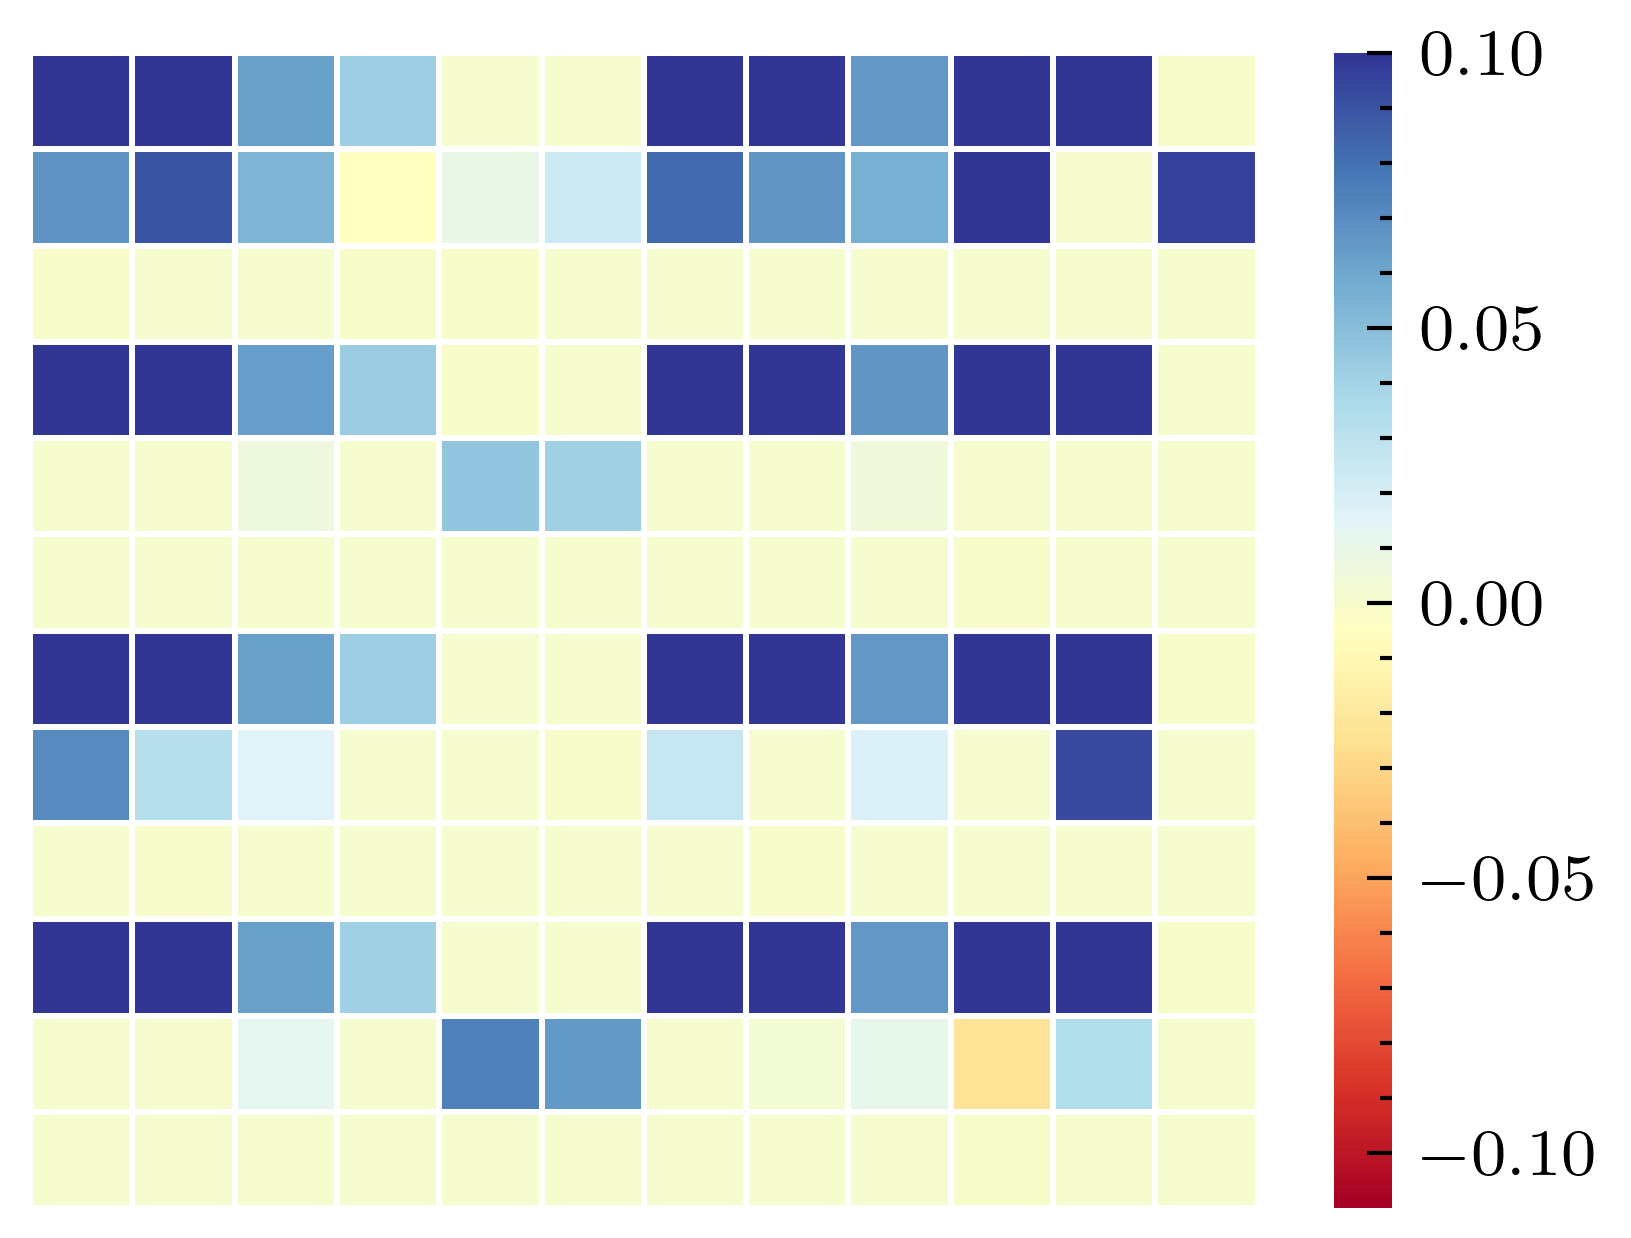

symbolic_transform_layer.2.down_conv.weight
(12, 12)


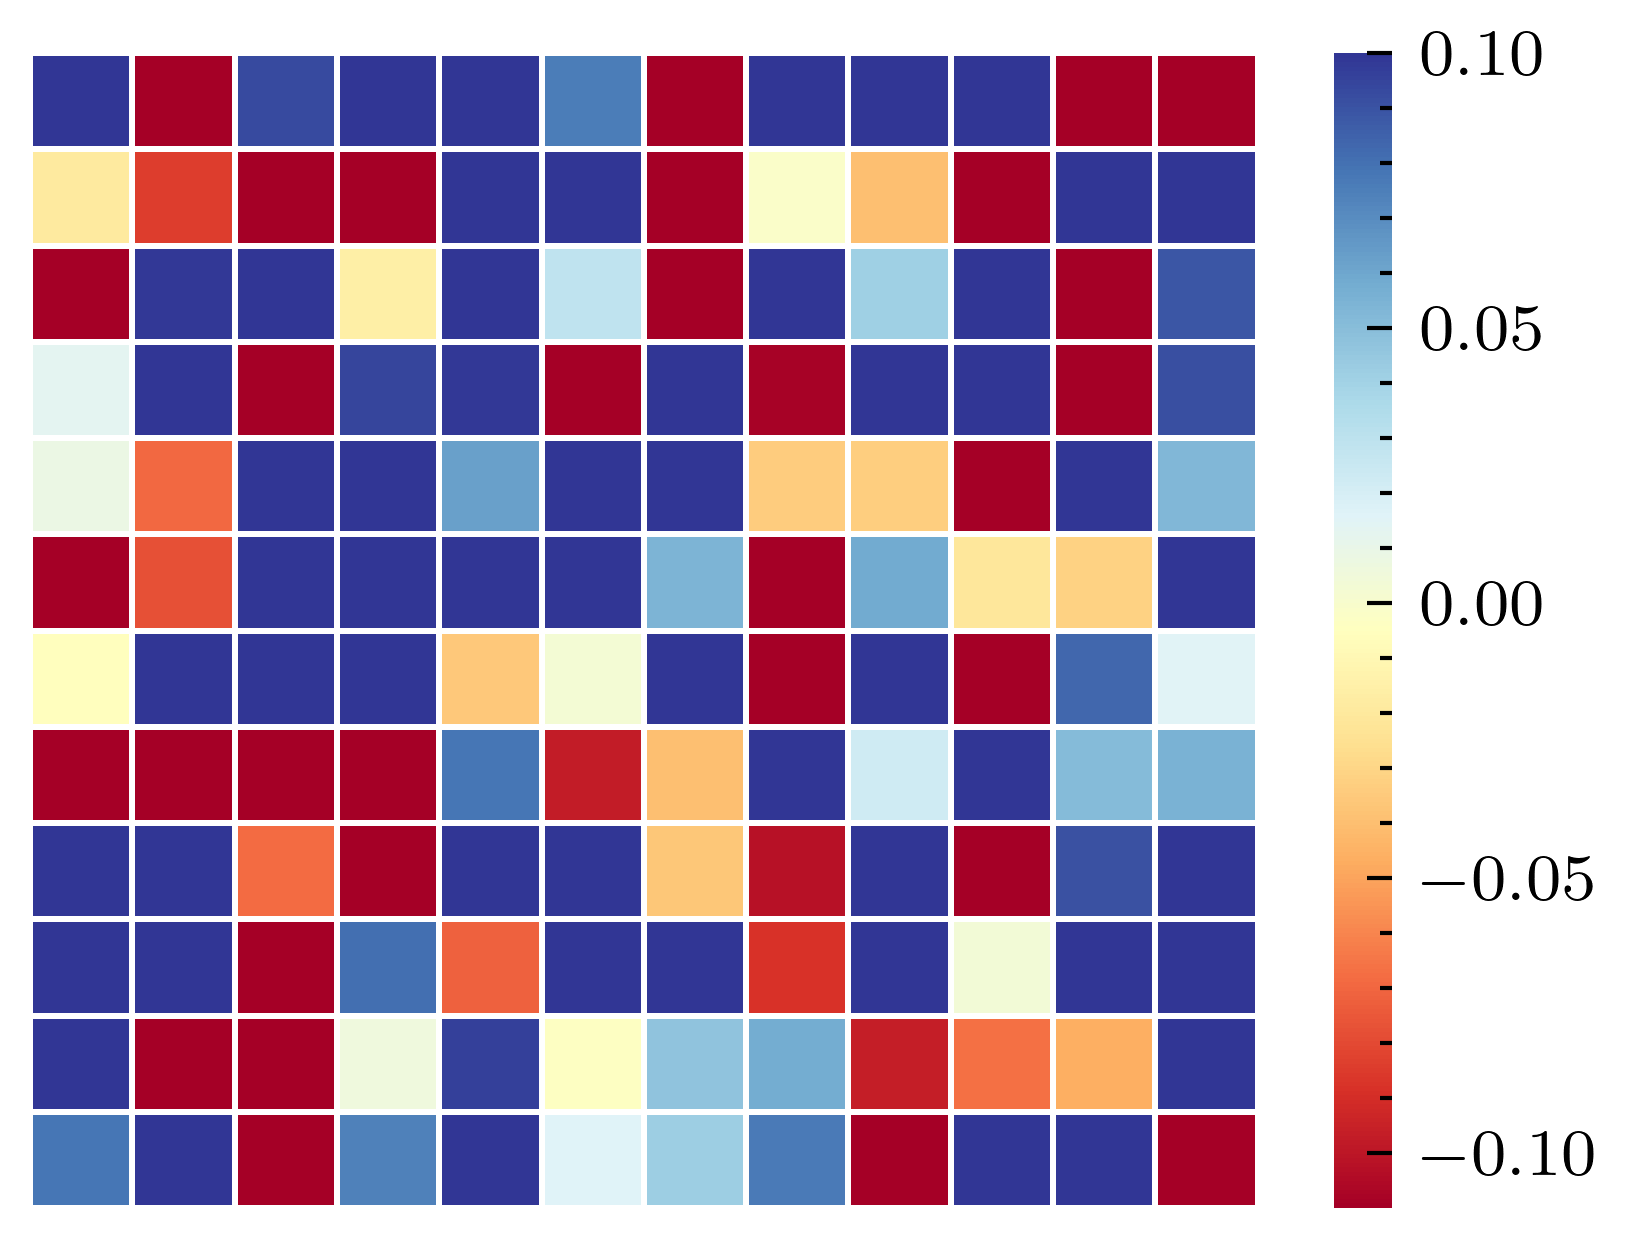

symbolic_transform_layer.2.down_conv.weight
(12, 12)


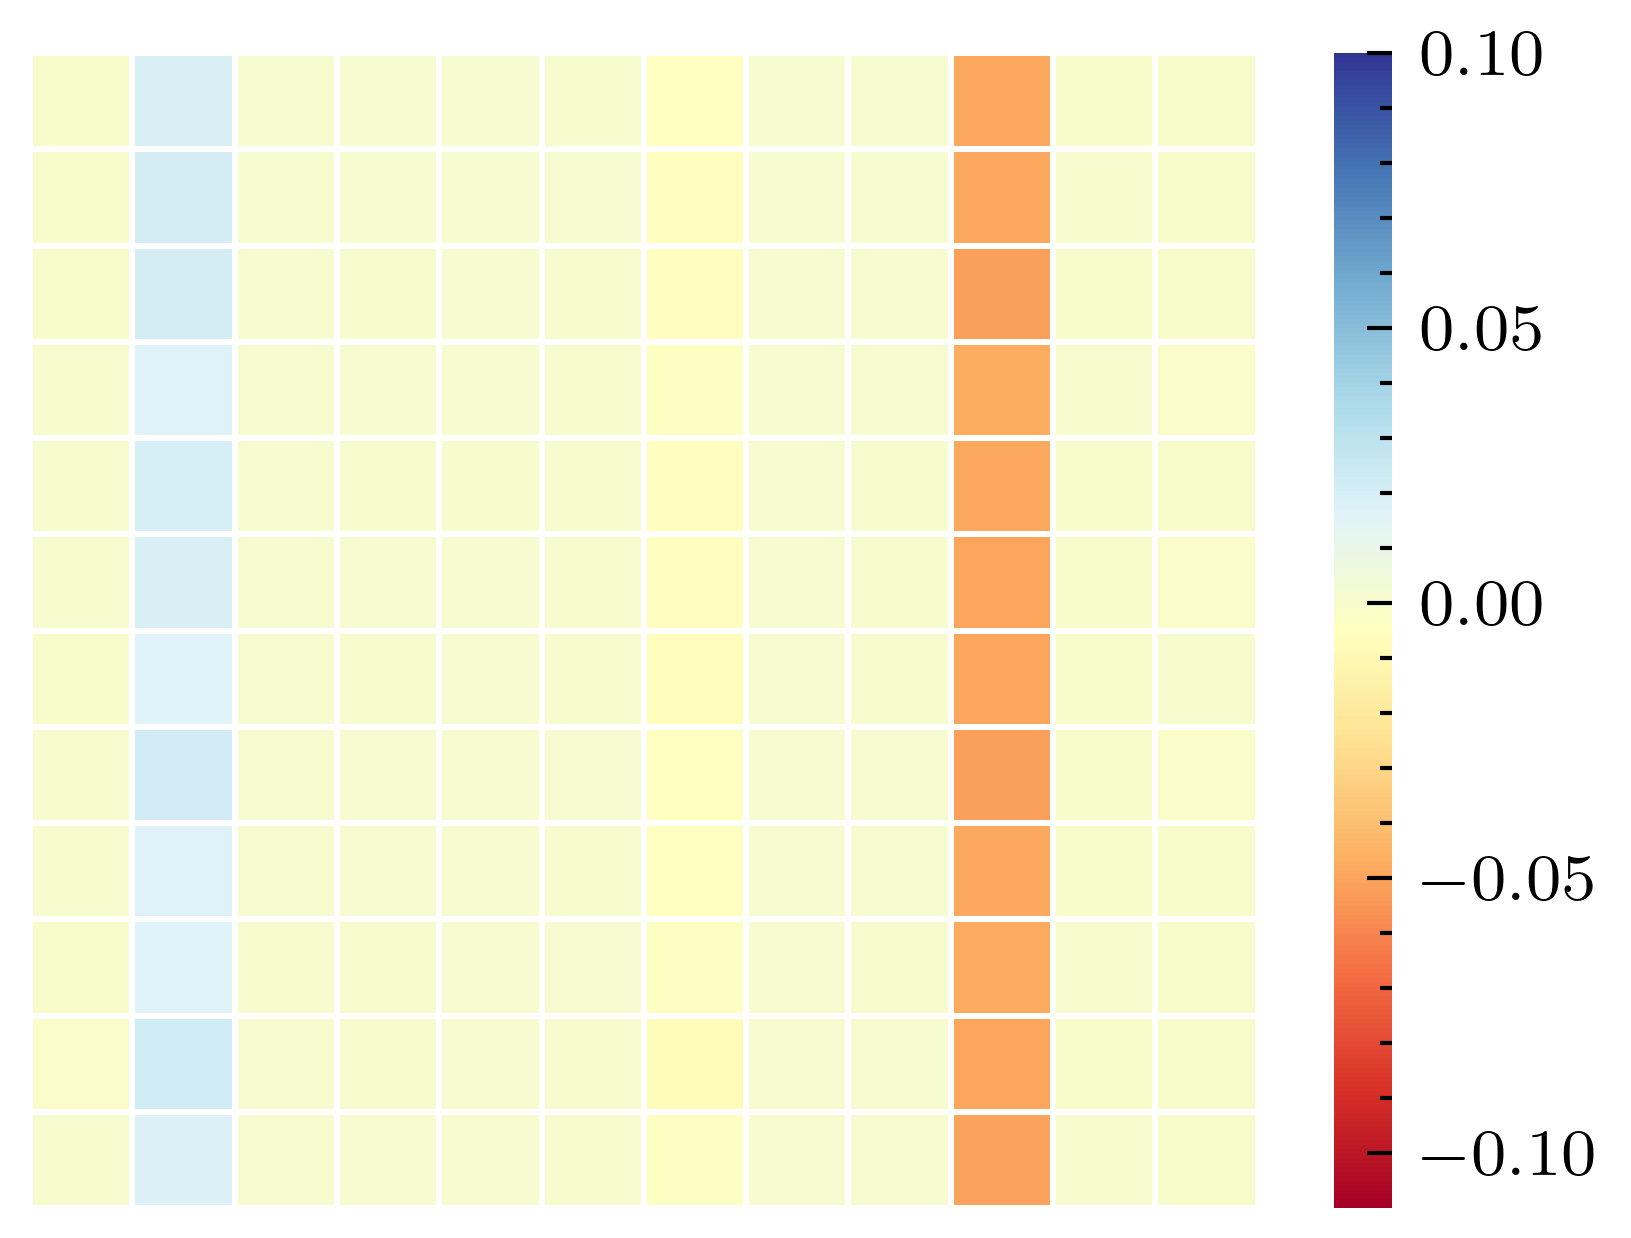

symbolic_transform_layer.2.down_conv.weight
(12, 12)


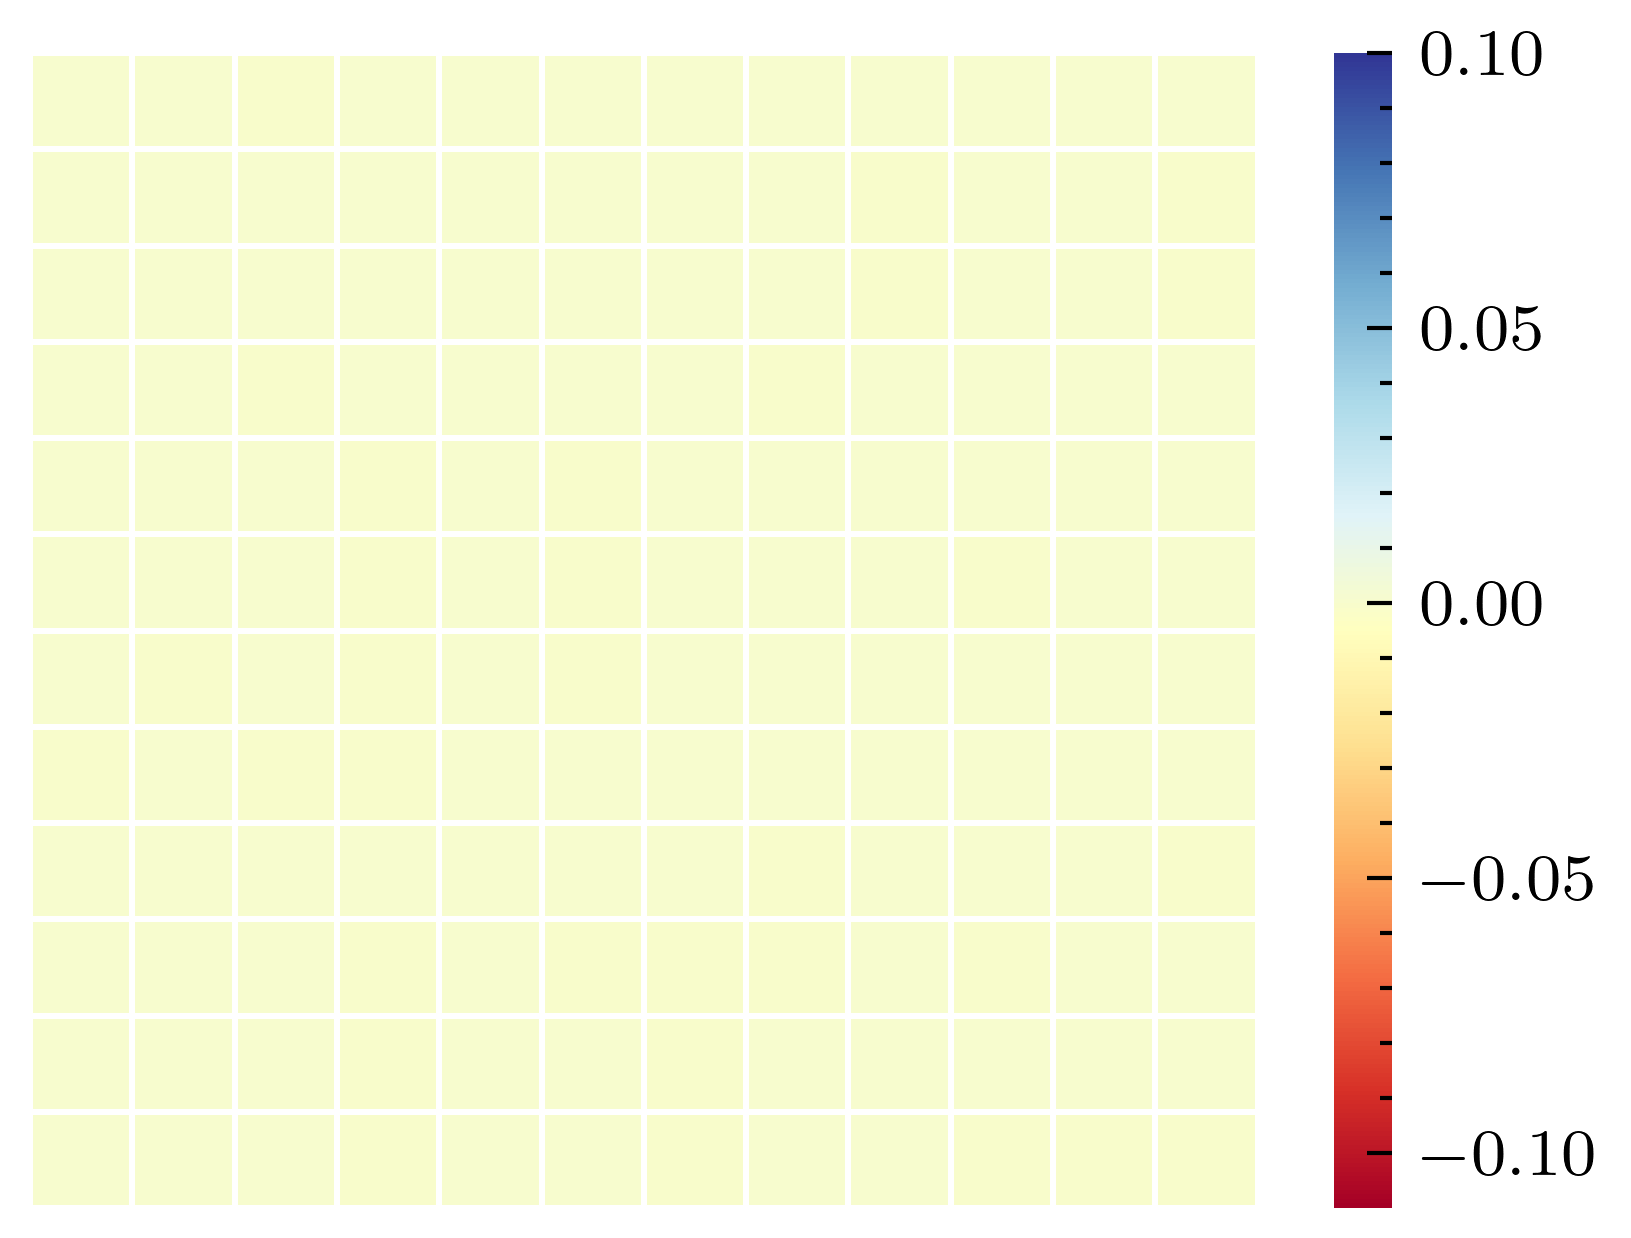

symbolic_feature_layer.0.channel_conv.weight
(12, 12)


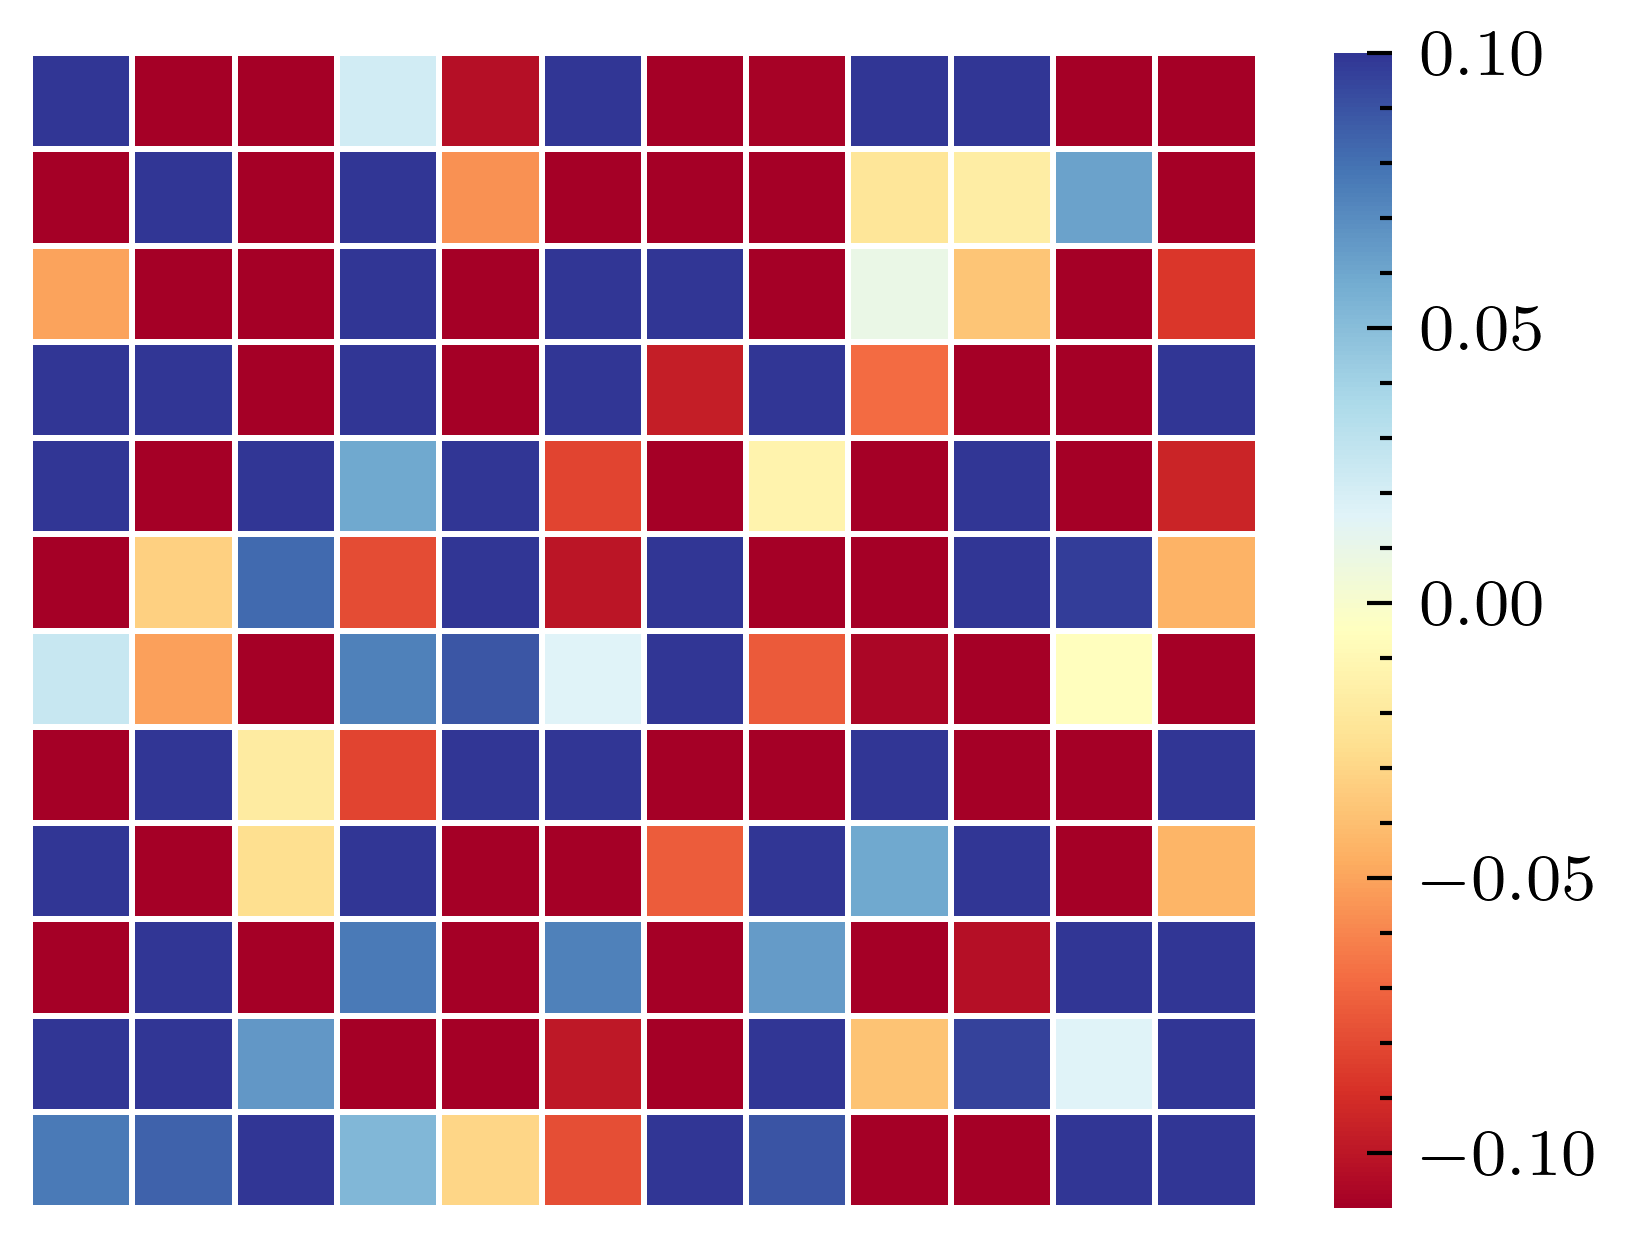

symbolic_feature_layer.0.channel_conv.weight
(12, 12)


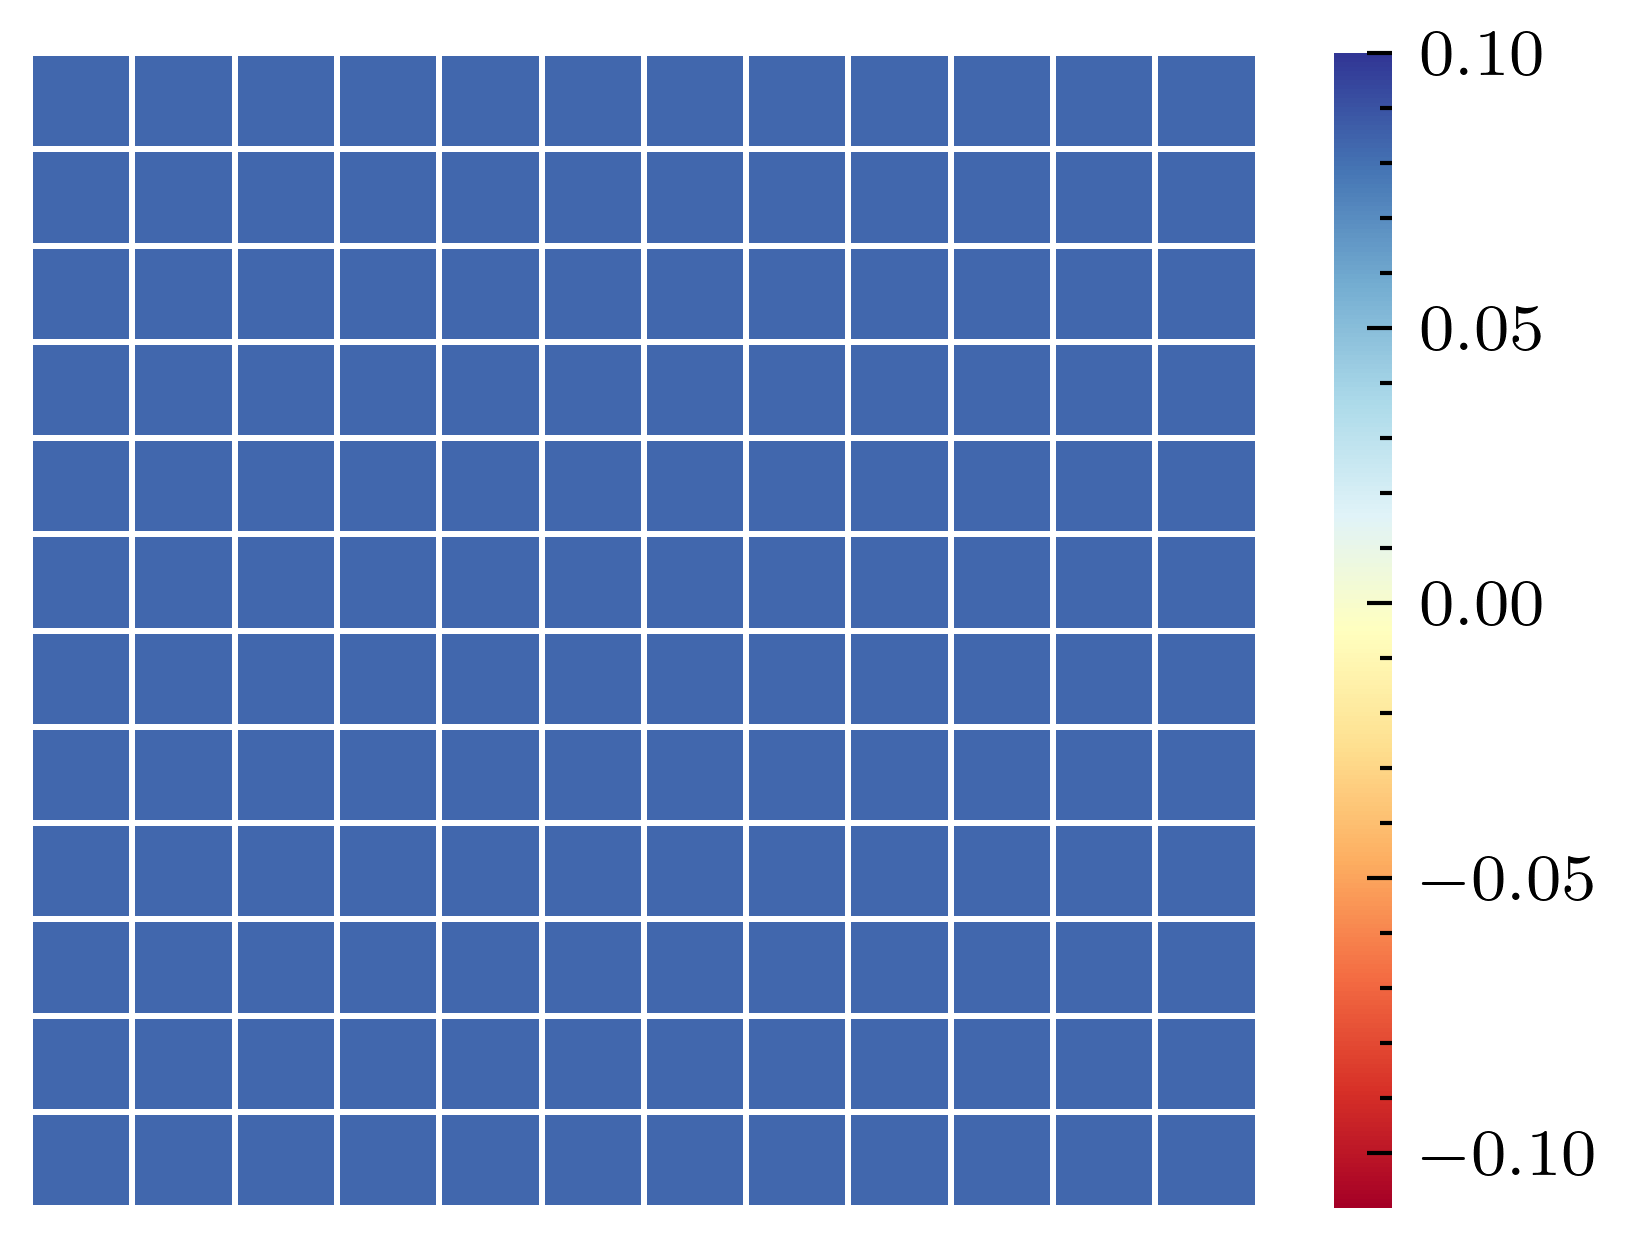

symbolic_feature_layer.0.channel_conv.weight
(12, 12)


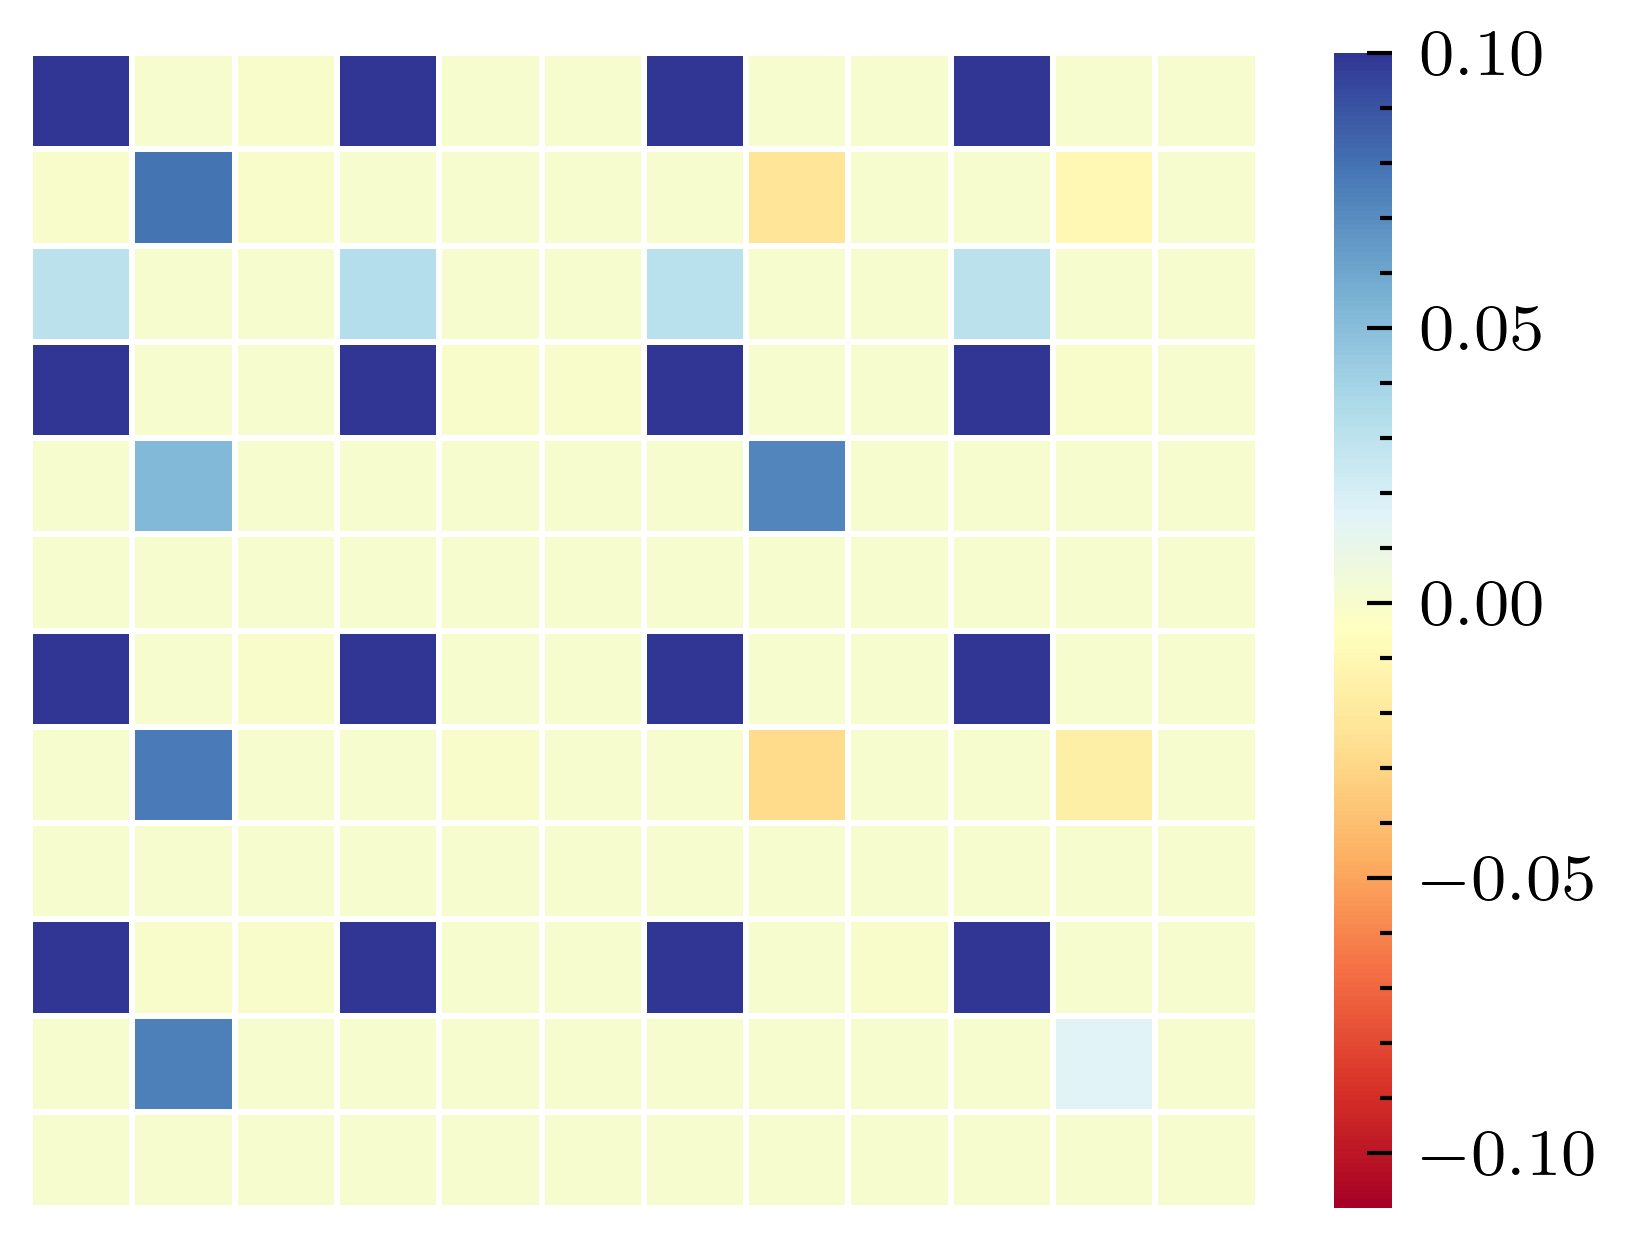

symbolic_feature_layer.0.down_conv.weight
(12, 12)


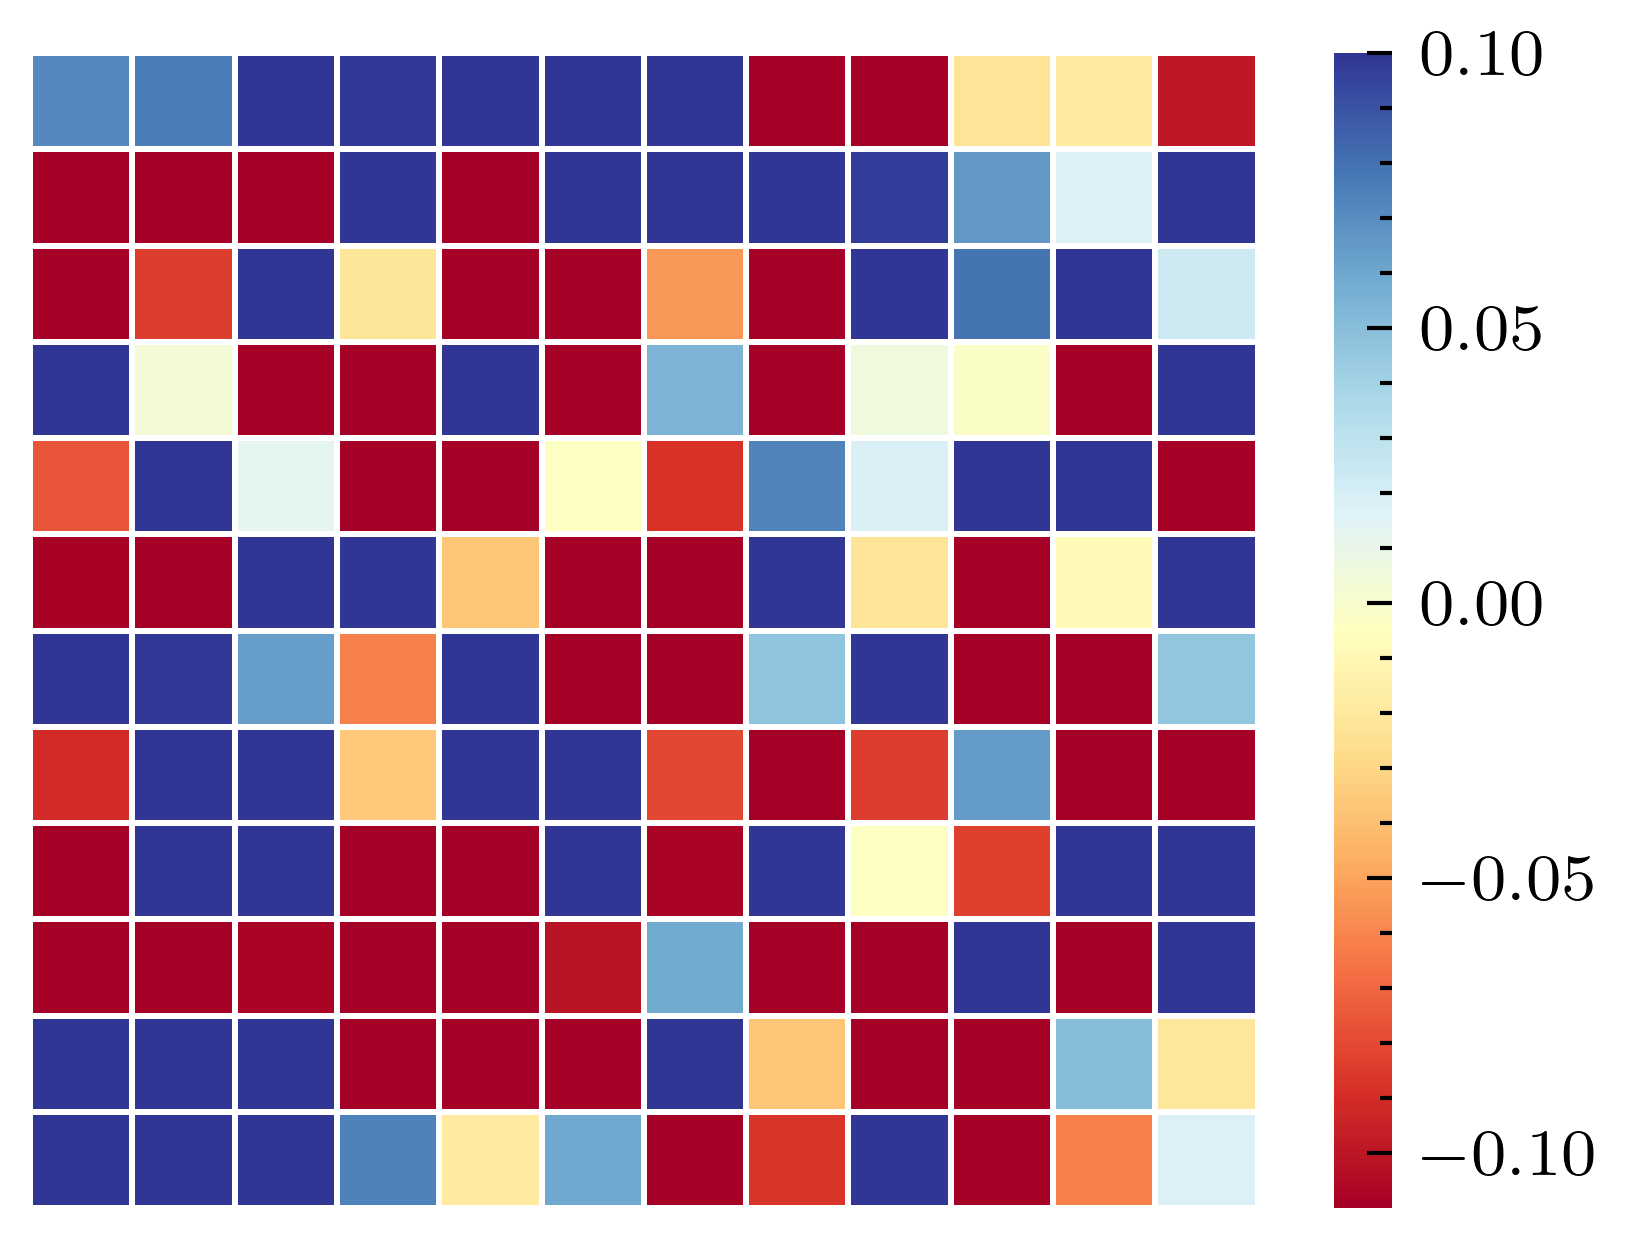

symbolic_feature_layer.0.down_conv.weight
(12, 12)


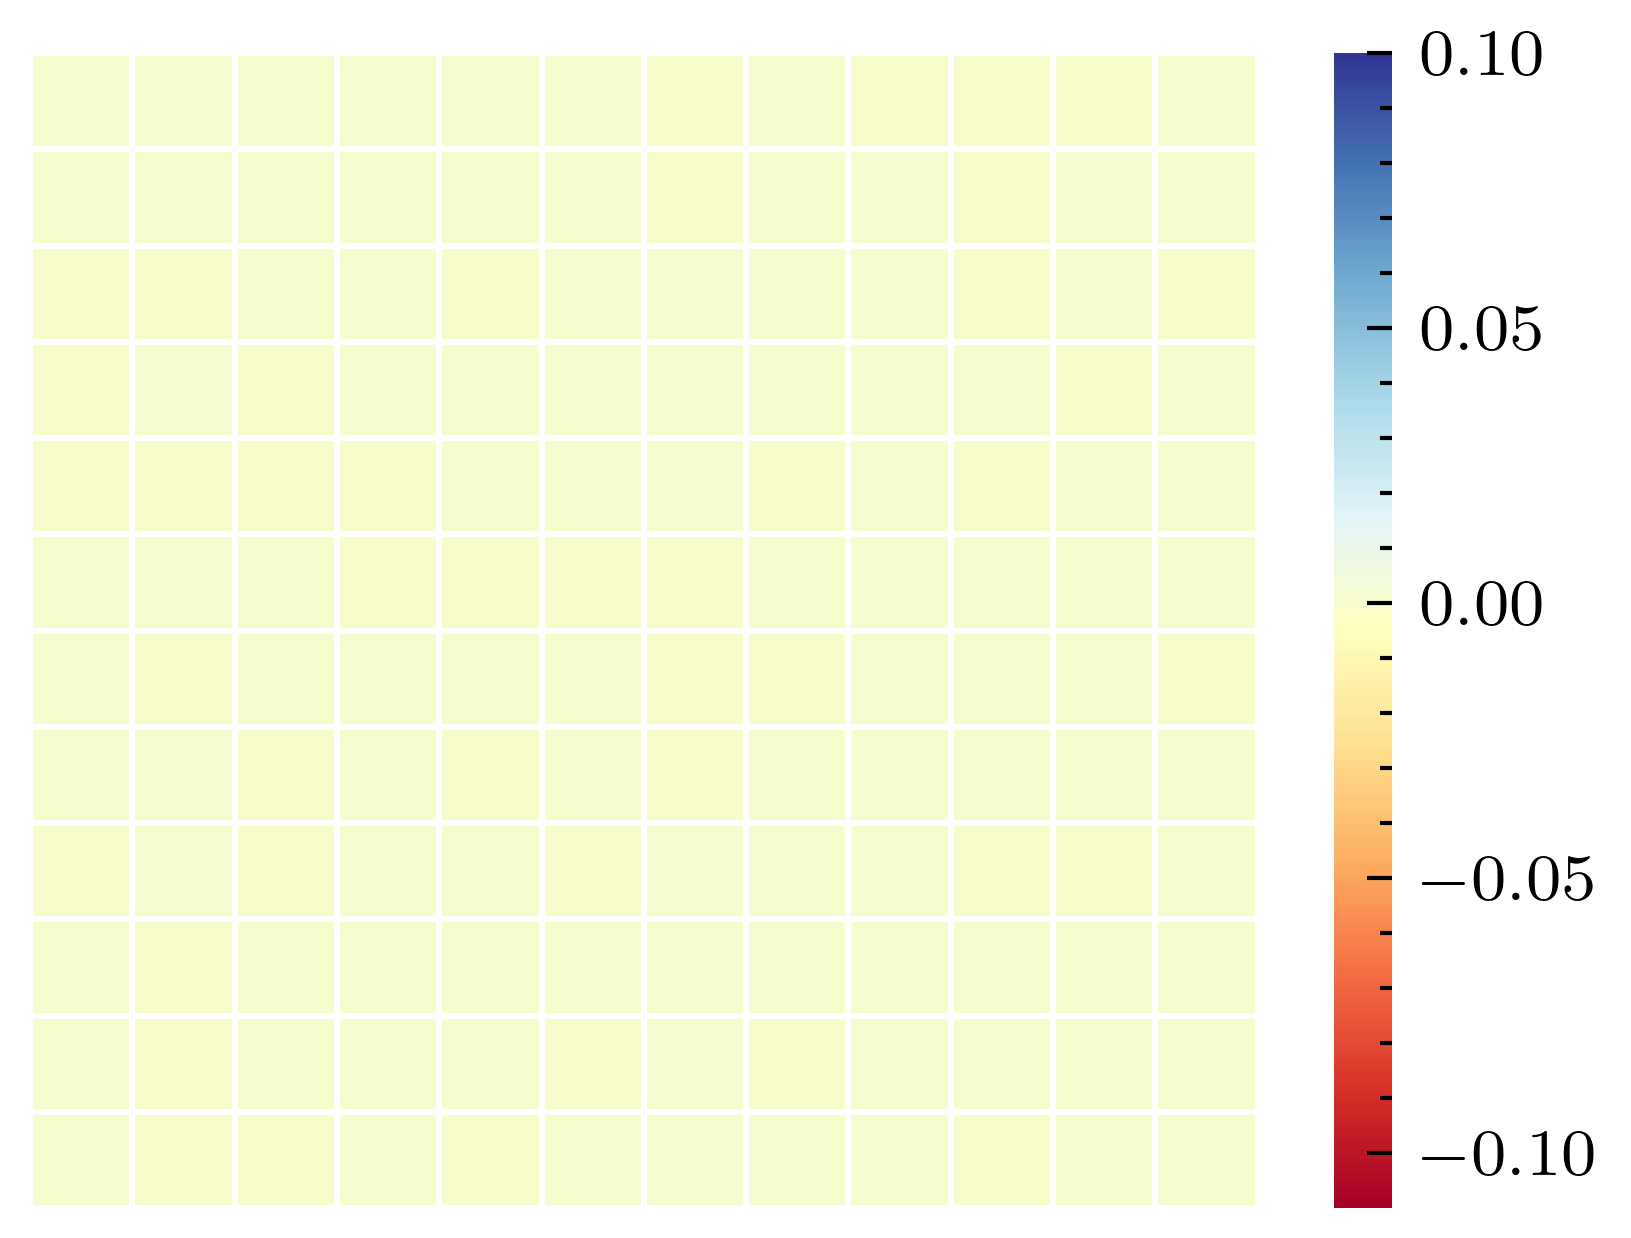

symbolic_feature_layer.0.down_conv.weight
(12, 12)


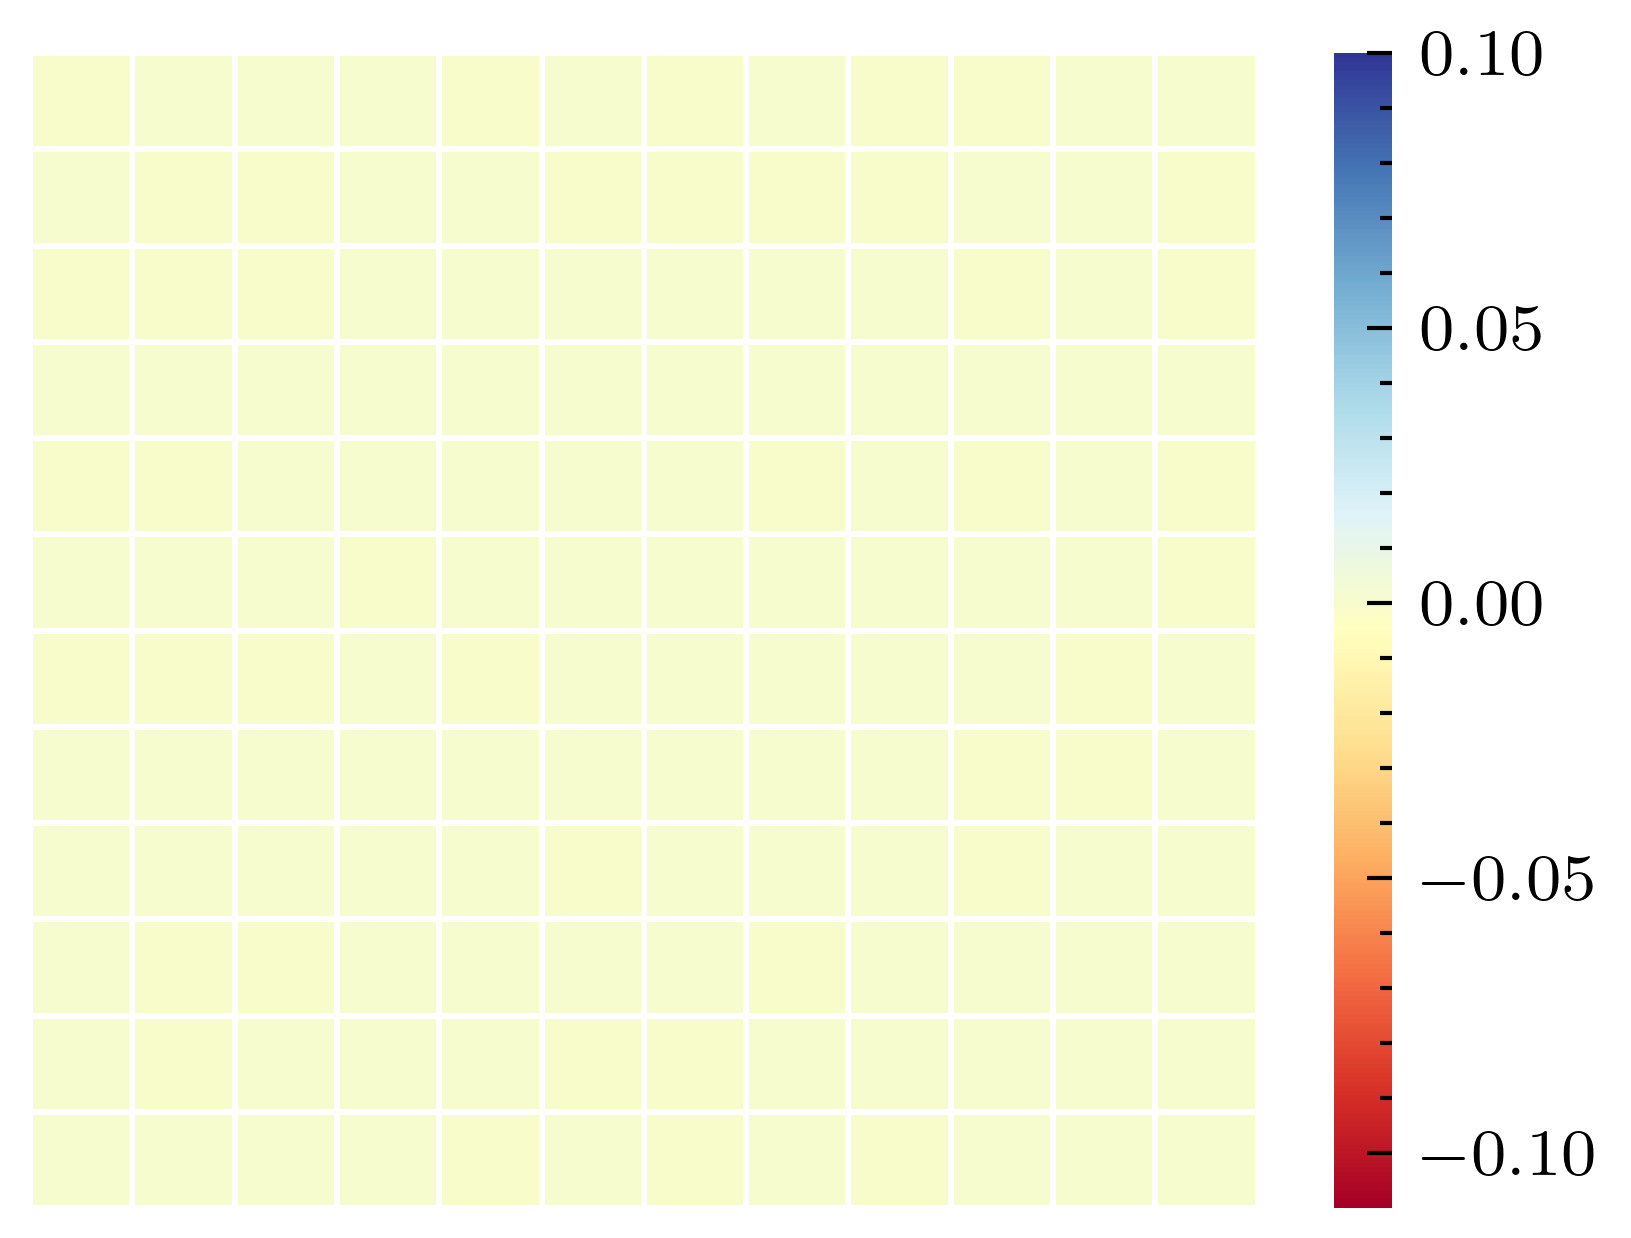

symbolic_regression_layer.0.channel_conv.weight
(52, 12)


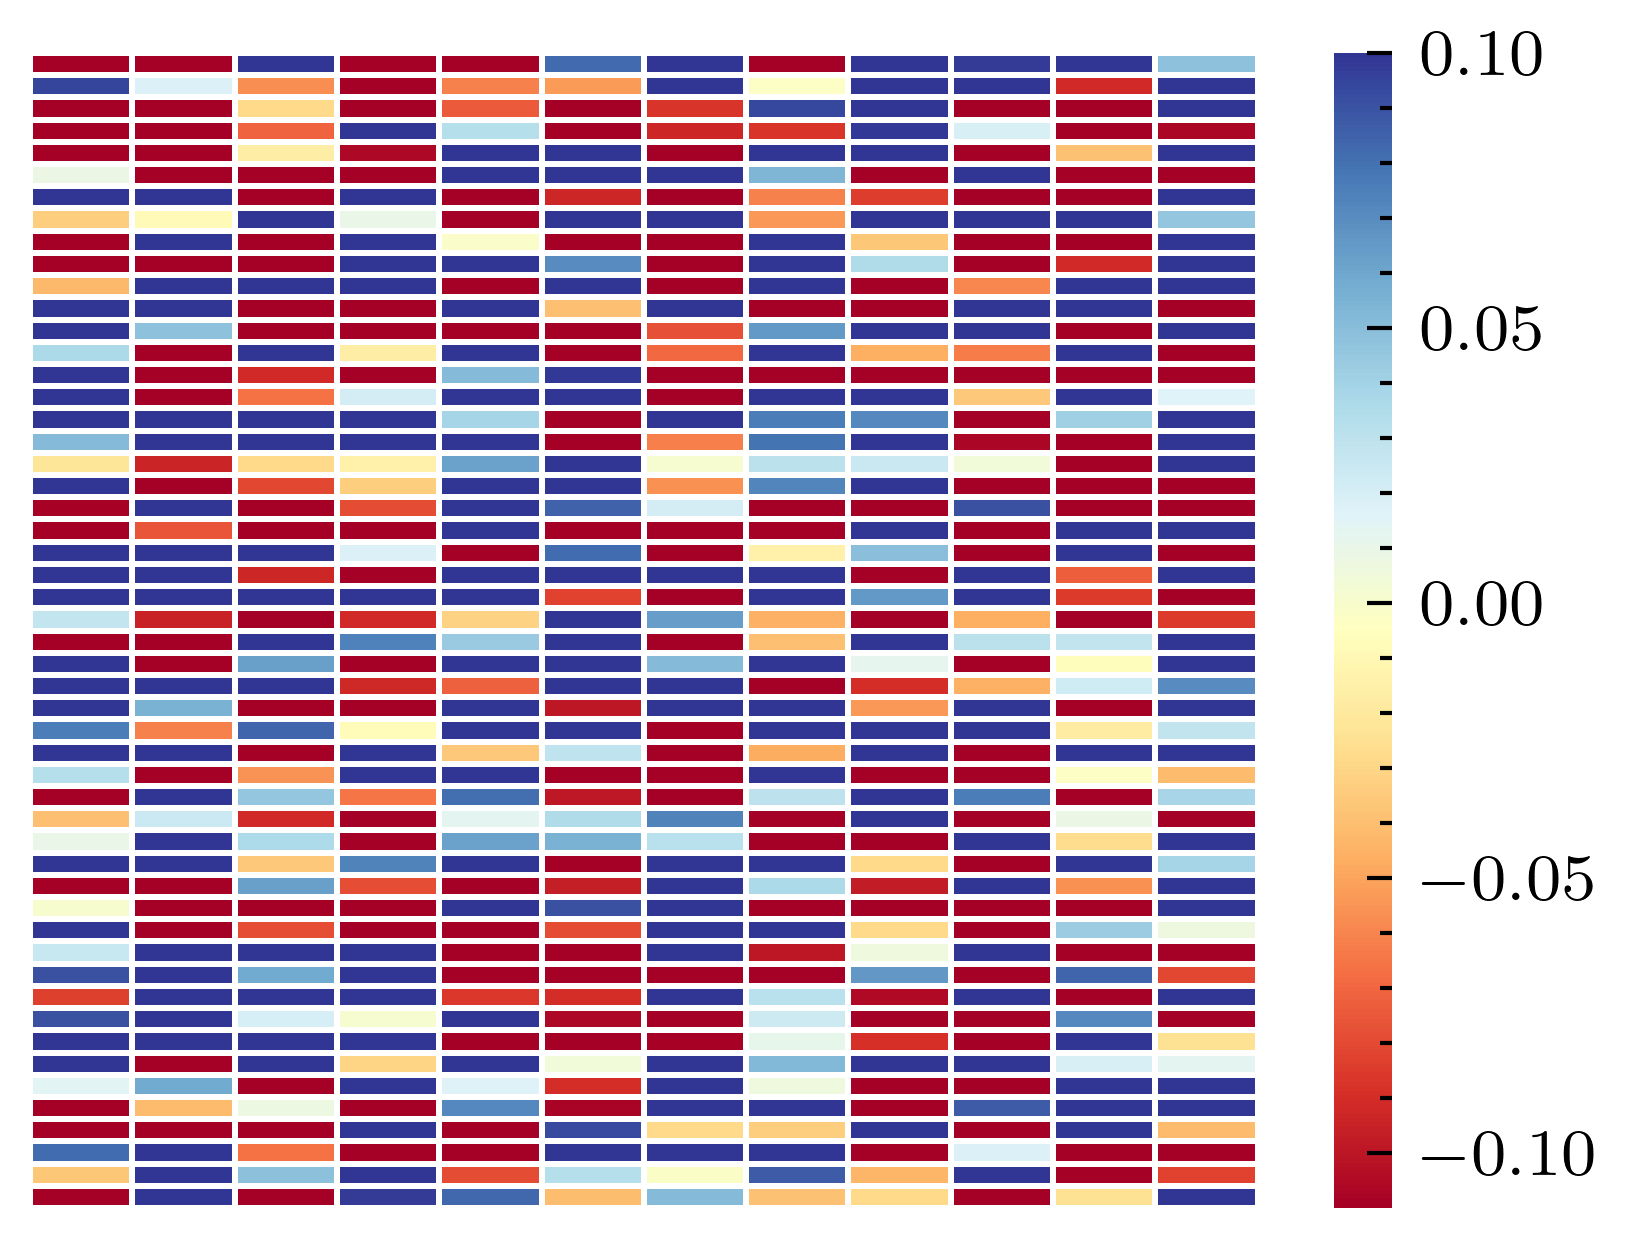

symbolic_regression_layer.0.channel_conv.weight
(52, 12)


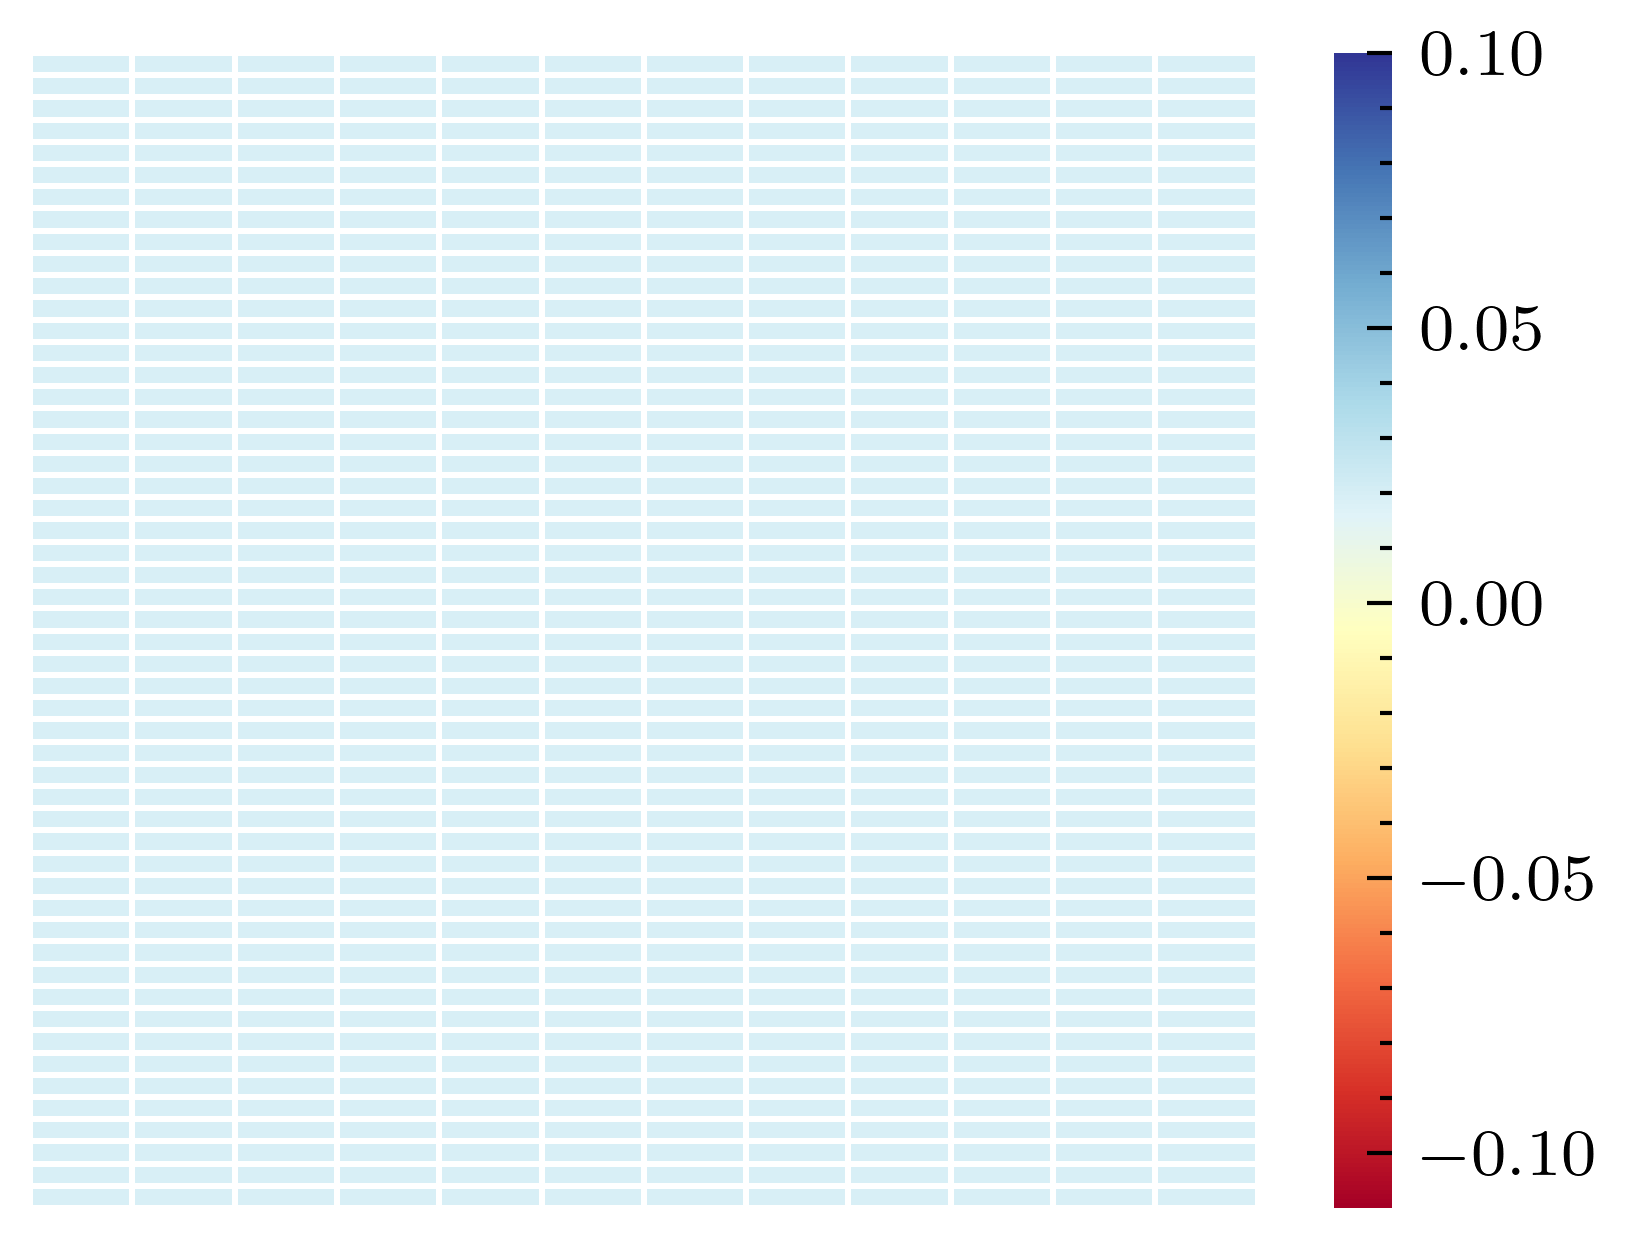

symbolic_regression_layer.0.channel_conv.weight
(52, 12)


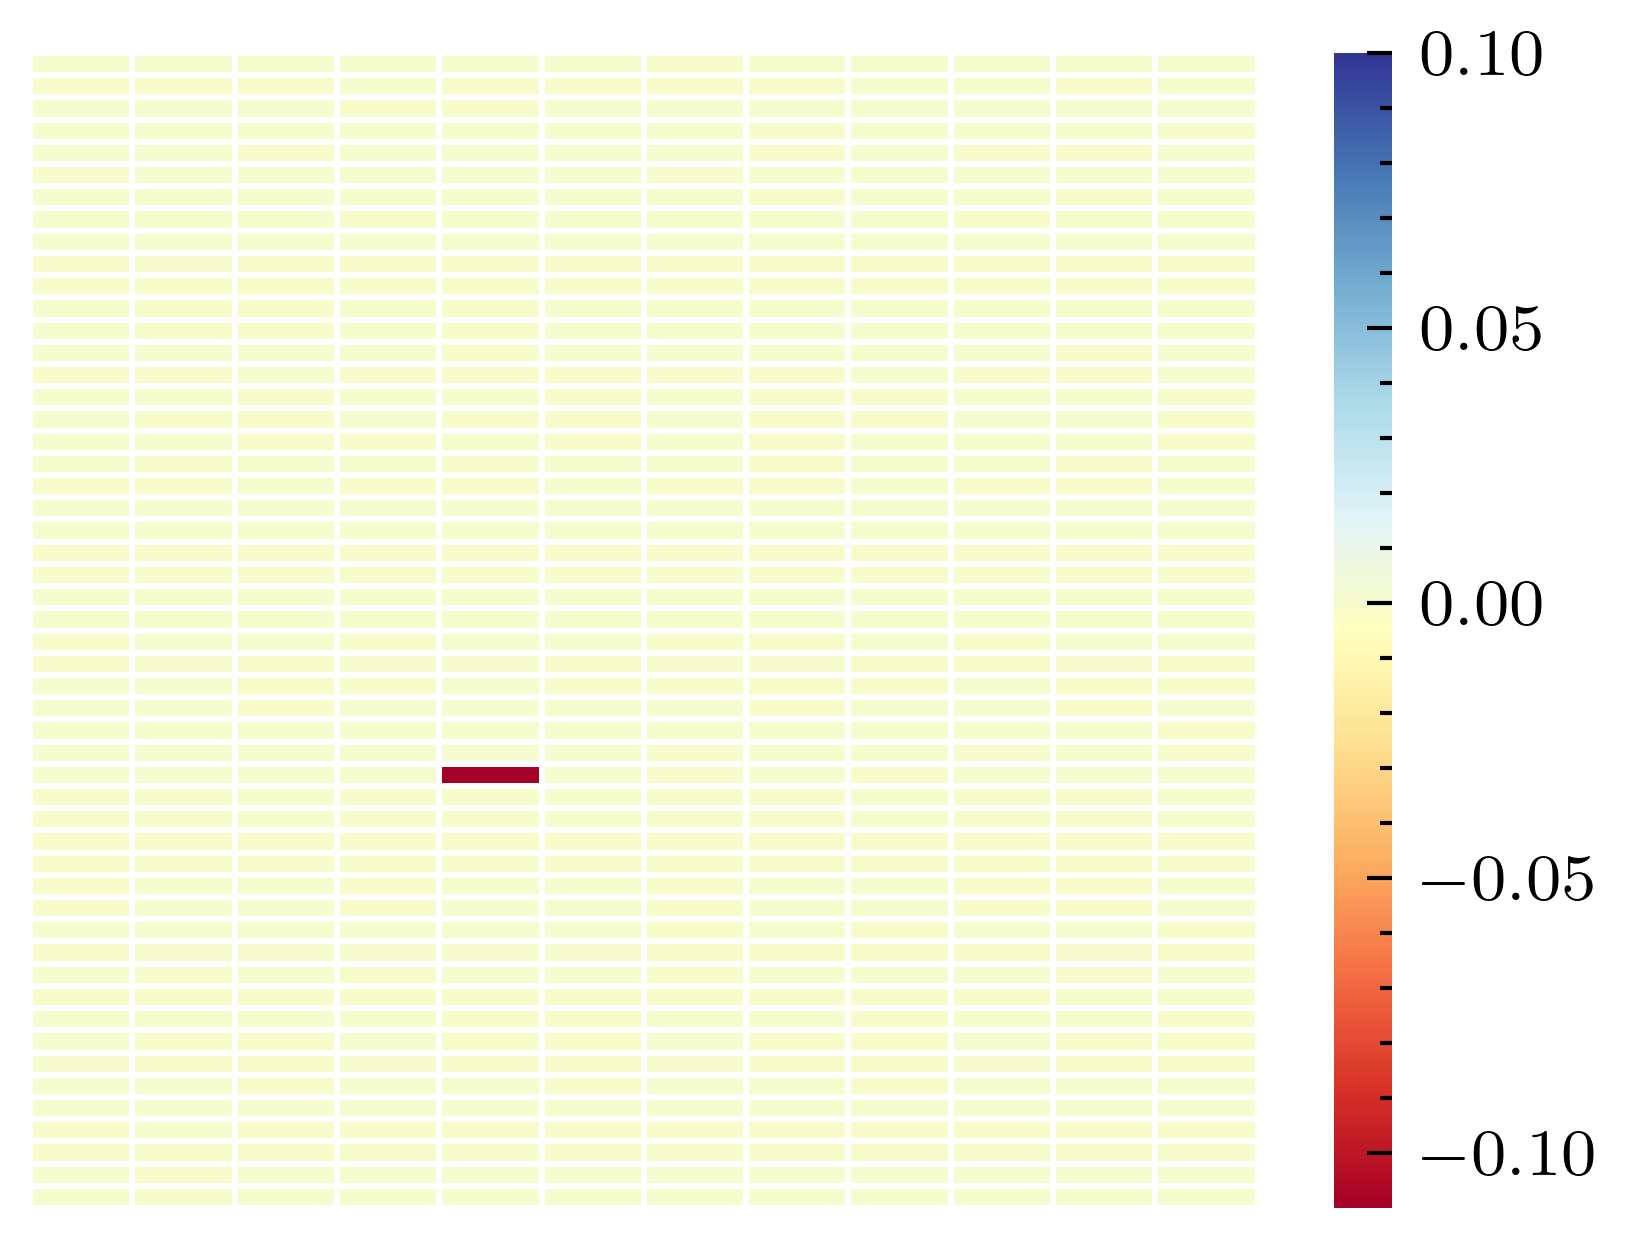

symbolic_regression_layer.0.down_conv.weight
(28, 12)


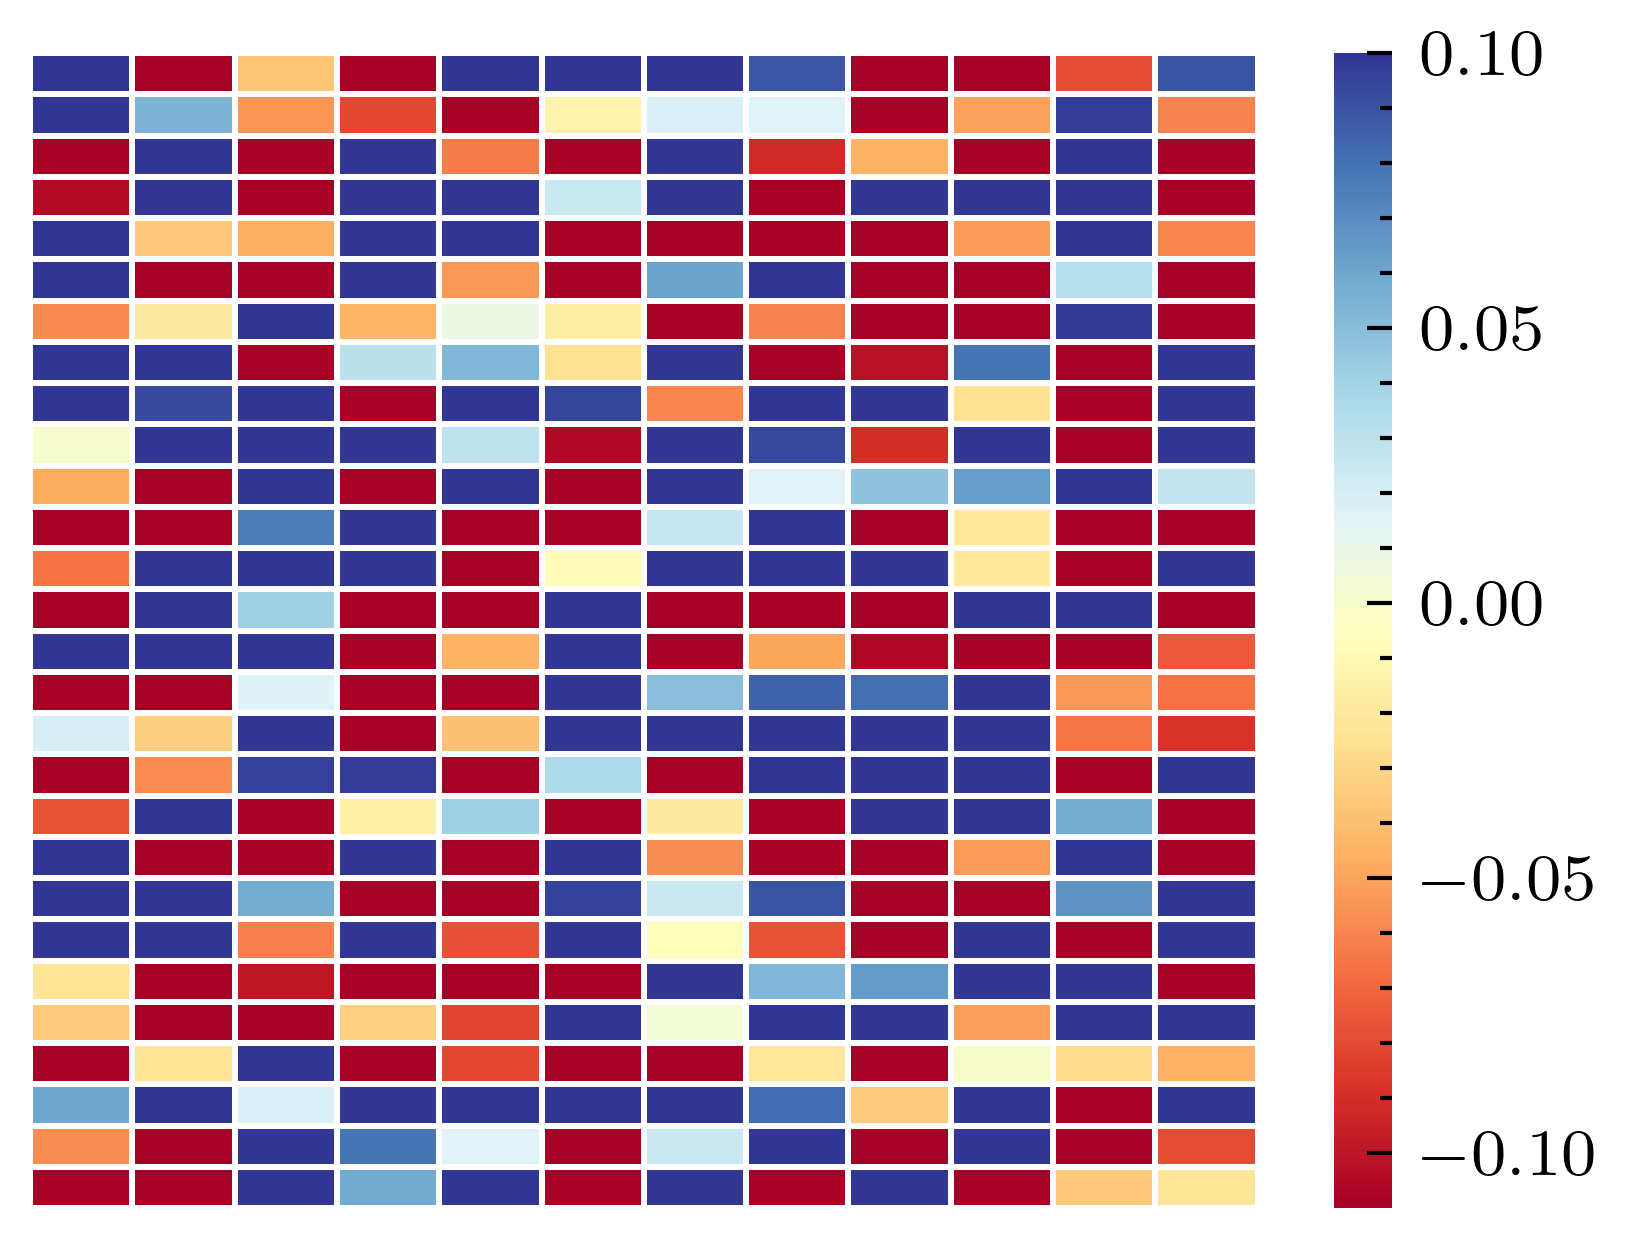

symbolic_regression_layer.0.down_conv.weight
(28, 12)


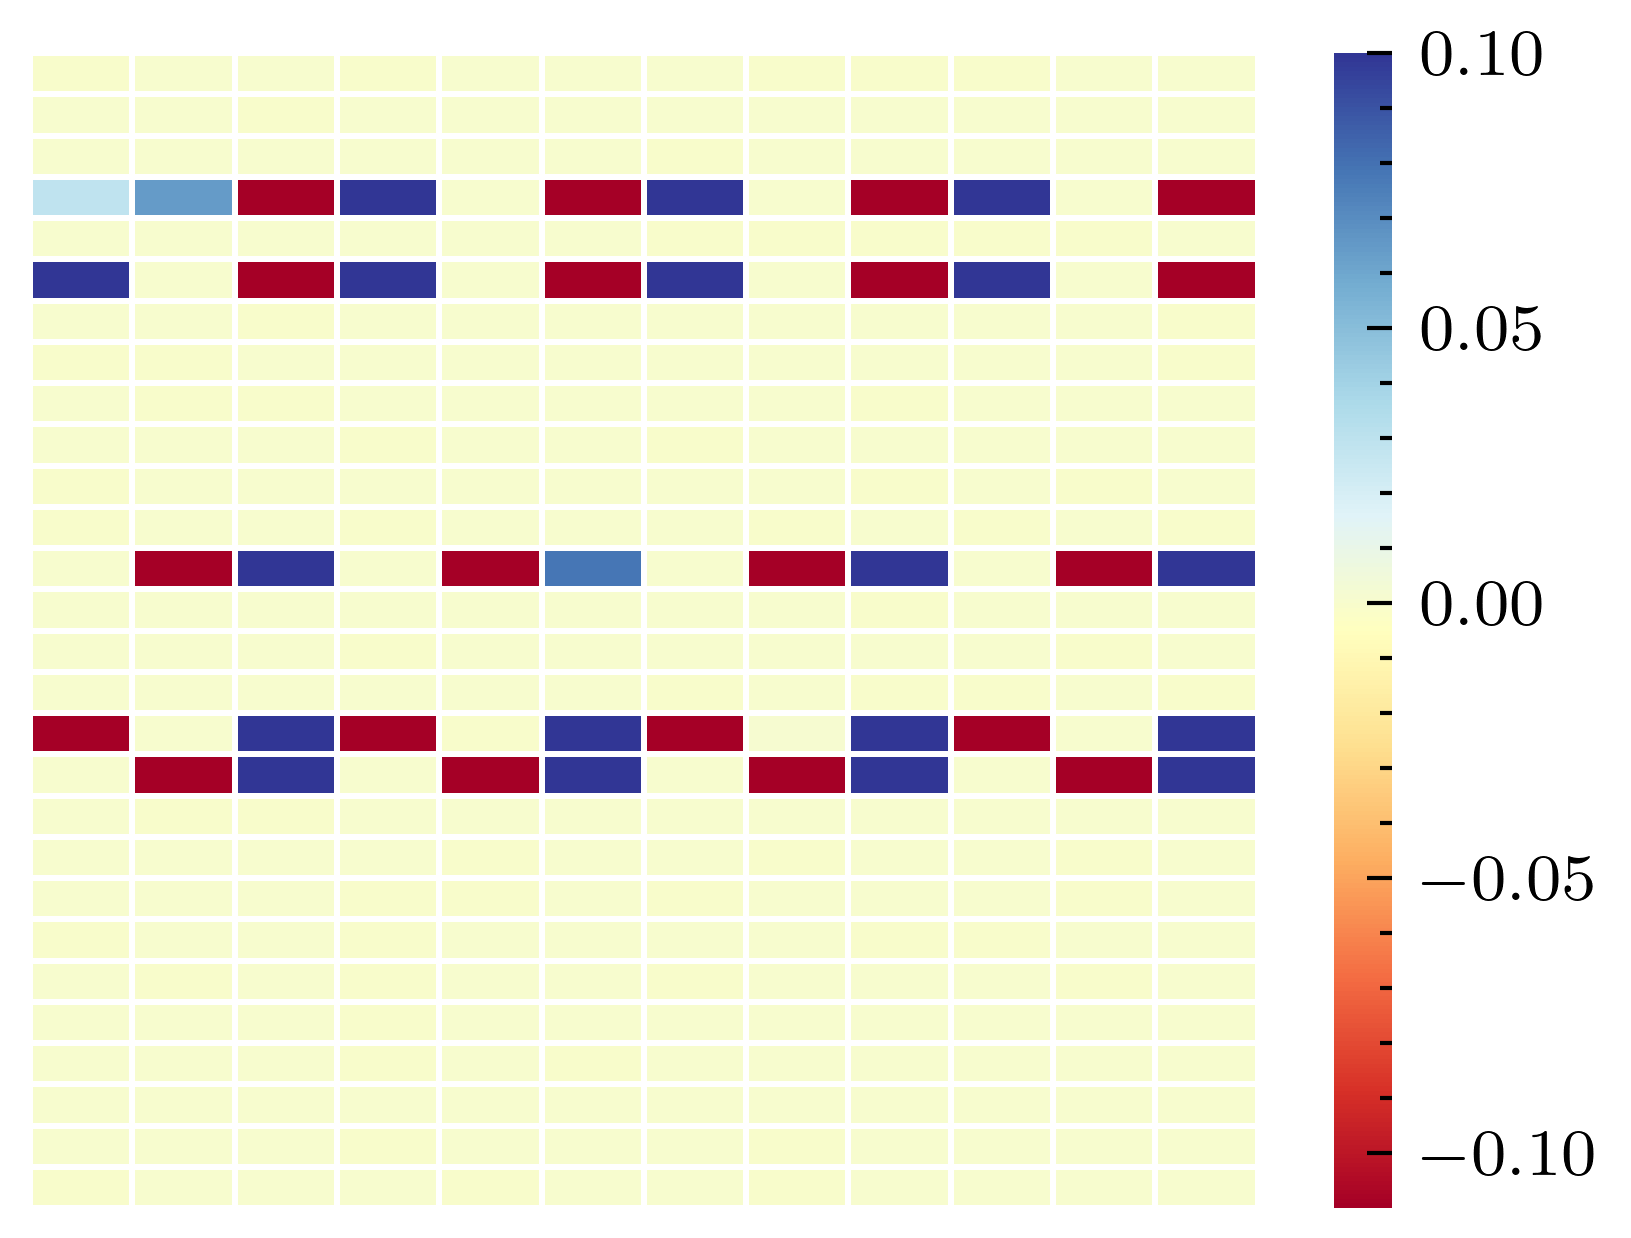

symbolic_regression_layer.0.down_conv.weight
(28, 12)


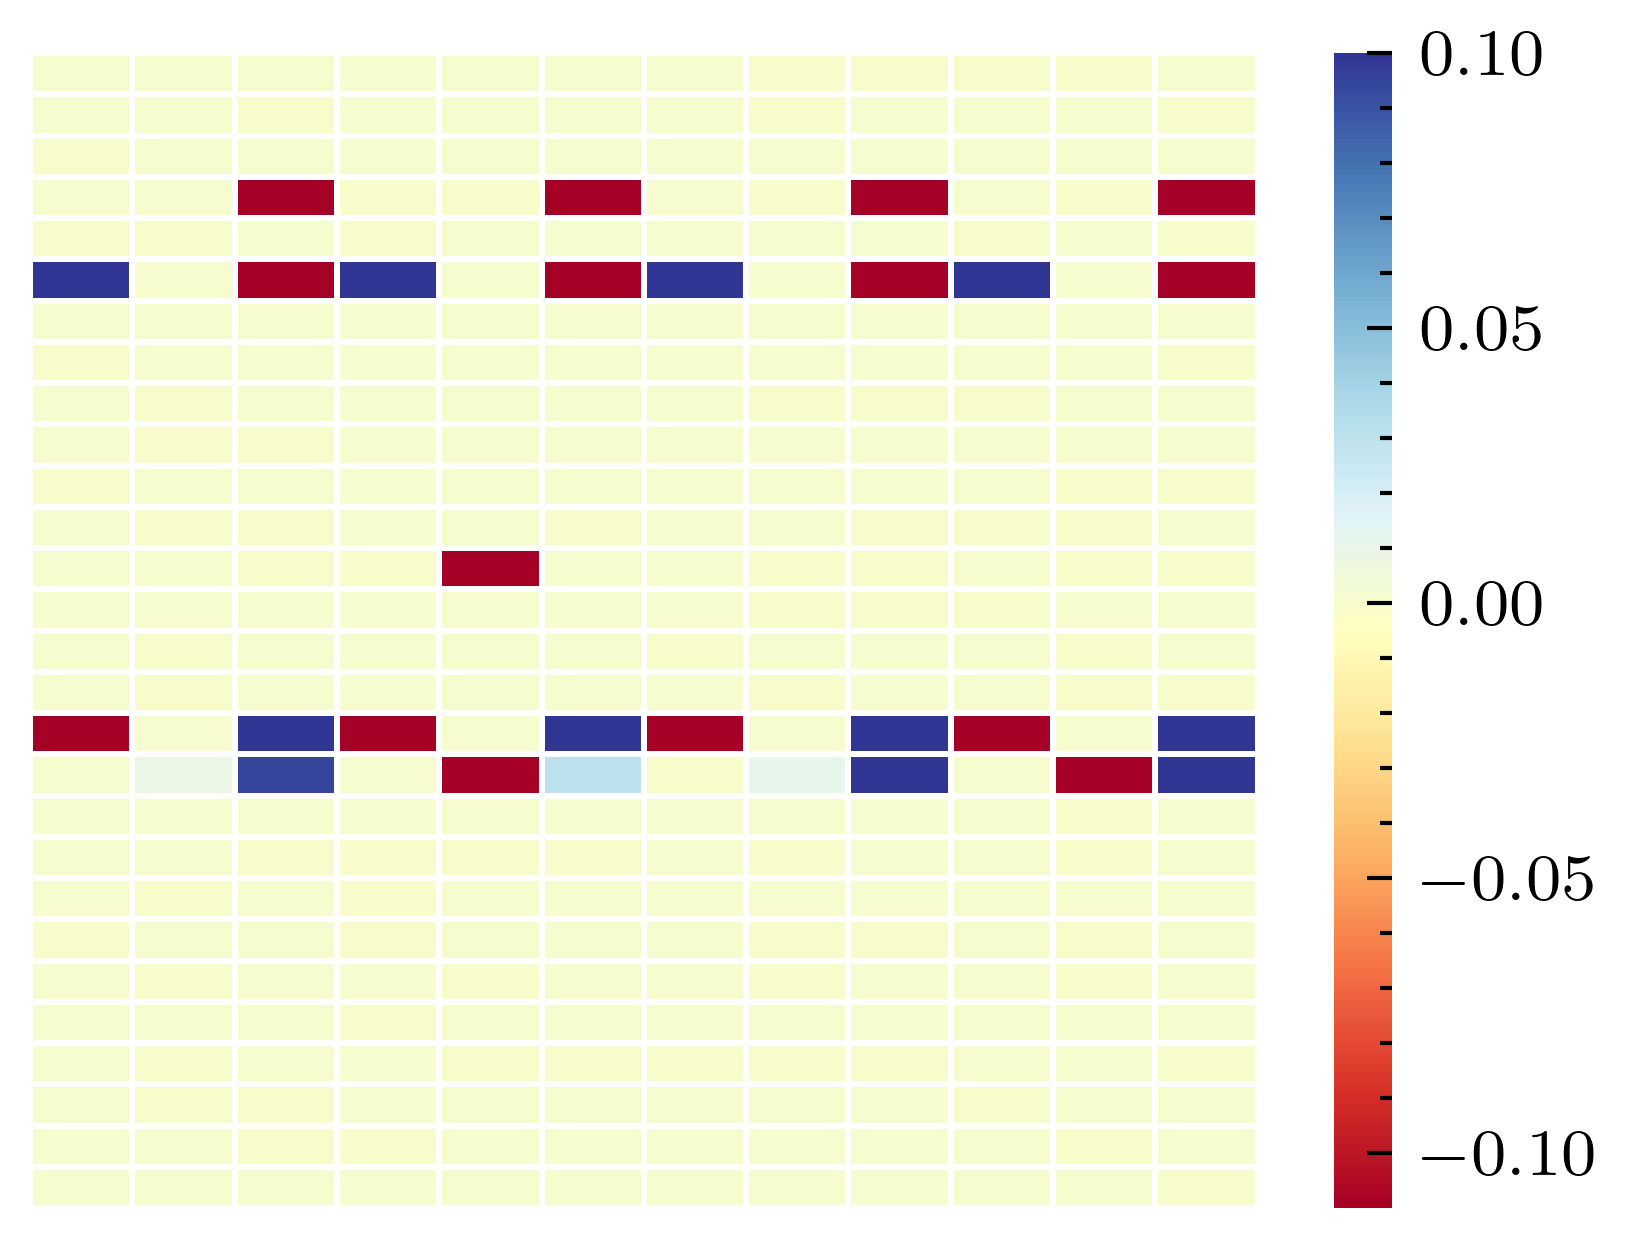

regression_layer.weight
(4, 28)


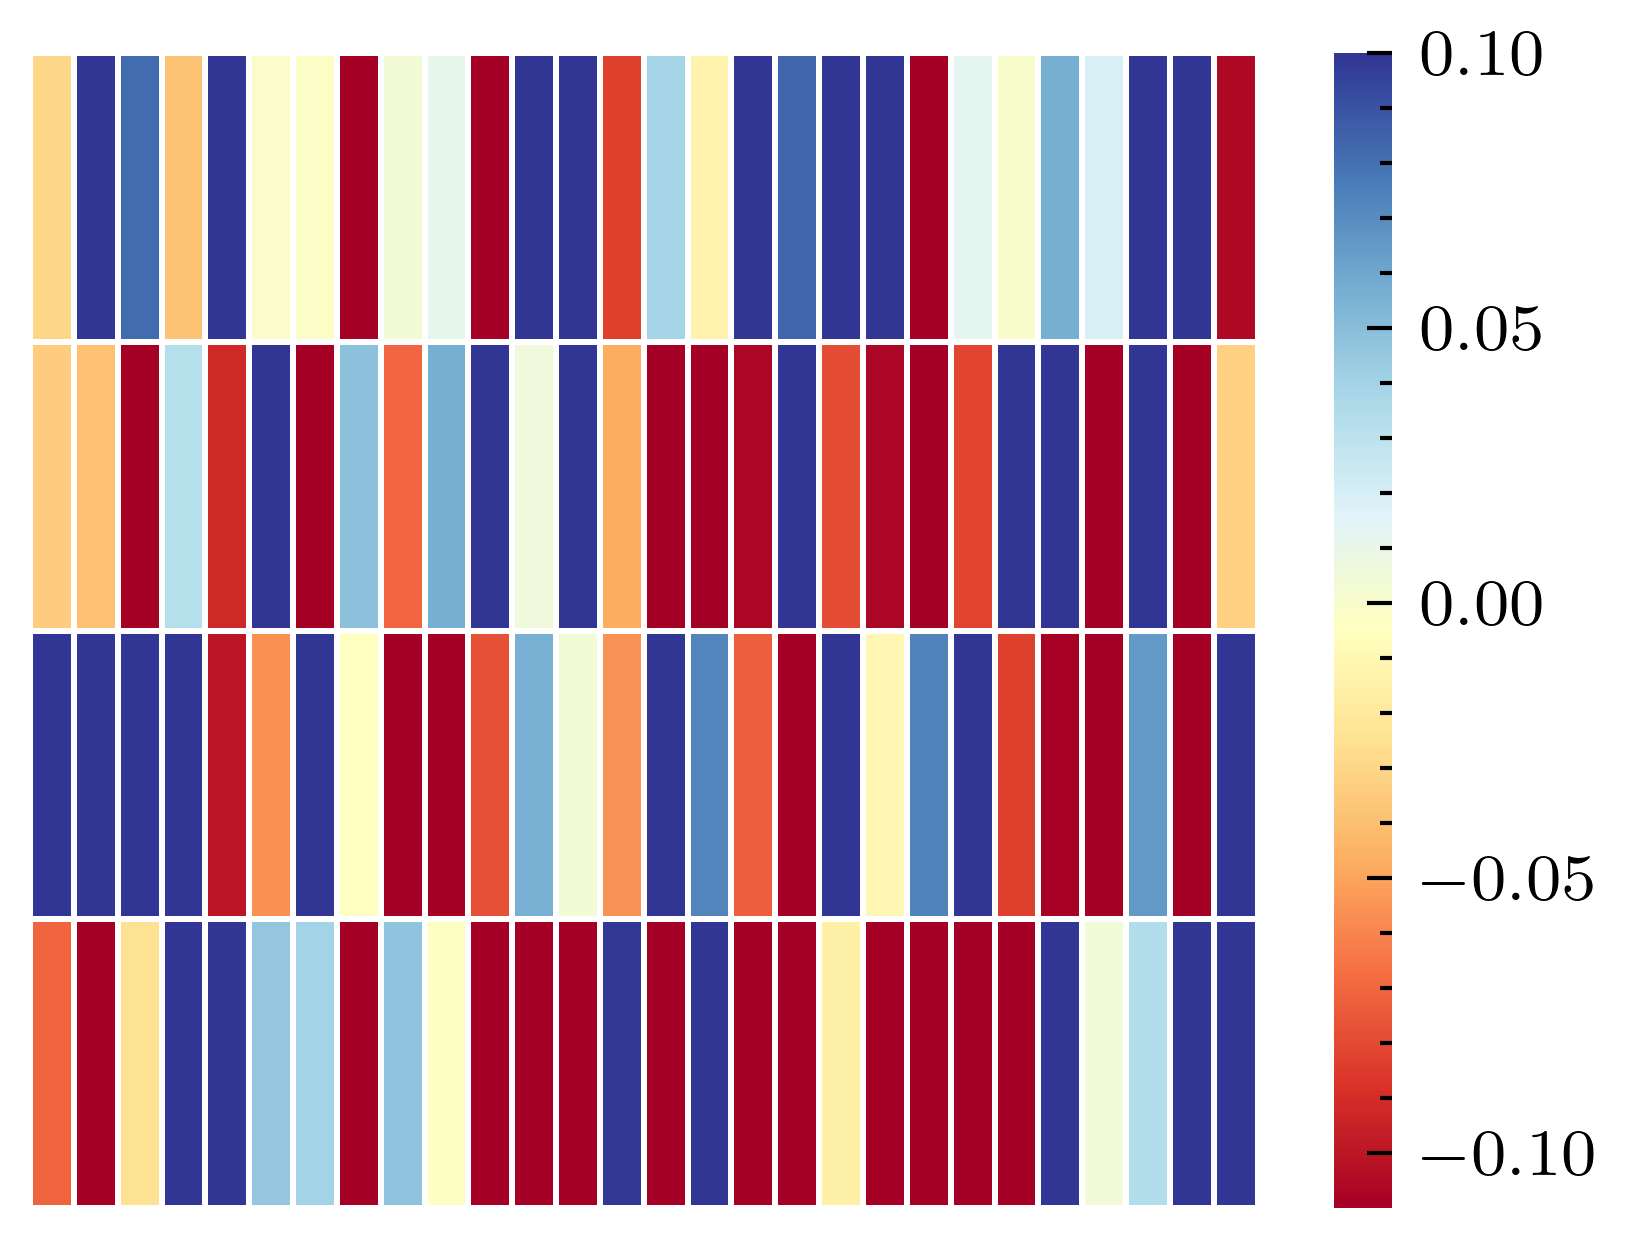

regression_layer.weight
(4, 28)


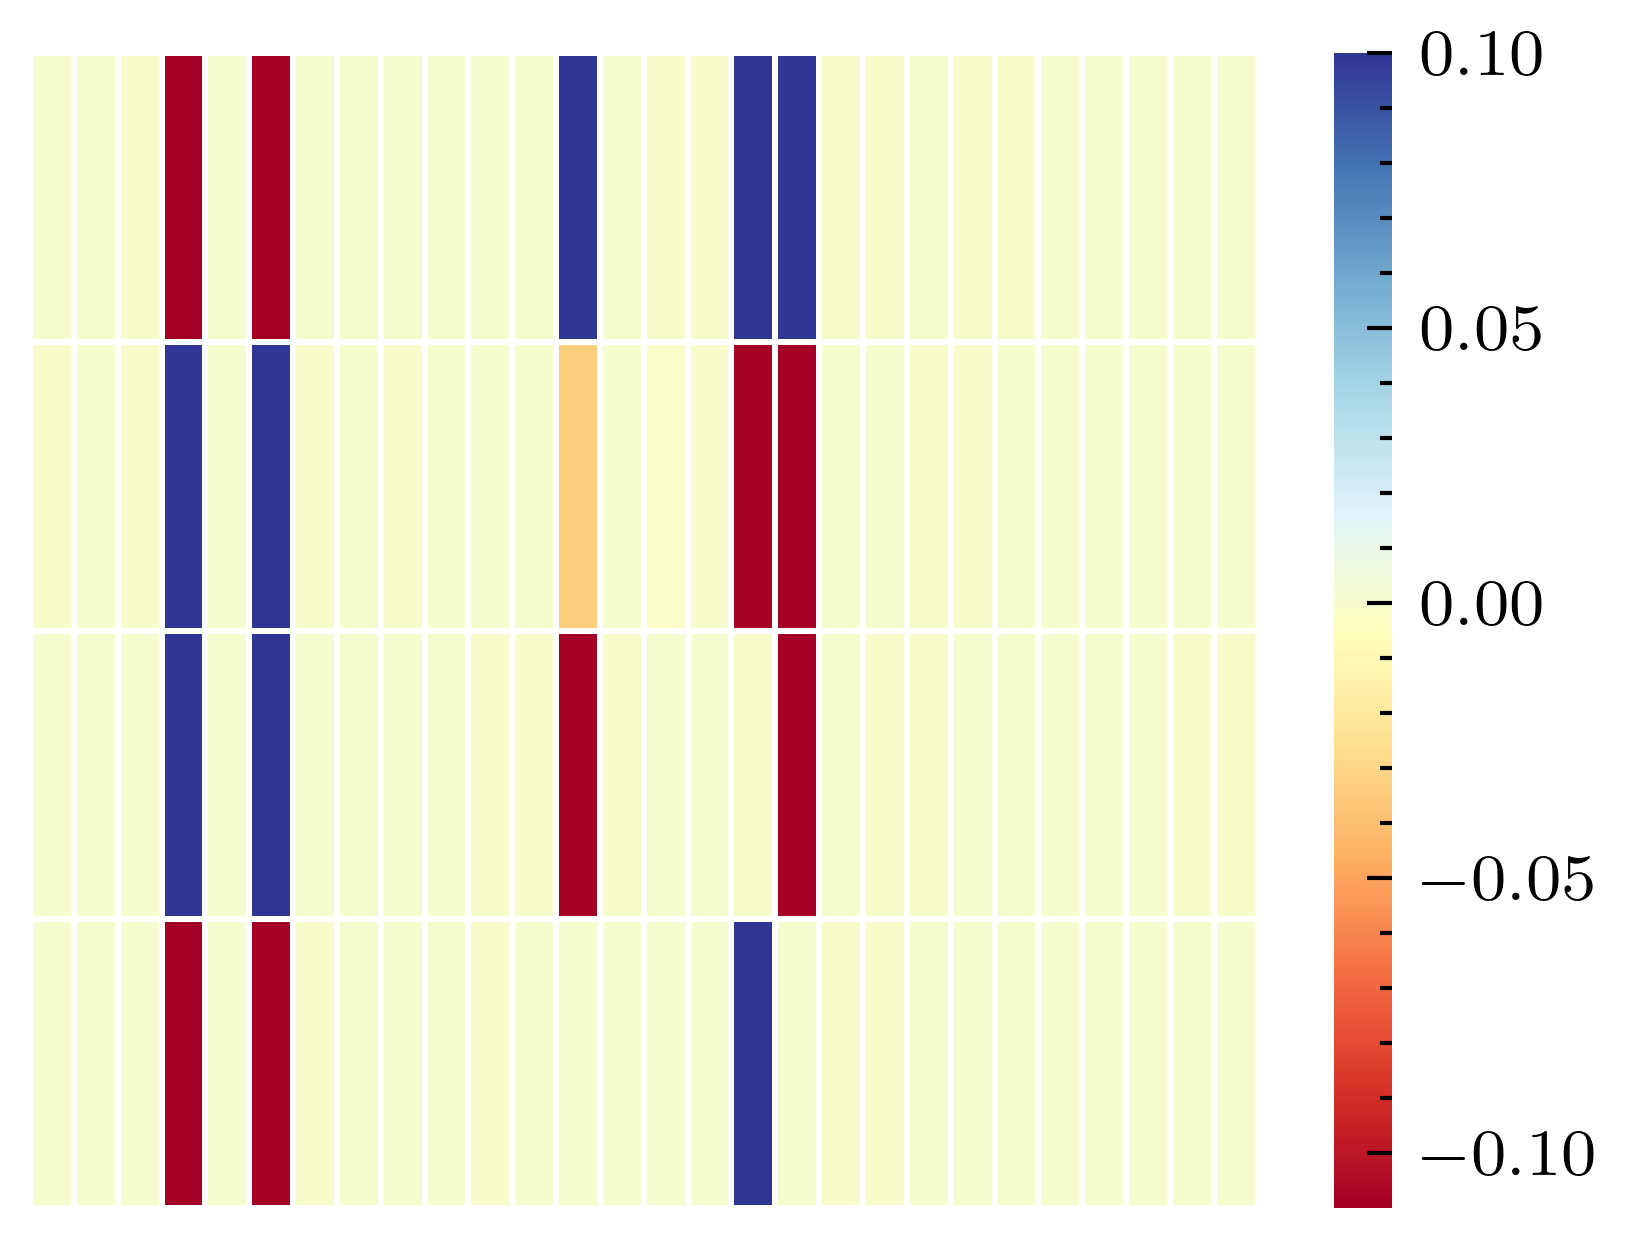

regression_layer.weight
(4, 28)


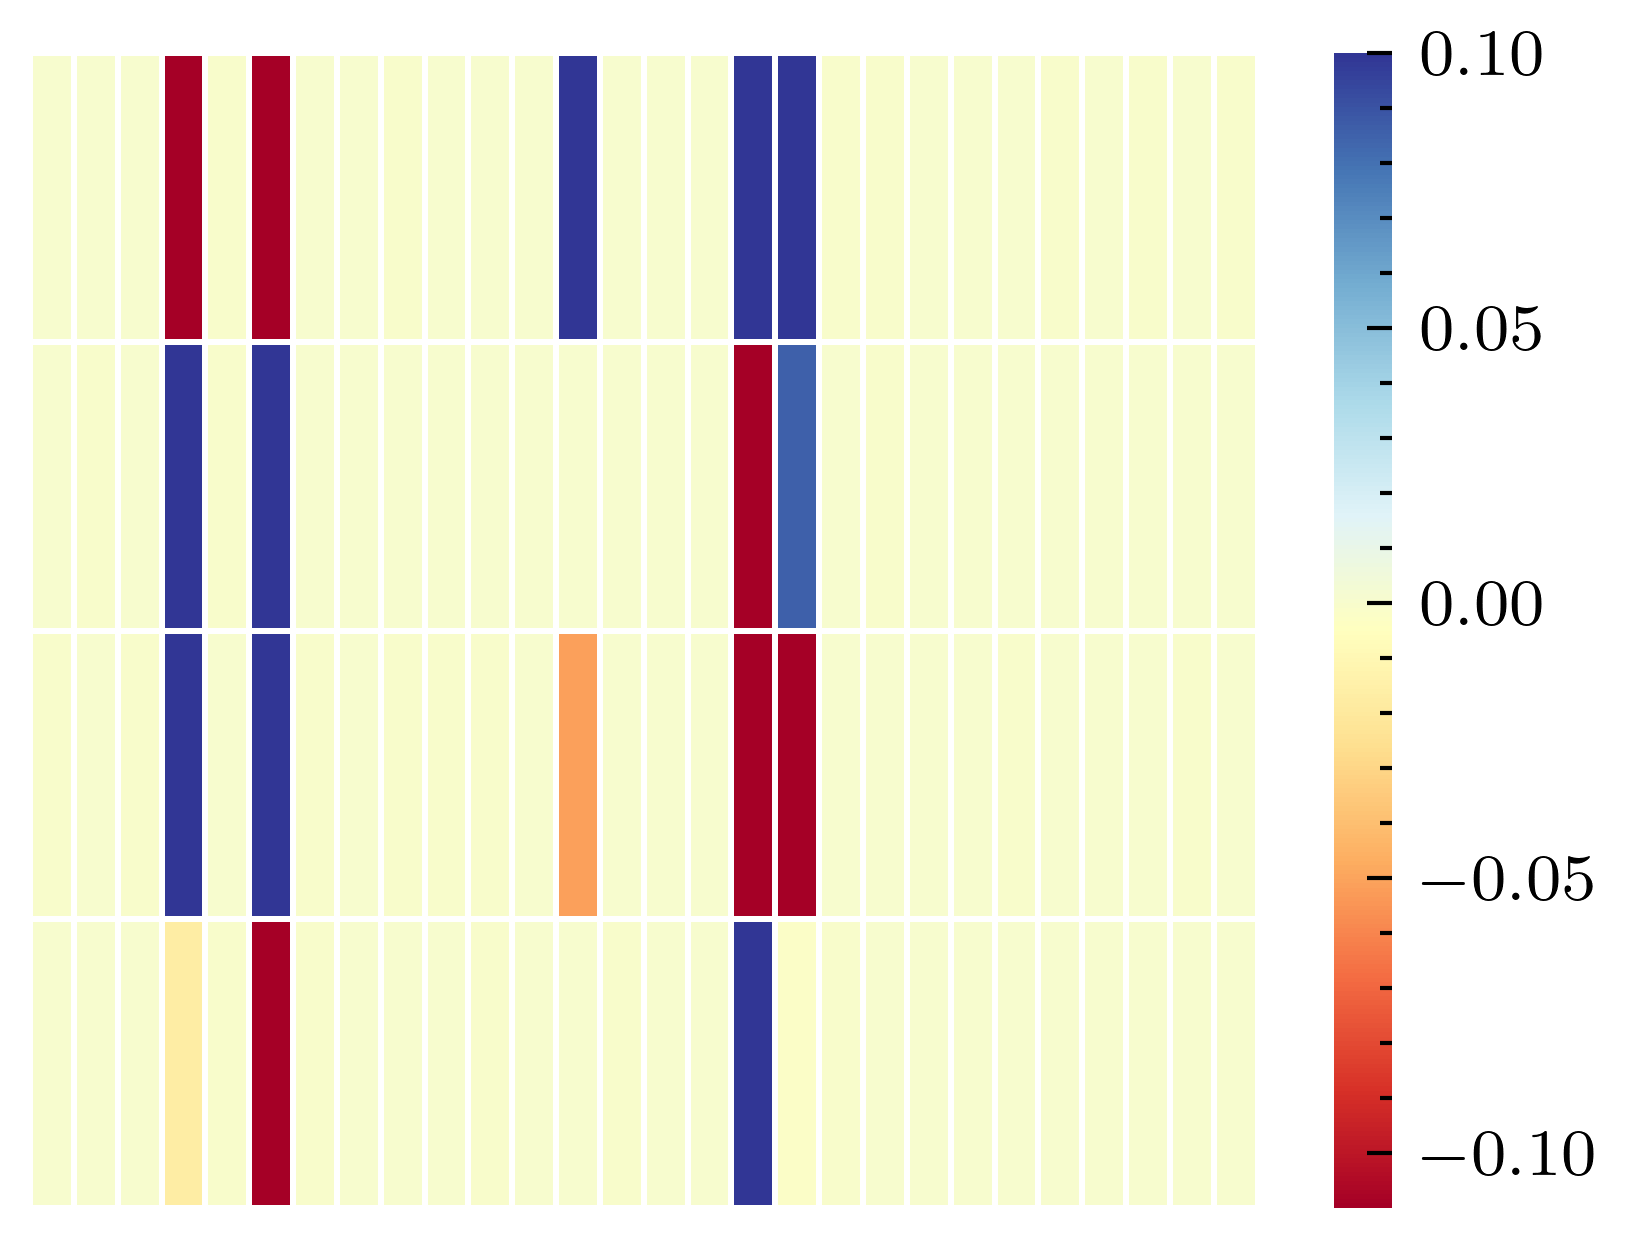

In [9]:
weight_plot('THU10_small_deep3_scale_4',
            weight0 = '/epoch0.npy',
            weight1 = '/epoch306.npy',
            weight2 = '/epoch556.npy',
            )


## 4滤波器可视化 , 需要读取模型

In [15]:

import sys
sys.path.append("../")
sys.path.append("/home/richie_thu/_Richie_project/Deep symbolic net/rul prediction/code/")
from experiment.experiment_FD import experiment_DFN

import random
import numpy as np
import pandas as pd

# common modules

import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F


# specific modules
from model.symbolic_layer import basic_model

# from utils
from utils.file_utils import create_dir, setup_config,loger
from utils.model_utils import get_arity
from utils.training_utils import EarlyStopping, setup_seed
from sklearn.manifold import TSNE
from utils.plot_utils import plot2DDG
# wandb
import wandb

config_dir = '/home/richie_thu/_Richie_project/Deep symbolic net/rul prediction/code/experiment/THU.yaml'

args = setup_config(config_dir)

print('Args in experiment:')
print(args)
print(f'setting is {args.setting}')
exp_model_dic = {'default':experiment_DFN,
                    'THU_FD':experiment_DFN,

                    }
# self.args = args # 用wandb 的config 
# if args.dryrun:
#     os.environ['WANDB_MODE'] = 'offline'
wandb.login()        
wandb.init(
        project=args.exp,
        config=args,
        name = args.setting
        )
args = wandb.config # 如果是sweep 模式，他就会选取value中的值 ，例如：'optimizer': {'values': ['adam', 'sgd']} 选sgd
# args.setting = 

exp = exp_model_dic[args.exp](args)

train_loader, test_loader, val_loader = exp.get_data()
print('###################reload#############')
state_dict = torch.load('/home/richie_thu/_Richie_project/Deep symbolic net/rul prediction/save_dir/THU10_small_deep3_scale_4/0.1250000000checkpoint.pth')



wandb: WARNING Calling wandb.login() after wandb.init() has no effect.


Args in experiment:
Namespace(amount=0.5, batch_size=64, bias=False, checkpoints='./save_dir', clip_gradient=10, conv_lr=0.001, data_dir='/home/richie_thu/_Richie_project/dataset/Thu10_down.mat', data_list=['/home/richie_thu/_Richie_project/dataset/ottawa_A.mat', '/home/richie_thu/_Richie_project/dataset/ottawa_A.mat', '/home/richie_thu/_Richie_project/dataset/ottawa_A.mat', '/home/richie_thu/_Richie_project/dataset/ottawa_A.mat'], device='cuda', down_sampling_kernel=1, down_sampling_stride=2, dryrun=True, epoches=5000, evaluation=['acc', 'f1'], exp='THU_FD', expert_layer=3, expert_list=['envelope', 'fre_normal', 'fre_sinc'], f_b_mu=0, f_b_sigma=0.1, f_c_mu=0, f_c_sigma=0.1, feature_layer=1, feature_list=['entropy', 'kurtosis', 'mean'], fine_tune=False, fre=10, ftepoches=5000, input_channel=1, lamda=0.01, lenth=2560, logic_layer=1, logic_list=['imp', 'equ', 'neg', 'conj', 'disj', 'sconj', 'sdisj'], loss='CE', lr=0.001, metric_list=['acc', 'f1'], mixup=0, model='AFN', name='THU10_wave_d

exp THU10_wave_debug_AFN begin
###################reload#############


2. load parameters
PS. 下次可以先prune ，这样parameter的名称就不会变了
还是读取把
原先checkpoint 没有prune所以key match

3. 读取数据

In [16]:
exp.net

DFN(
  (symbolic_transform_layer): ModuleList(
    (0): neural_symbolc_base(
      (learnable_param): ModuleList(
        (0): frequency_operation()
        (1): frequency_operation()
        (2): frequency_operation()
        (3): frequency_operation()
        (4): frequency_operation()
        (5): frequency_operation()
        (6): frequency_operation()
        (7): frequency_operation()
      )
      (filter_op): frequency_operation()
      (In): InstanceNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (channel_conv): Conv1d(1, 12, kernel_size=(1,), stride=(1,), bias=False)
      (down_conv): Conv1d(1, 12, kernel_size=(1,), stride=(1,), bias=False)
    )
    (1): neural_symbolc_base(
      (learnable_param): ModuleList(
        (0): frequency_operation()
        (1): frequency_operation()
        (2): frequency_operation()
        (3): frequency_operation()
        (4): frequency_operation()
        (5): frequency_operation()
        (6): frequency_

In [17]:
    train_loader, test_loader, val_loader = exp.get_data()
    testx,testy = test_loader.dataset.x,test_loader.dataset.y
    exp.net(testx.cuda())

tensor([[ 0.8551, -0.8163,  0.4354, -0.9115],
        [ 0.5542,  0.0766, -0.0051, -0.7717],
        [ 0.6415, -0.2270,  0.1929, -0.6636],
        ...,
        [ 0.1280, -0.8645,  0.5701, -0.9135],
        [ 0.2267, -1.0148,  0.2371, -0.9428],
        [ 0.4996, -0.5321,  0.4475, -0.5445]], device='cuda:0',
       grad_fn=<MmBackward0>)

reload parameters

~ 先pruning！！！！！！！！~

In [18]:
exp.pruning()  # 先prune
exp.net.load_state_dict(state_dict)
y = exp.net(testx.cuda())
y


tensor([[-2.1093e-02, -1.1690e+00,  2.1718e-01,  1.0285e+00],
        [-2.2847e+01,  1.5521e+01,  8.7834e+00, -5.6408e+00],
        [-1.0377e+01,  5.9415e+00,  4.1428e+00, -2.6710e+00],
        ...,
        [ 4.2177e+00, -7.0558e+00, -1.0862e+00,  3.4687e+00],
        [ 4.6663e+00, -6.8945e+00, -1.2960e+00,  3.2323e+00],
        [ 3.6192e+00, -5.1088e+00, -1.0097e+00,  2.4607e+00]], device='cuda:0',
       grad_fn=<MmBackward0>)

3. 提取滤波器

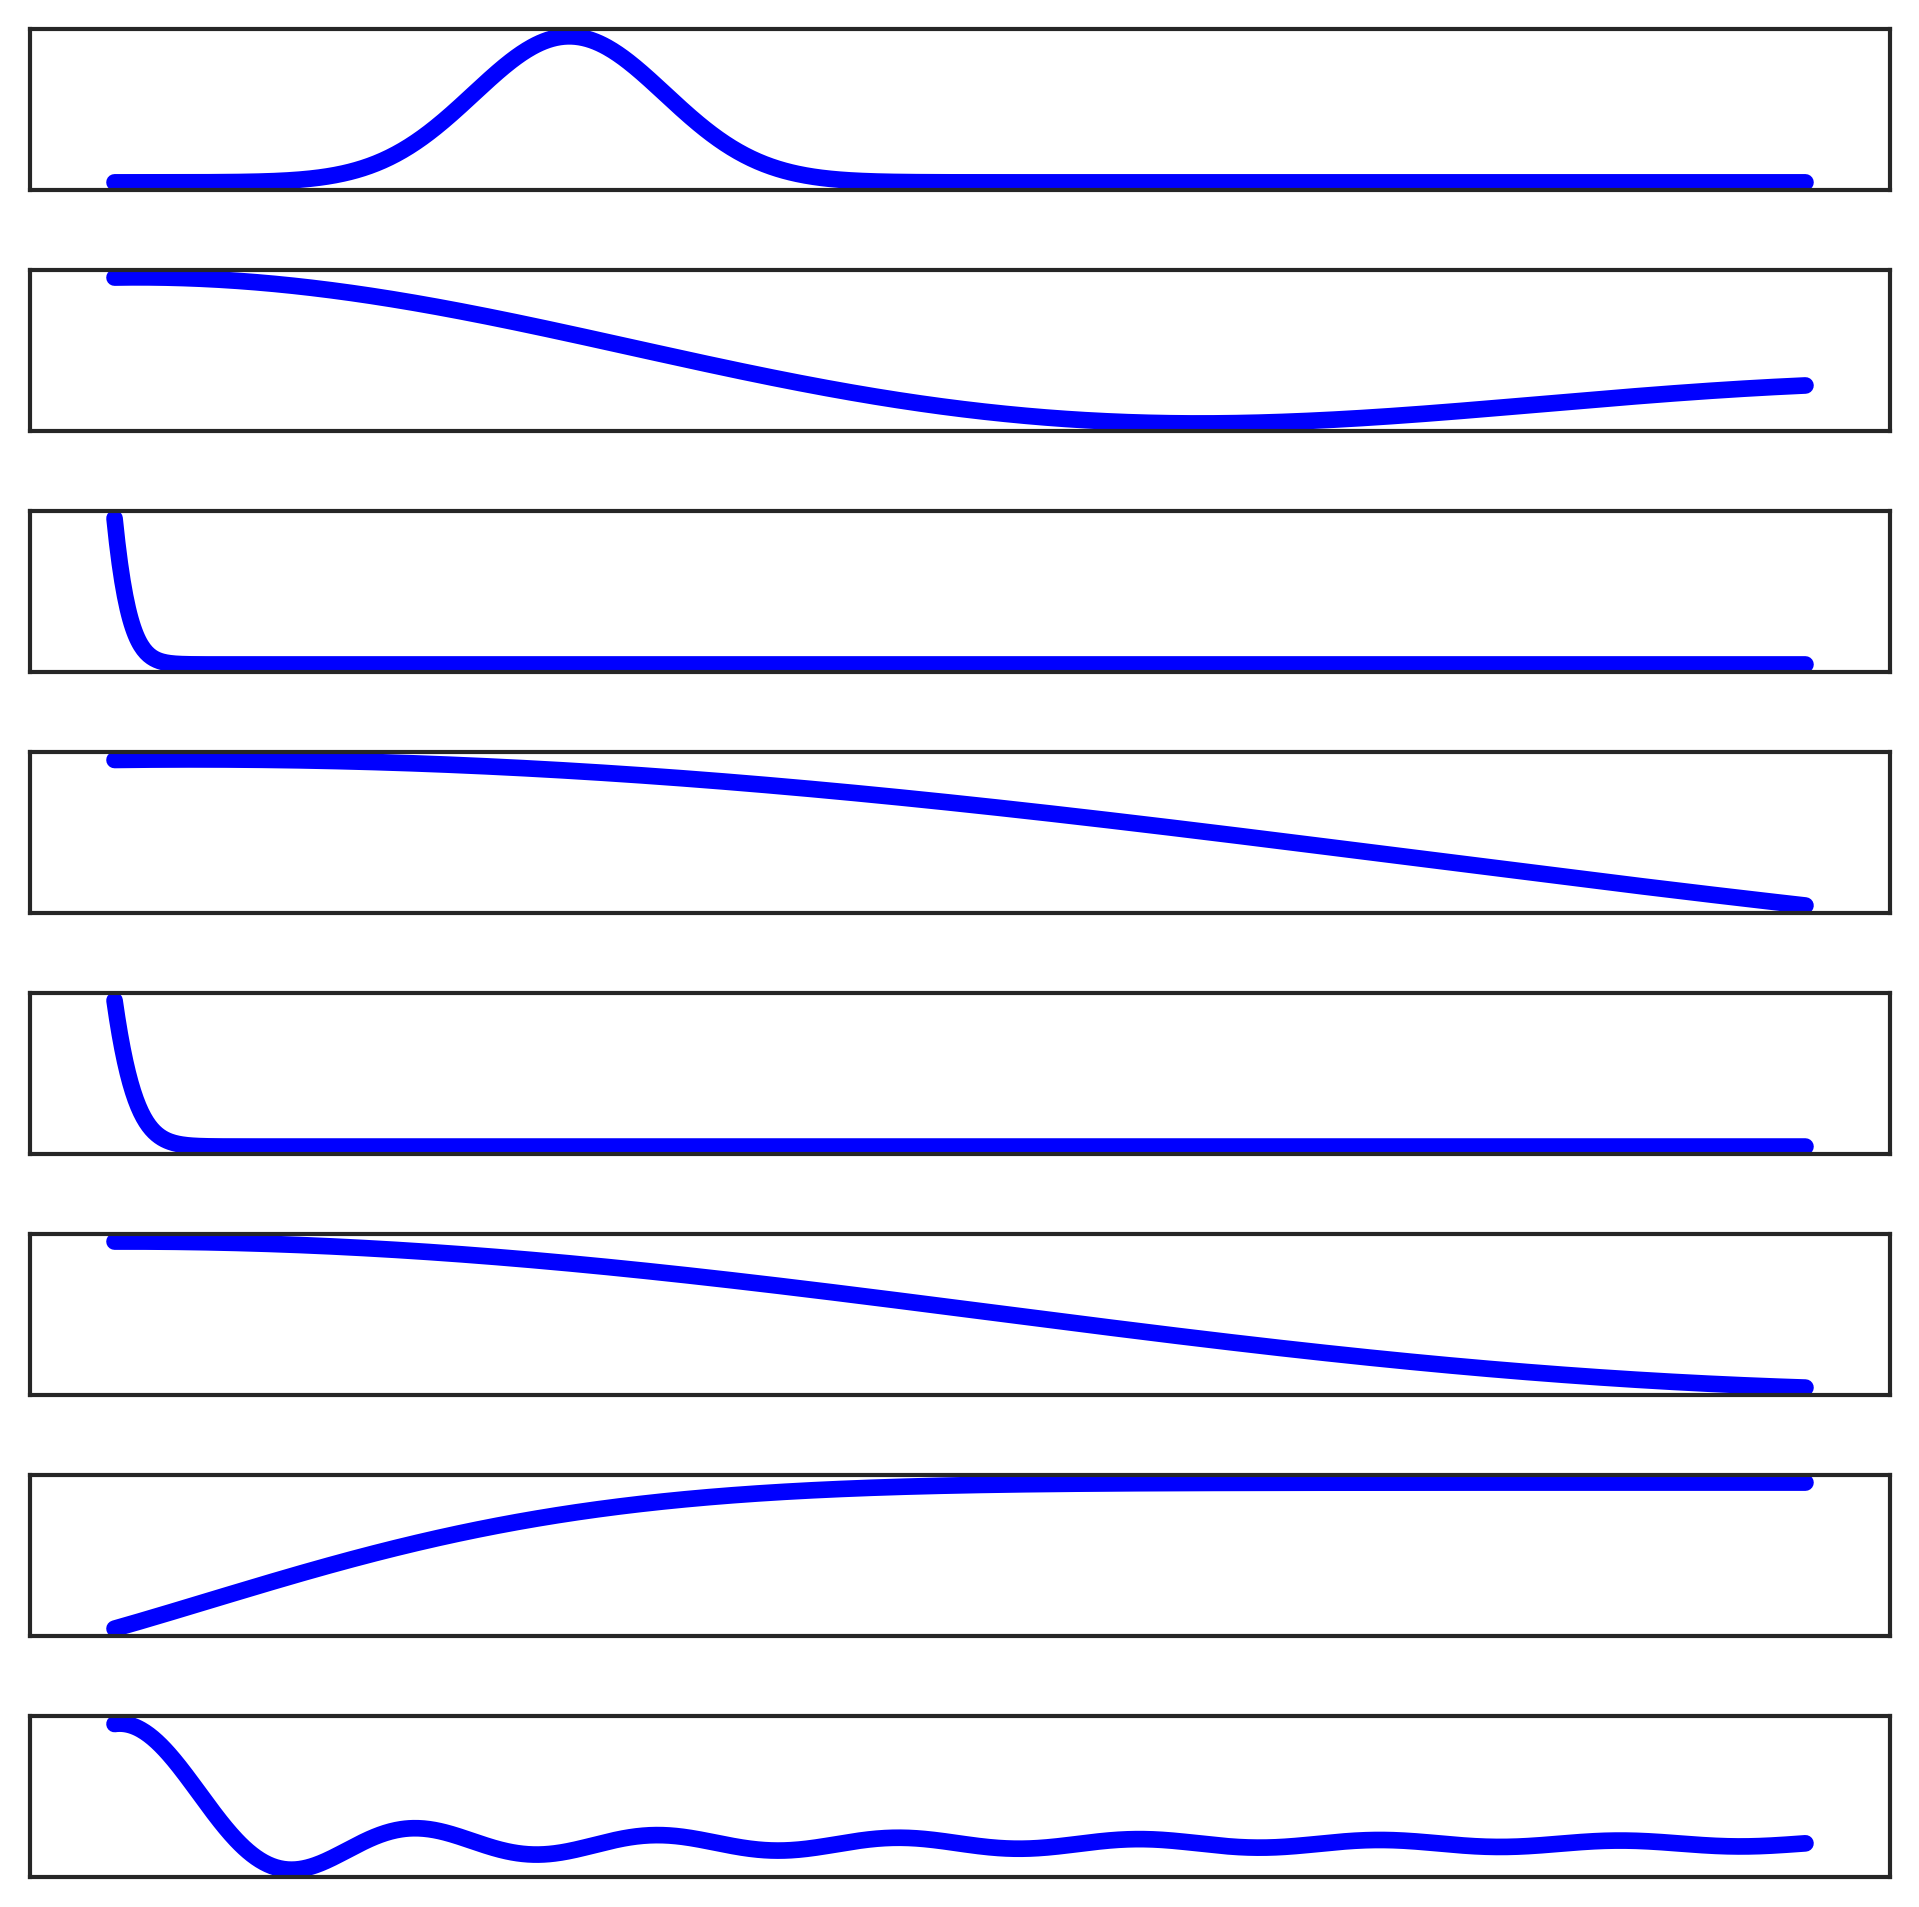

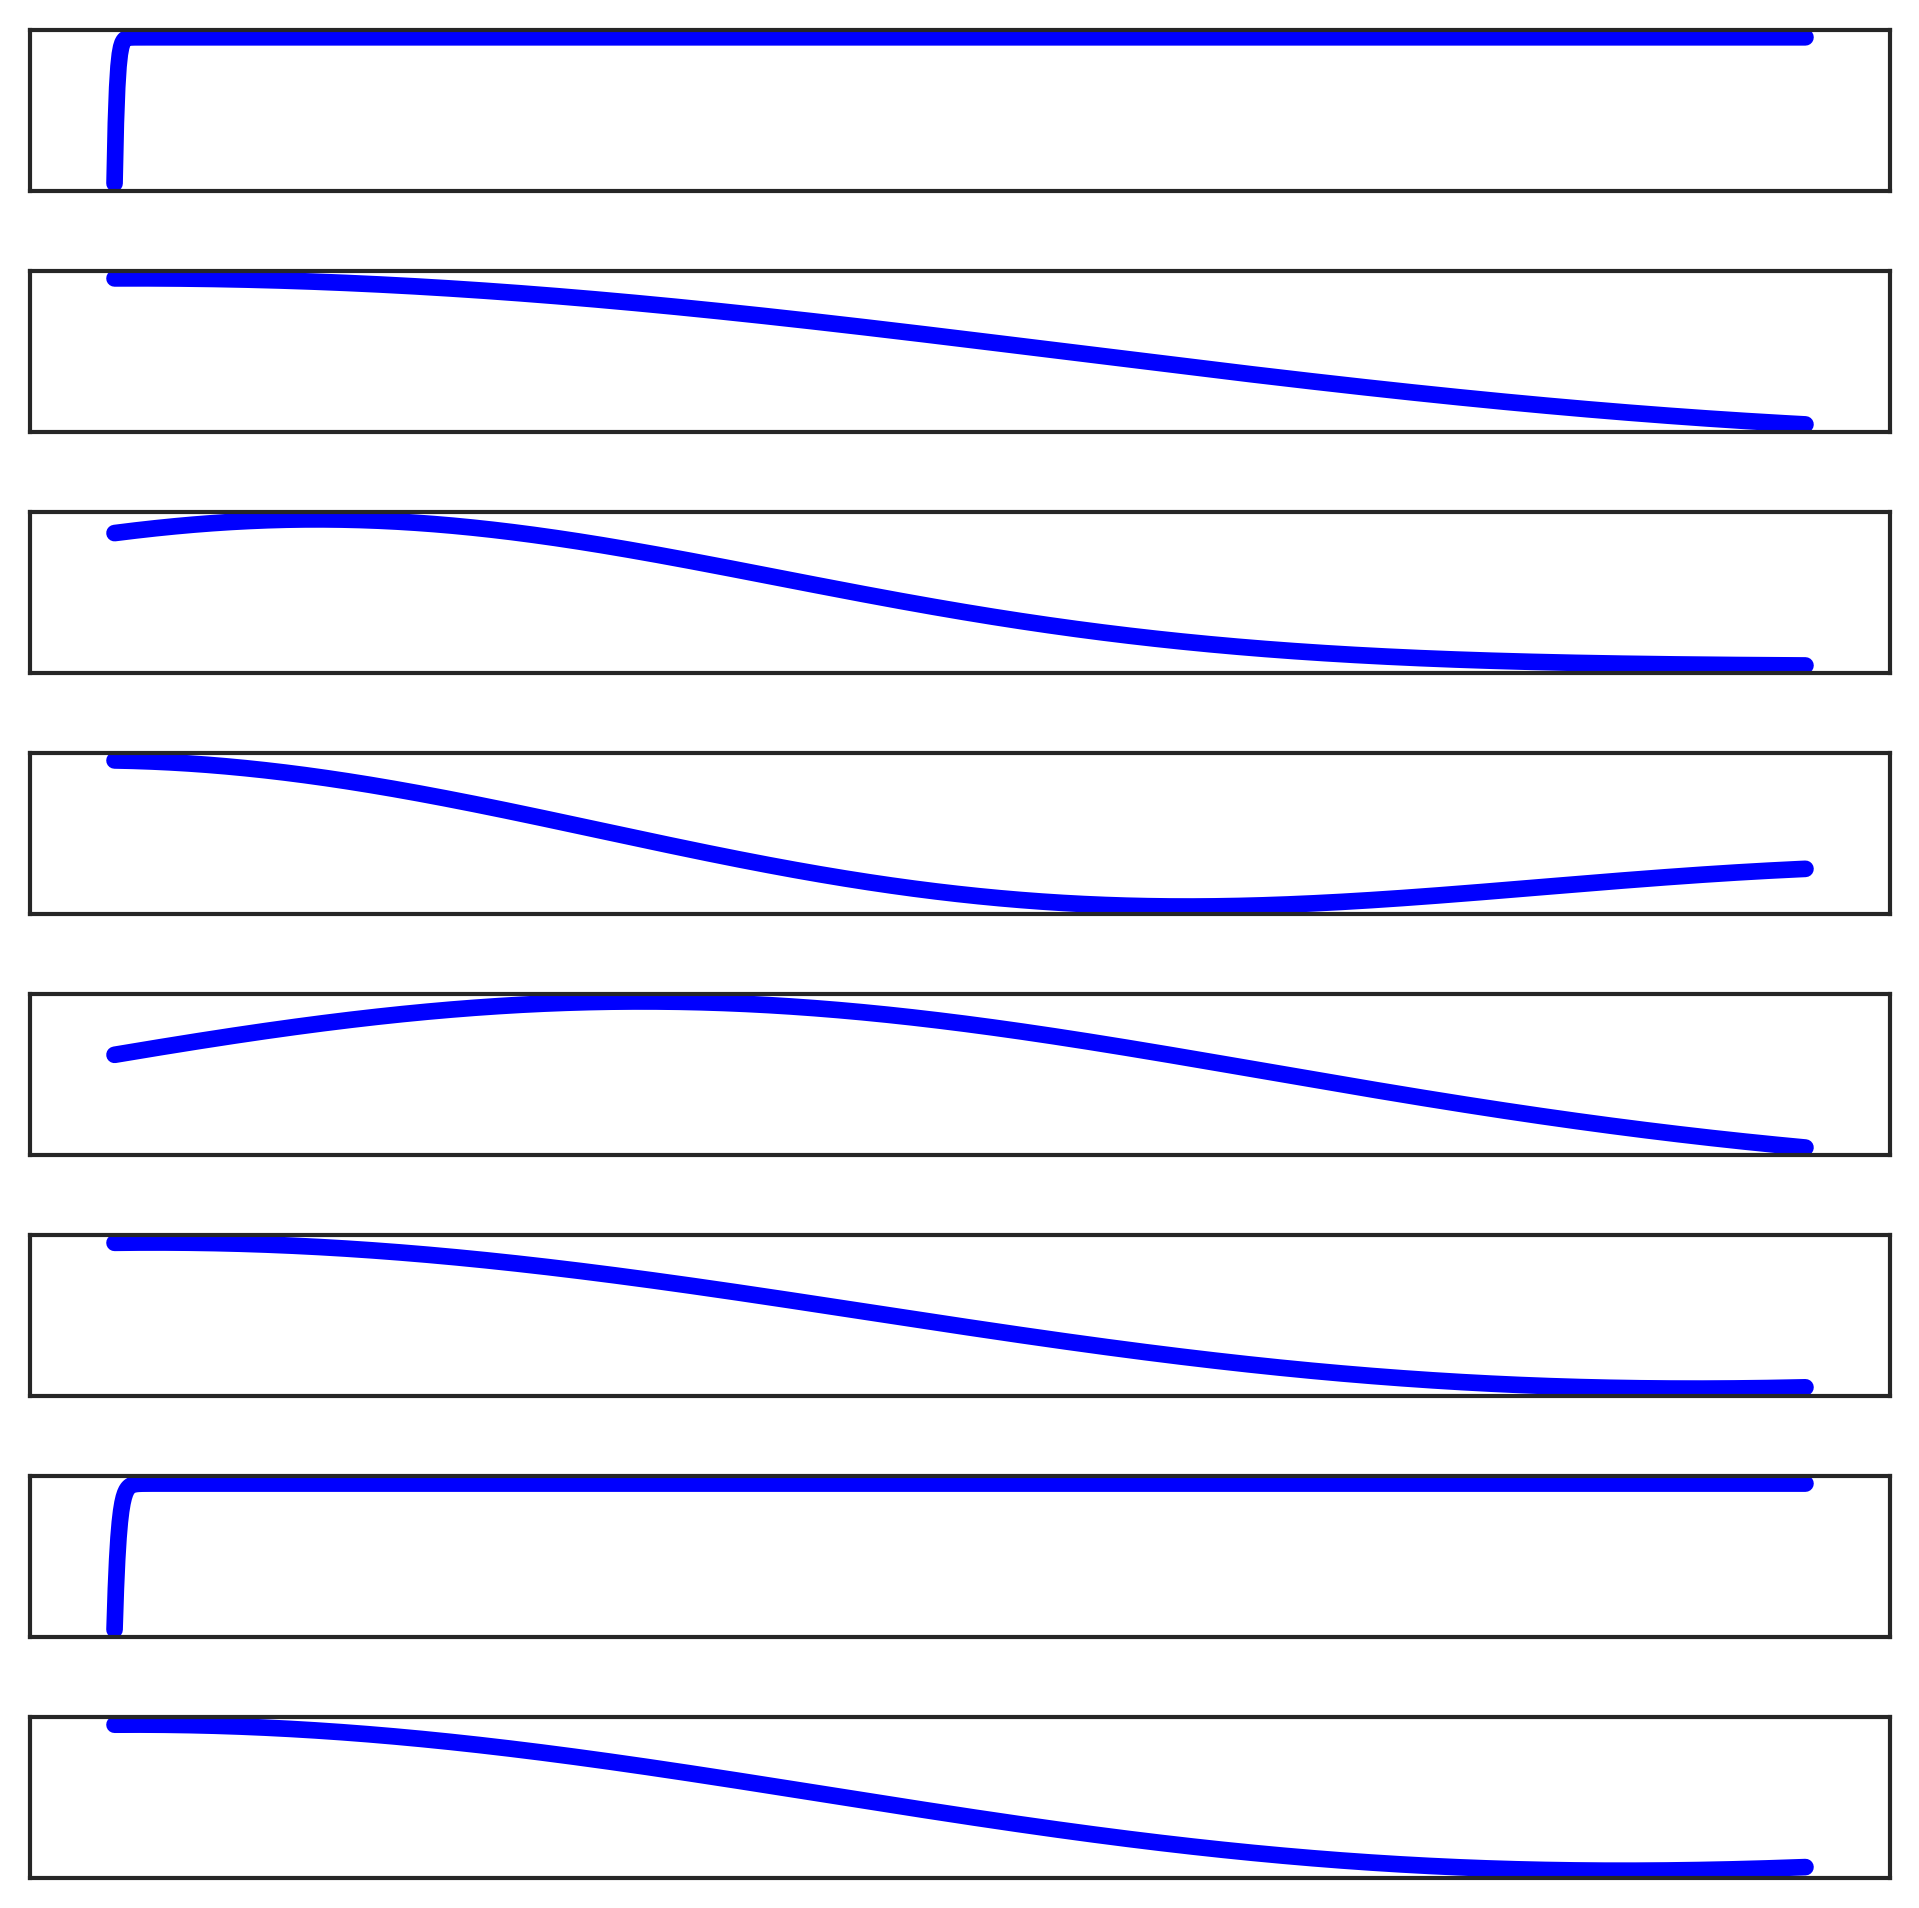

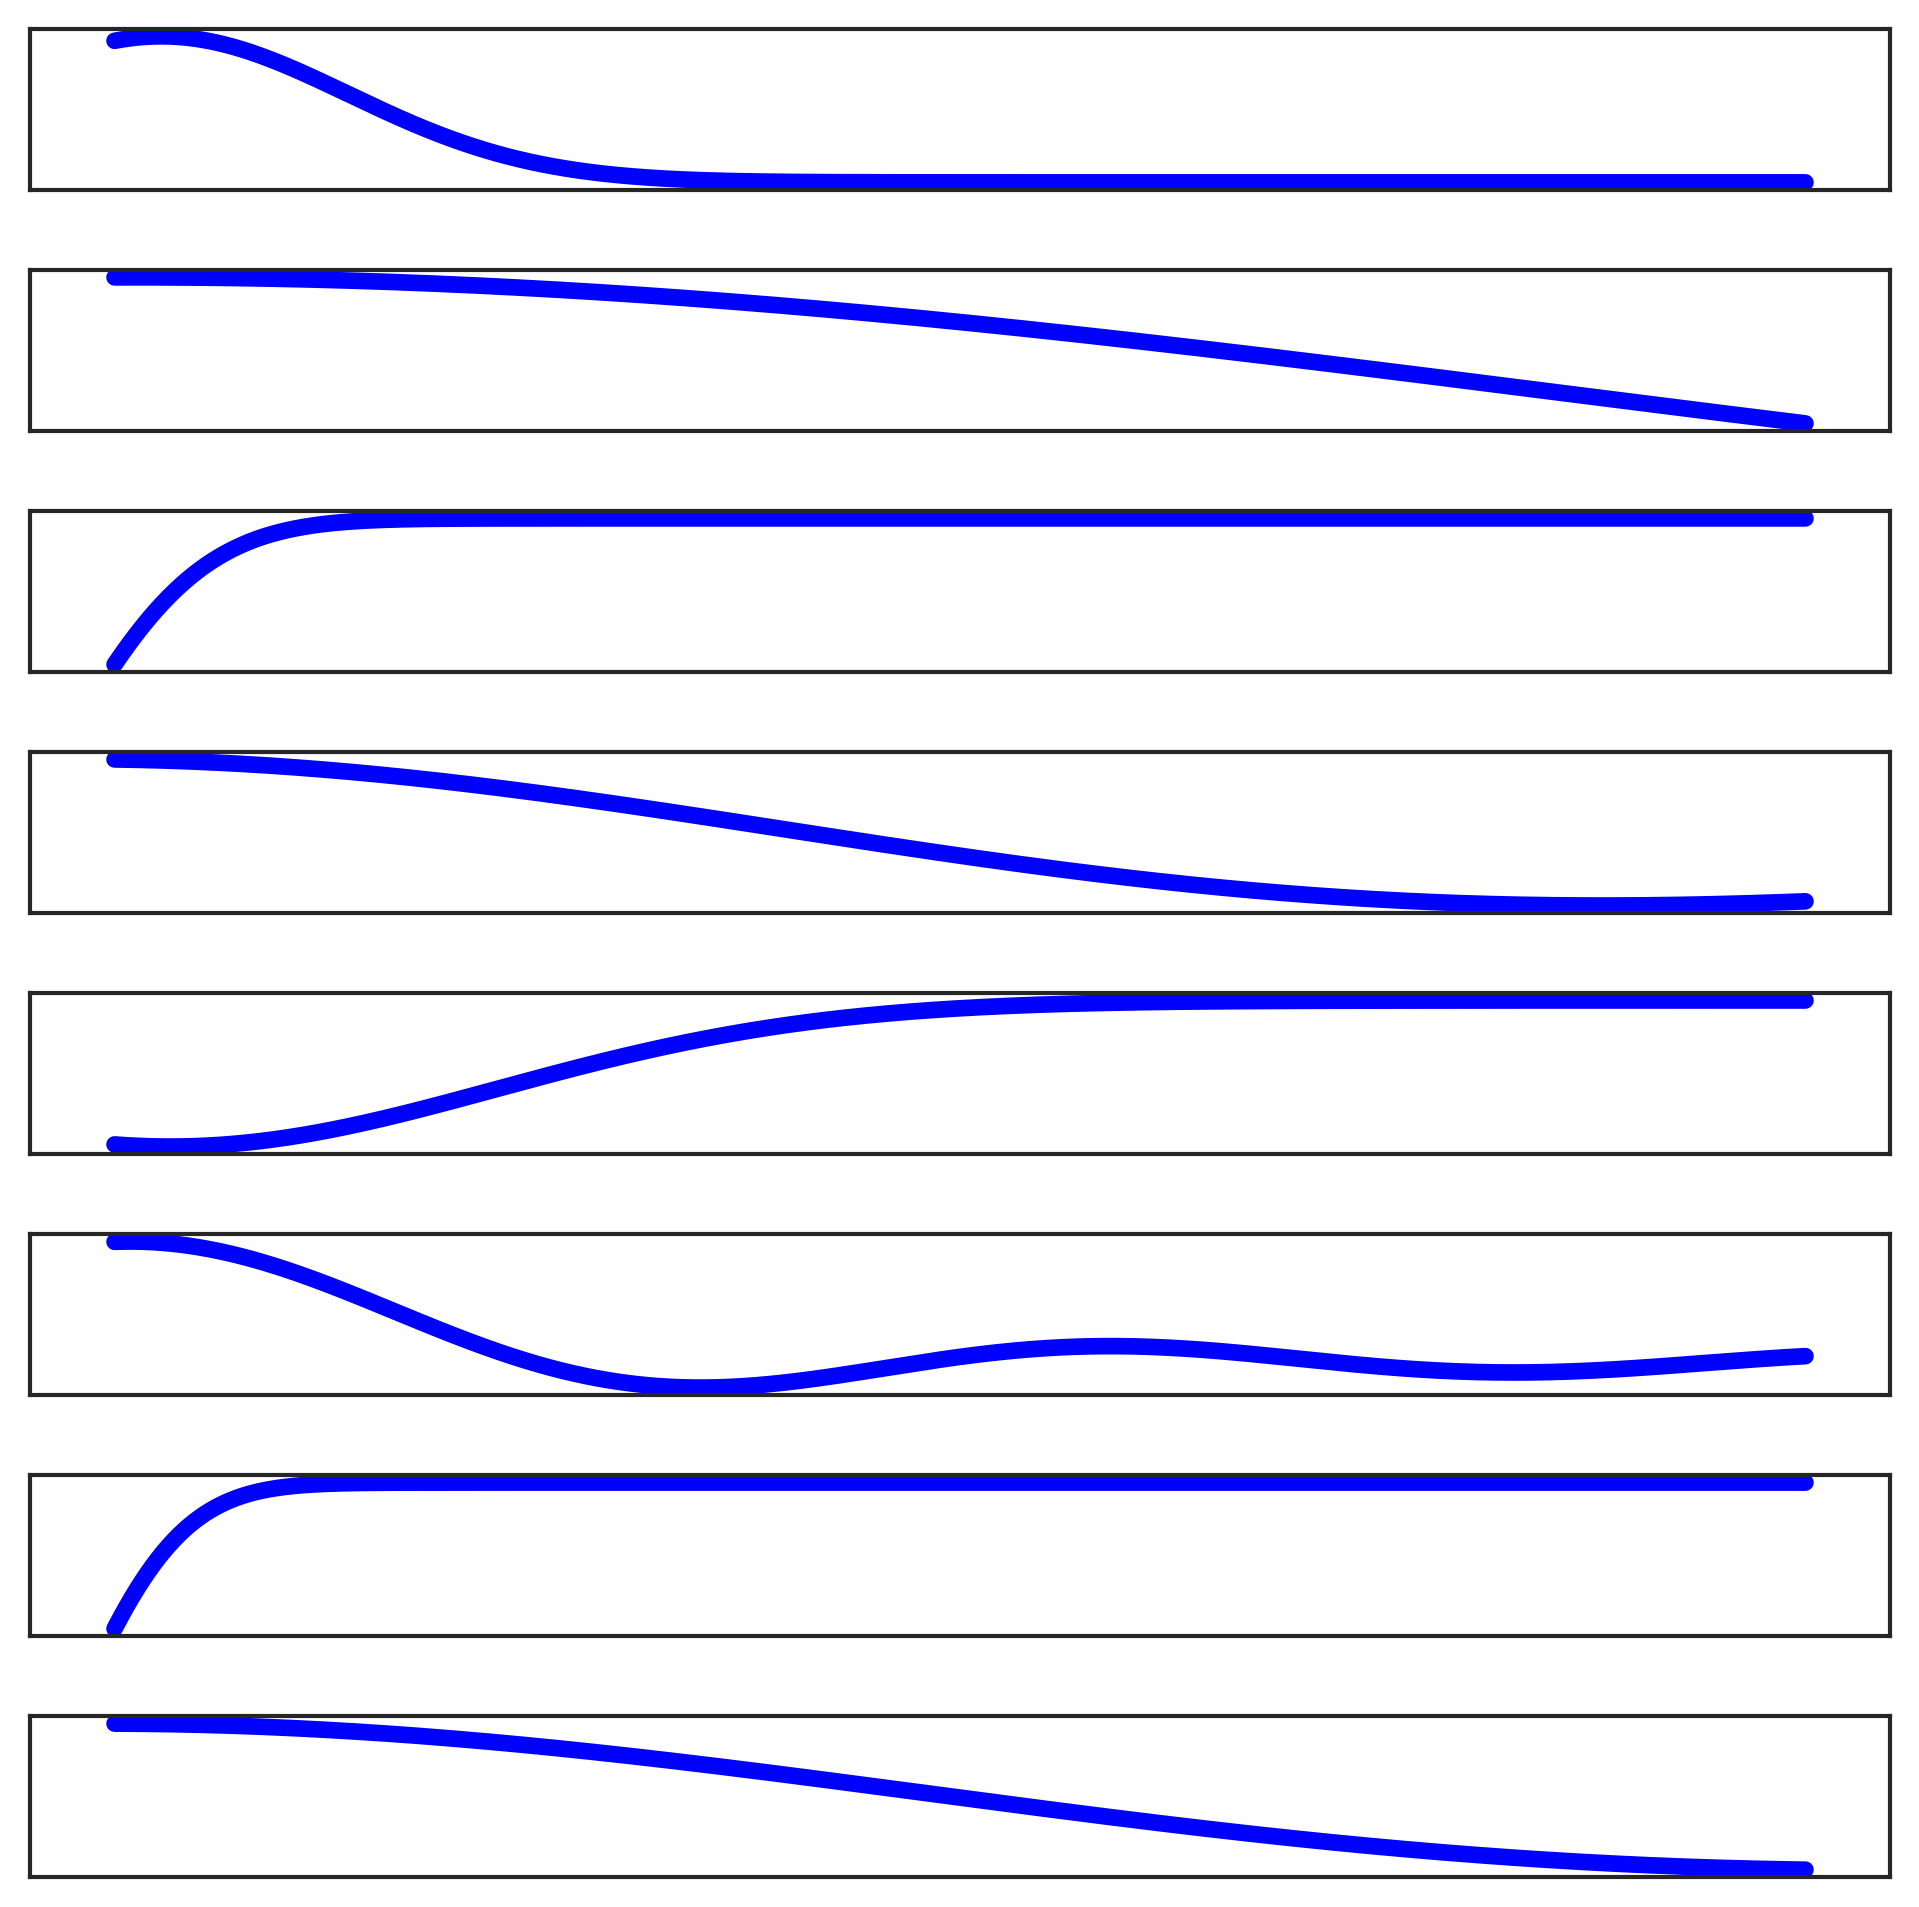

In [30]:
layers = exp.args['expert_layer']
scales = exp.args['scale'] 


for layer in range(layers):
    fig, axs = plt.subplots(nrows=scales*2, ncols=1, figsize=(4, 4))
    for scale in range(scales):

        weight = exp.net.symbolic_transform_layer[layer].learnable_param[scale].weight
        x = exp.net.symbolic_transform_layer[layer].learnable_param[scale].x
        axs[scale].plot(x.cpu().detach().numpy(),weight.cpu().detach().numpy(),
                        linewidth=2, color='blue')
        # if scale == scales*2-1:
        #     axs[scale].set_xticks(np.arange(0, 0.51, 0.1))
 
        # else:
        #     axs[scale].set_xticks([])
        # 没有框
        
        axs[scale].set_xticks([])
        axs[scale].set_yticks([])
        
        ###########          
        # axs[scale].set_le
        # axs[scale].set_title(f'layer {layer}, scale {scale}')
        scale = scale + scales
        weight = exp.net.symbolic_transform_layer[layer].learnable_param[scale].weight
        x = exp.net.symbolic_transform_layer[layer].learnable_param[scale].x
        axs[scale].plot(x.cpu().detach().numpy(),weight.cpu().detach().numpy(),
                        linewidth=2, color='blue')
        
        axs[scale].set_xticks([])
        axs[scale].set_yticks([])        
        
        # if scale == scales*2-1:
        #     axs[scale].set_xticks(np.arange(0, 0.51, 0.1))
 
        # else:
        #     axs[scale].set_xticks([])        
            
        # axs[scale].set_title(f'layer {layer}, scale {scale}')        
    # fig.text(0.5, 0.04, 'Normlized Frequency', ha='center', va='center')
    # fig.text(0.06, 0.5, 'Amplitude', ha='center', va='center', rotation='vertical')
    plt.subplots_adjust(hspace=0.5)
    plt.savefig(f'layer_{layer}_filter', transparent=True,dpi=512)
    plt.savefig(f'layer_{layer}_filter.svg', transparent=True,dpi=512)     
    plt.show()


In [63]:
weight = exp.net.symbolic_transform_layer[0].learnable_param[0].weight

## 5信号可视化

4. 设置hook 提取x 

In [20]:
from typing import Dict, Iterable, Callable
from torch import nn, Tensor
class FeatureExtractor(nn.Module):
    def __init__(self, model: nn.Module, layers: Iterable[str]):
        super().__init__()
        self.model = model
        self.layers = layers
        self._features = {layer: torch.empty(0) for layer in layers}

        for layer_id in layers:
            layer = dict([*self.model.named_modules()])[layer_id]
            layer.register_forward_hook(self.save_outputs_hook(layer_id))

    def save_outputs_hook(self, layer_id: str) -> Callable:
        def fn(_, __, output):
            self._features[layer_id] = output
        return fn

    def forward(self, x: Tensor) -> Dict[str, Tensor]:
        _ = self.model(x)
        return self._features

In [9]:
# exp.net.state_dict

<bound method Module.state_dict of DFN(
  (symbolic_transform_layer): ModuleList(
    (0): neural_symbolc_base(
      (learnable_param): ModuleList(
        (0): frequency_operation()
        (1): frequency_operation()
        (2): frequency_operation()
        (3): frequency_operation()
        (4): frequency_operation()
        (5): frequency_operation()
        (6): frequency_operation()
        (7): frequency_operation()
        (8): frequency_operation()
        (9): frequency_operation()
        (10): frequency_operation()
        (11): frequency_operation()
        (12): frequency_operation()
        (13): frequency_operation()
        (14): frequency_operation()
        (15): frequency_operation()
        (16): frequency_operation()
        (17): frequency_operation()
        (18): frequency_operation()
        (19): frequency_operation()
        (20): frequency_operation()
        (21): frequency_operation()
        (22): frequency_operation()
        (23): frequency_operation

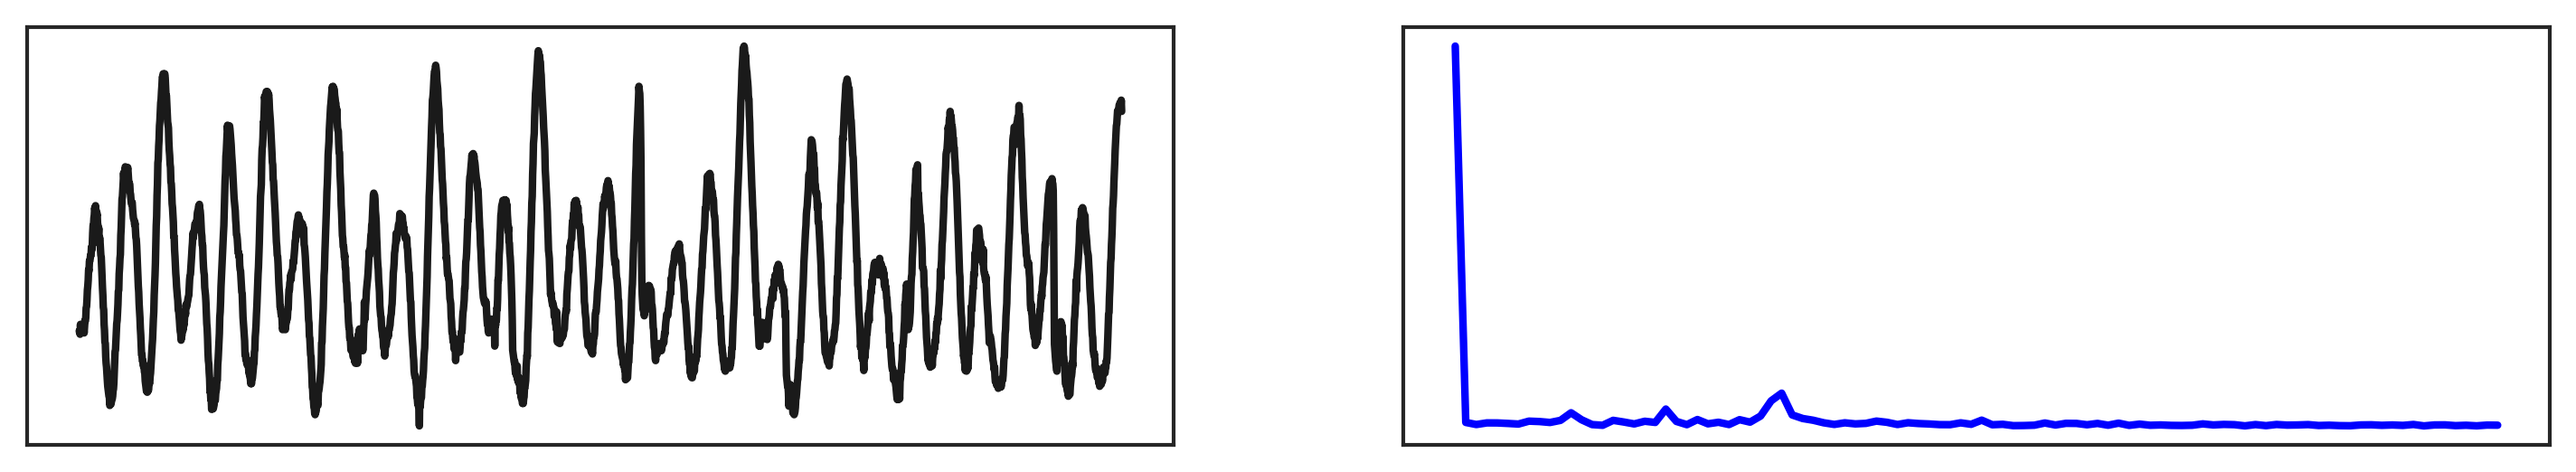

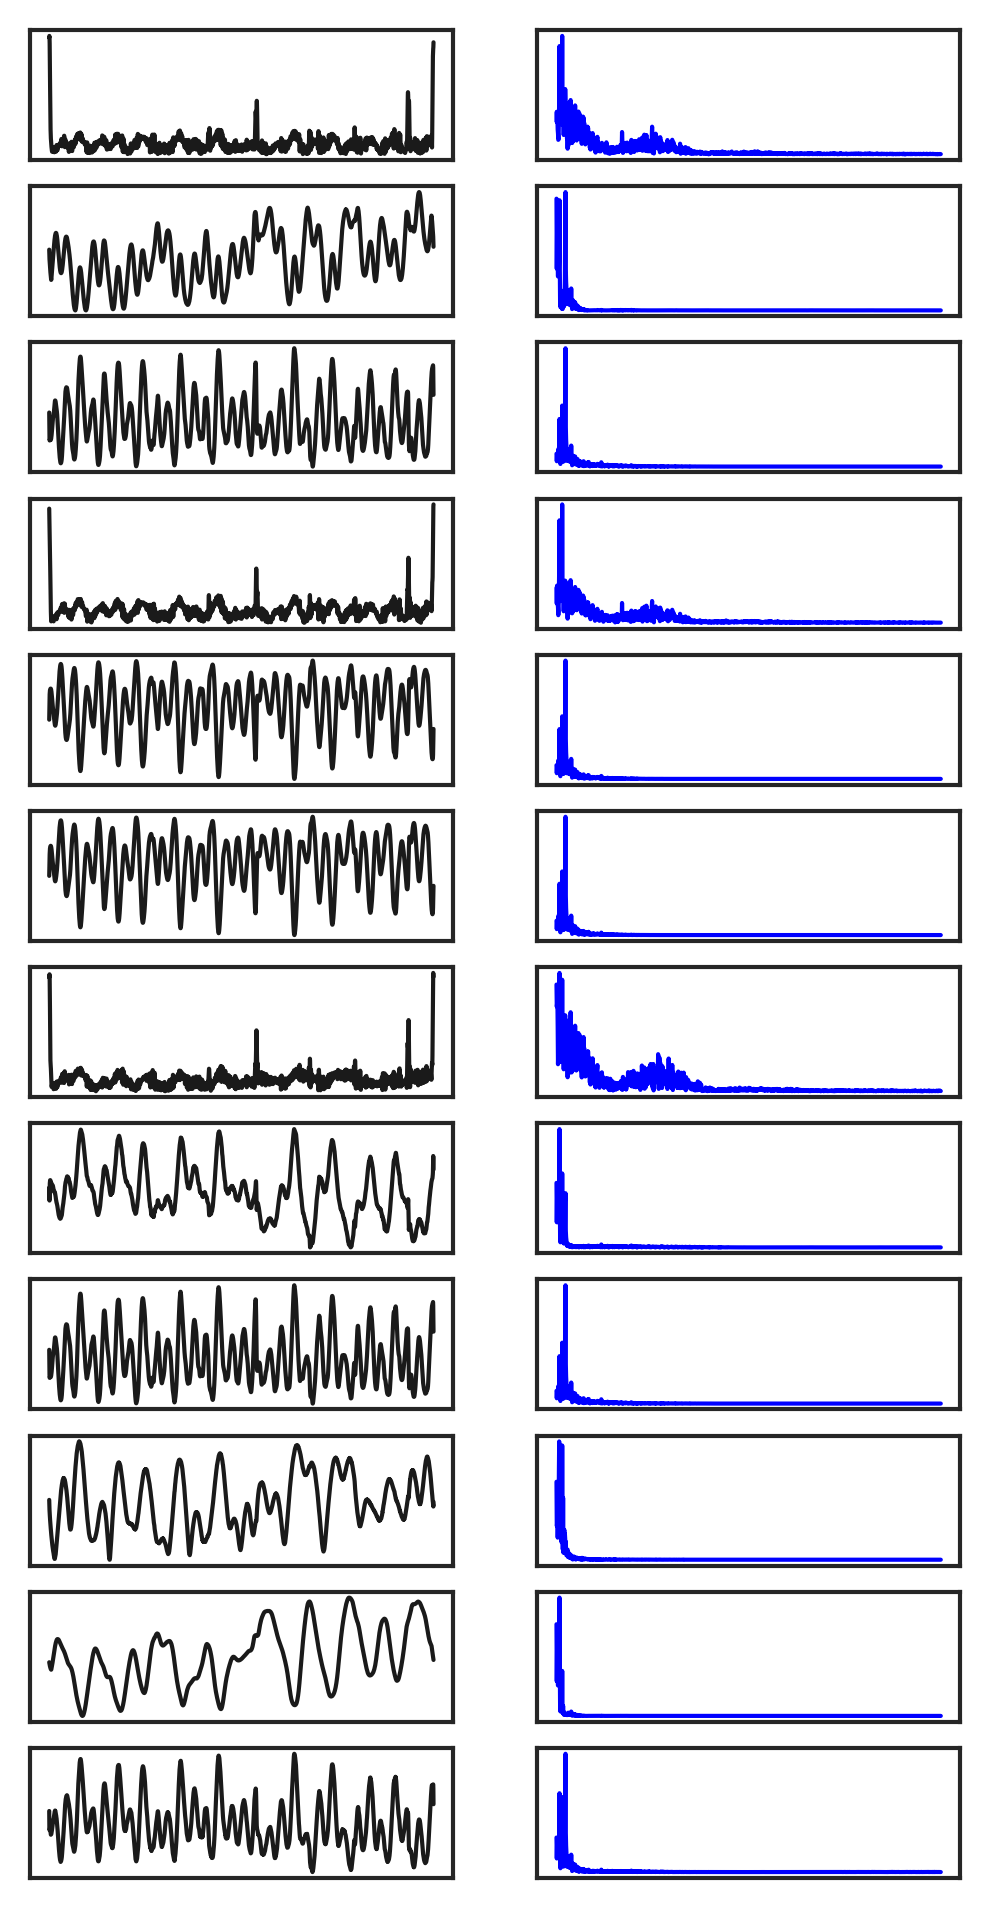

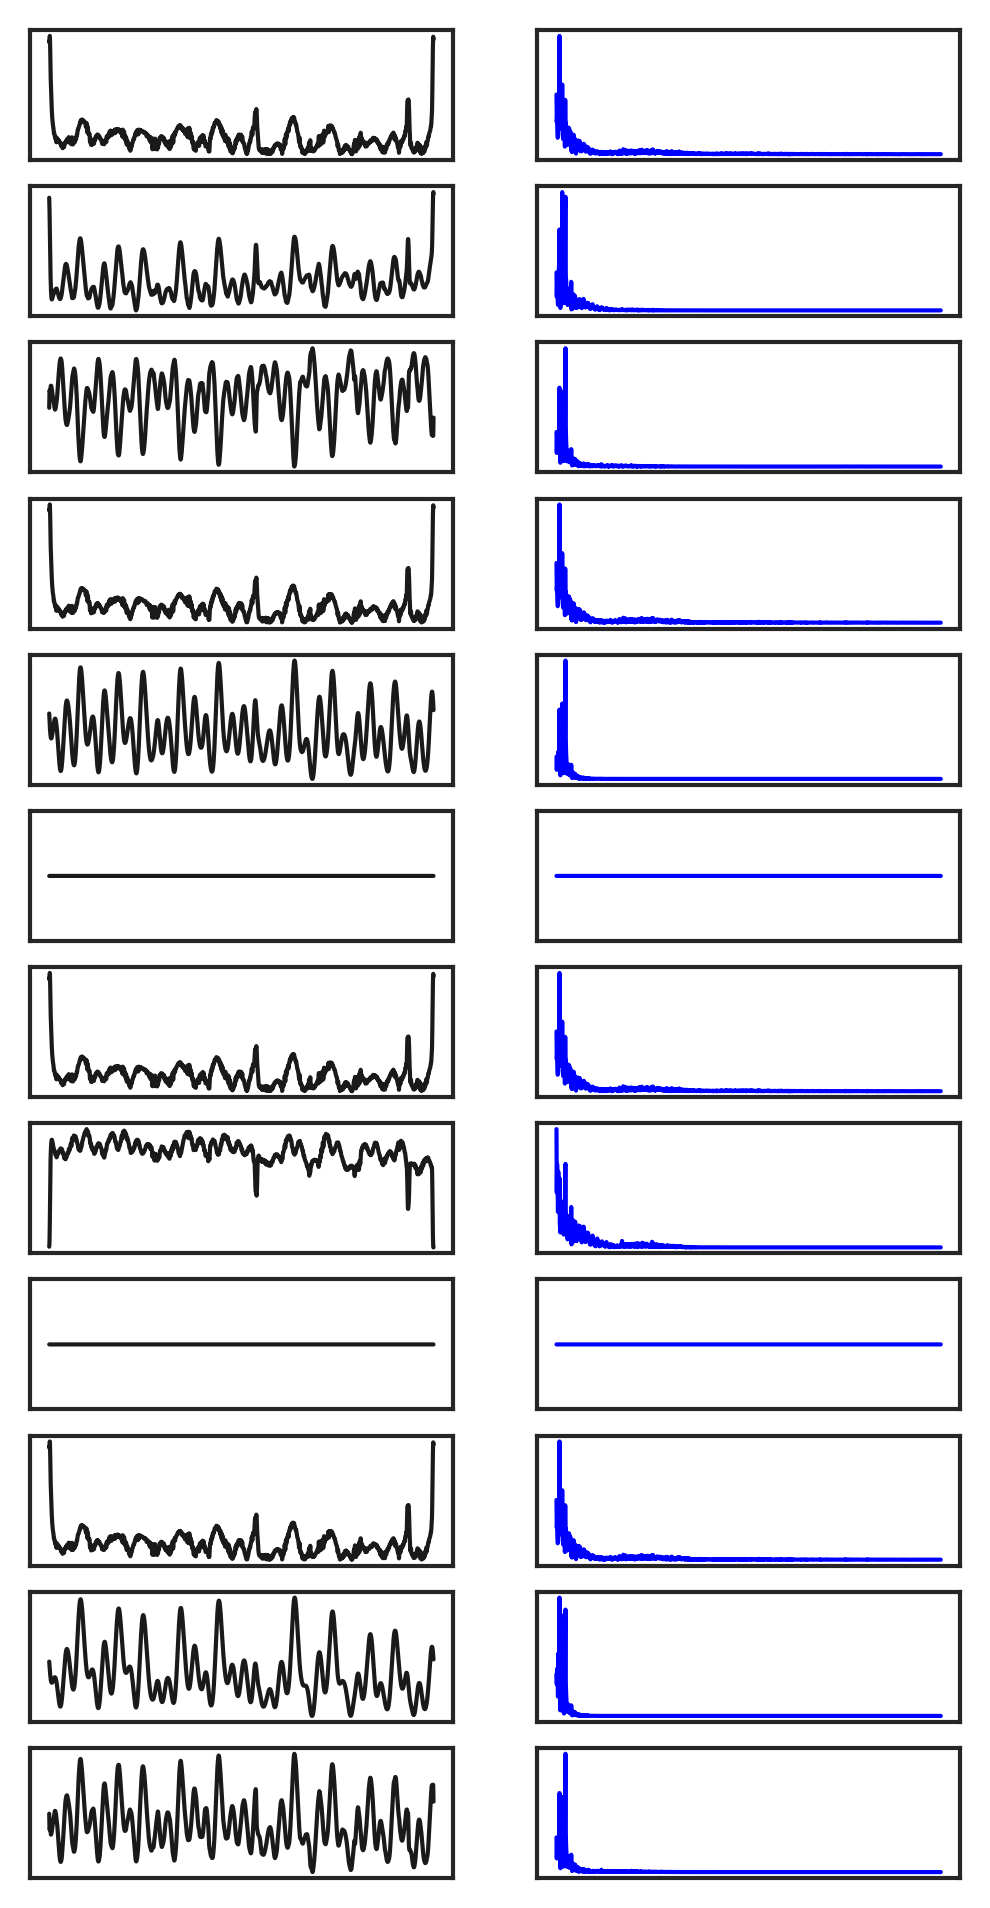

wandb: Network error (ConnectionError), entering retry loop.
wandb: ERROR Dropped streaming file chunk (see wandb/debug-internal.log)
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ConnectionError), entering retry loop.
wandb: Network error (ReadTimeout), entering retry loop.


In [33]:
resnet_features = FeatureExtractor(exp.net, layers=["symbolic_transform_layer.0",
                                                    "symbolic_transform_layer.1",
                                                    "symbolic_transform_layer.2",
                                                    ])


num = 121
x0 = testx[num-1:num].cuda()
features = resnet_features(x0)
features.values()

###### original signal  #######


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(6, 1))
time_signal = x0.cpu().detach().numpy().squeeze()
length = len(time_signal)
fre_signal = np.fft.fft(time_signal)[:length//2]
fre_signal = np.abs(fre_signal)
axs[0].plot(time_signal,linewidth=1)
axs[1].plot(fre_signal[:100],linewidth=1,color='blue')

axs[0].set_xticks([])
axs[0].set_yticks([]) 
axs[1].set_xticks([])
axs[1].set_yticks([])
        
plt.savefig(f'signal{num}.png', transparent=True,dpi=512)
plt.savefig(f'signal{num}.svg', transparent=True,dpi=512)     
plt.show()

layers = exp.args['expert_layer']
scales = exp.args['scale'] 

for name, output in features.items():
# for layer in range(layers):
    fig, axs = plt.subplots(nrows=scales*3, ncols=2, figsize=(2, 4))
    for scale in range(scales*3):
        time_signal = output[0,scale,:].cpu().detach().numpy().squeeze()
        length = len(time_signal)
        fre_signal = np.fft.fft(time_signal)[:length//2]
        fre_signal = np.abs(fre_signal)
        axs[scale,0].plot(time_signal,linewidth=0.5)
        axs[scale,1].plot(fre_signal[1:],linewidth=0.5,color='blue')
        
        axs[scale,0].set_xticks([])
        axs[scale,0].set_yticks([]) 
        axs[scale,1].set_xticks([])
        axs[scale,1].set_yticks([])
            
    plt.savefig(f'x{name}signal{num}.png', transparent=True,dpi=512)
    plt.savefig(f'x{name}signal{num}.svg', transparent=True,dpi=512)     
    plt.show()


In [36]:
features['symbolic_transform_layer.0'].shape

torch.Size([1, 12, 2560])

In [46]:
weight = state_dict['symbolic_transform_layer.1.channel_conv.weight']
maxvalue = torch.max(weight)


In [138]:
# for k, v in state_dict.items():
#     print(k)
#     print(v.shape)
#     print('###################')


symbolic_transform_layer.0.channel_conv.weight_orig
torch.Size([48, 1, 1])
###################
symbolic_transform_layer.0.channel_conv.weight_mask
torch.Size([48, 1, 1])
###################
symbolic_transform_layer.0.down_conv.weight_orig
torch.Size([48, 1, 1])
###################
symbolic_transform_layer.0.down_conv.weight_mask
torch.Size([48, 1, 1])
###################
symbolic_transform_layer.1.channel_conv.weight_orig
torch.Size([48, 48, 1])
###################
symbolic_transform_layer.1.channel_conv.weight_mask
torch.Size([48, 48, 1])
###################
symbolic_transform_layer.1.down_conv.weight_orig
torch.Size([48, 48, 1])
###################
symbolic_transform_layer.1.down_conv.weight_mask
torch.Size([48, 48, 1])
###################
symbolic_transform_layer.2.channel_conv.weight_orig
torch.Size([48, 48, 1])
###################
symbolic_transform_layer.2.channel_conv.weight_mask
torch.Size([48, 48, 1])
###################
symbolic_transform_layer.2.down_conv.weight_orig
torch.S

In [116]:
import os
os.getcwd()

'/home/richie_thu/_Richie_project/Deep symbolic net/rul prediction/save_dir'

## 6 特征可视化

## 7 核密度估计

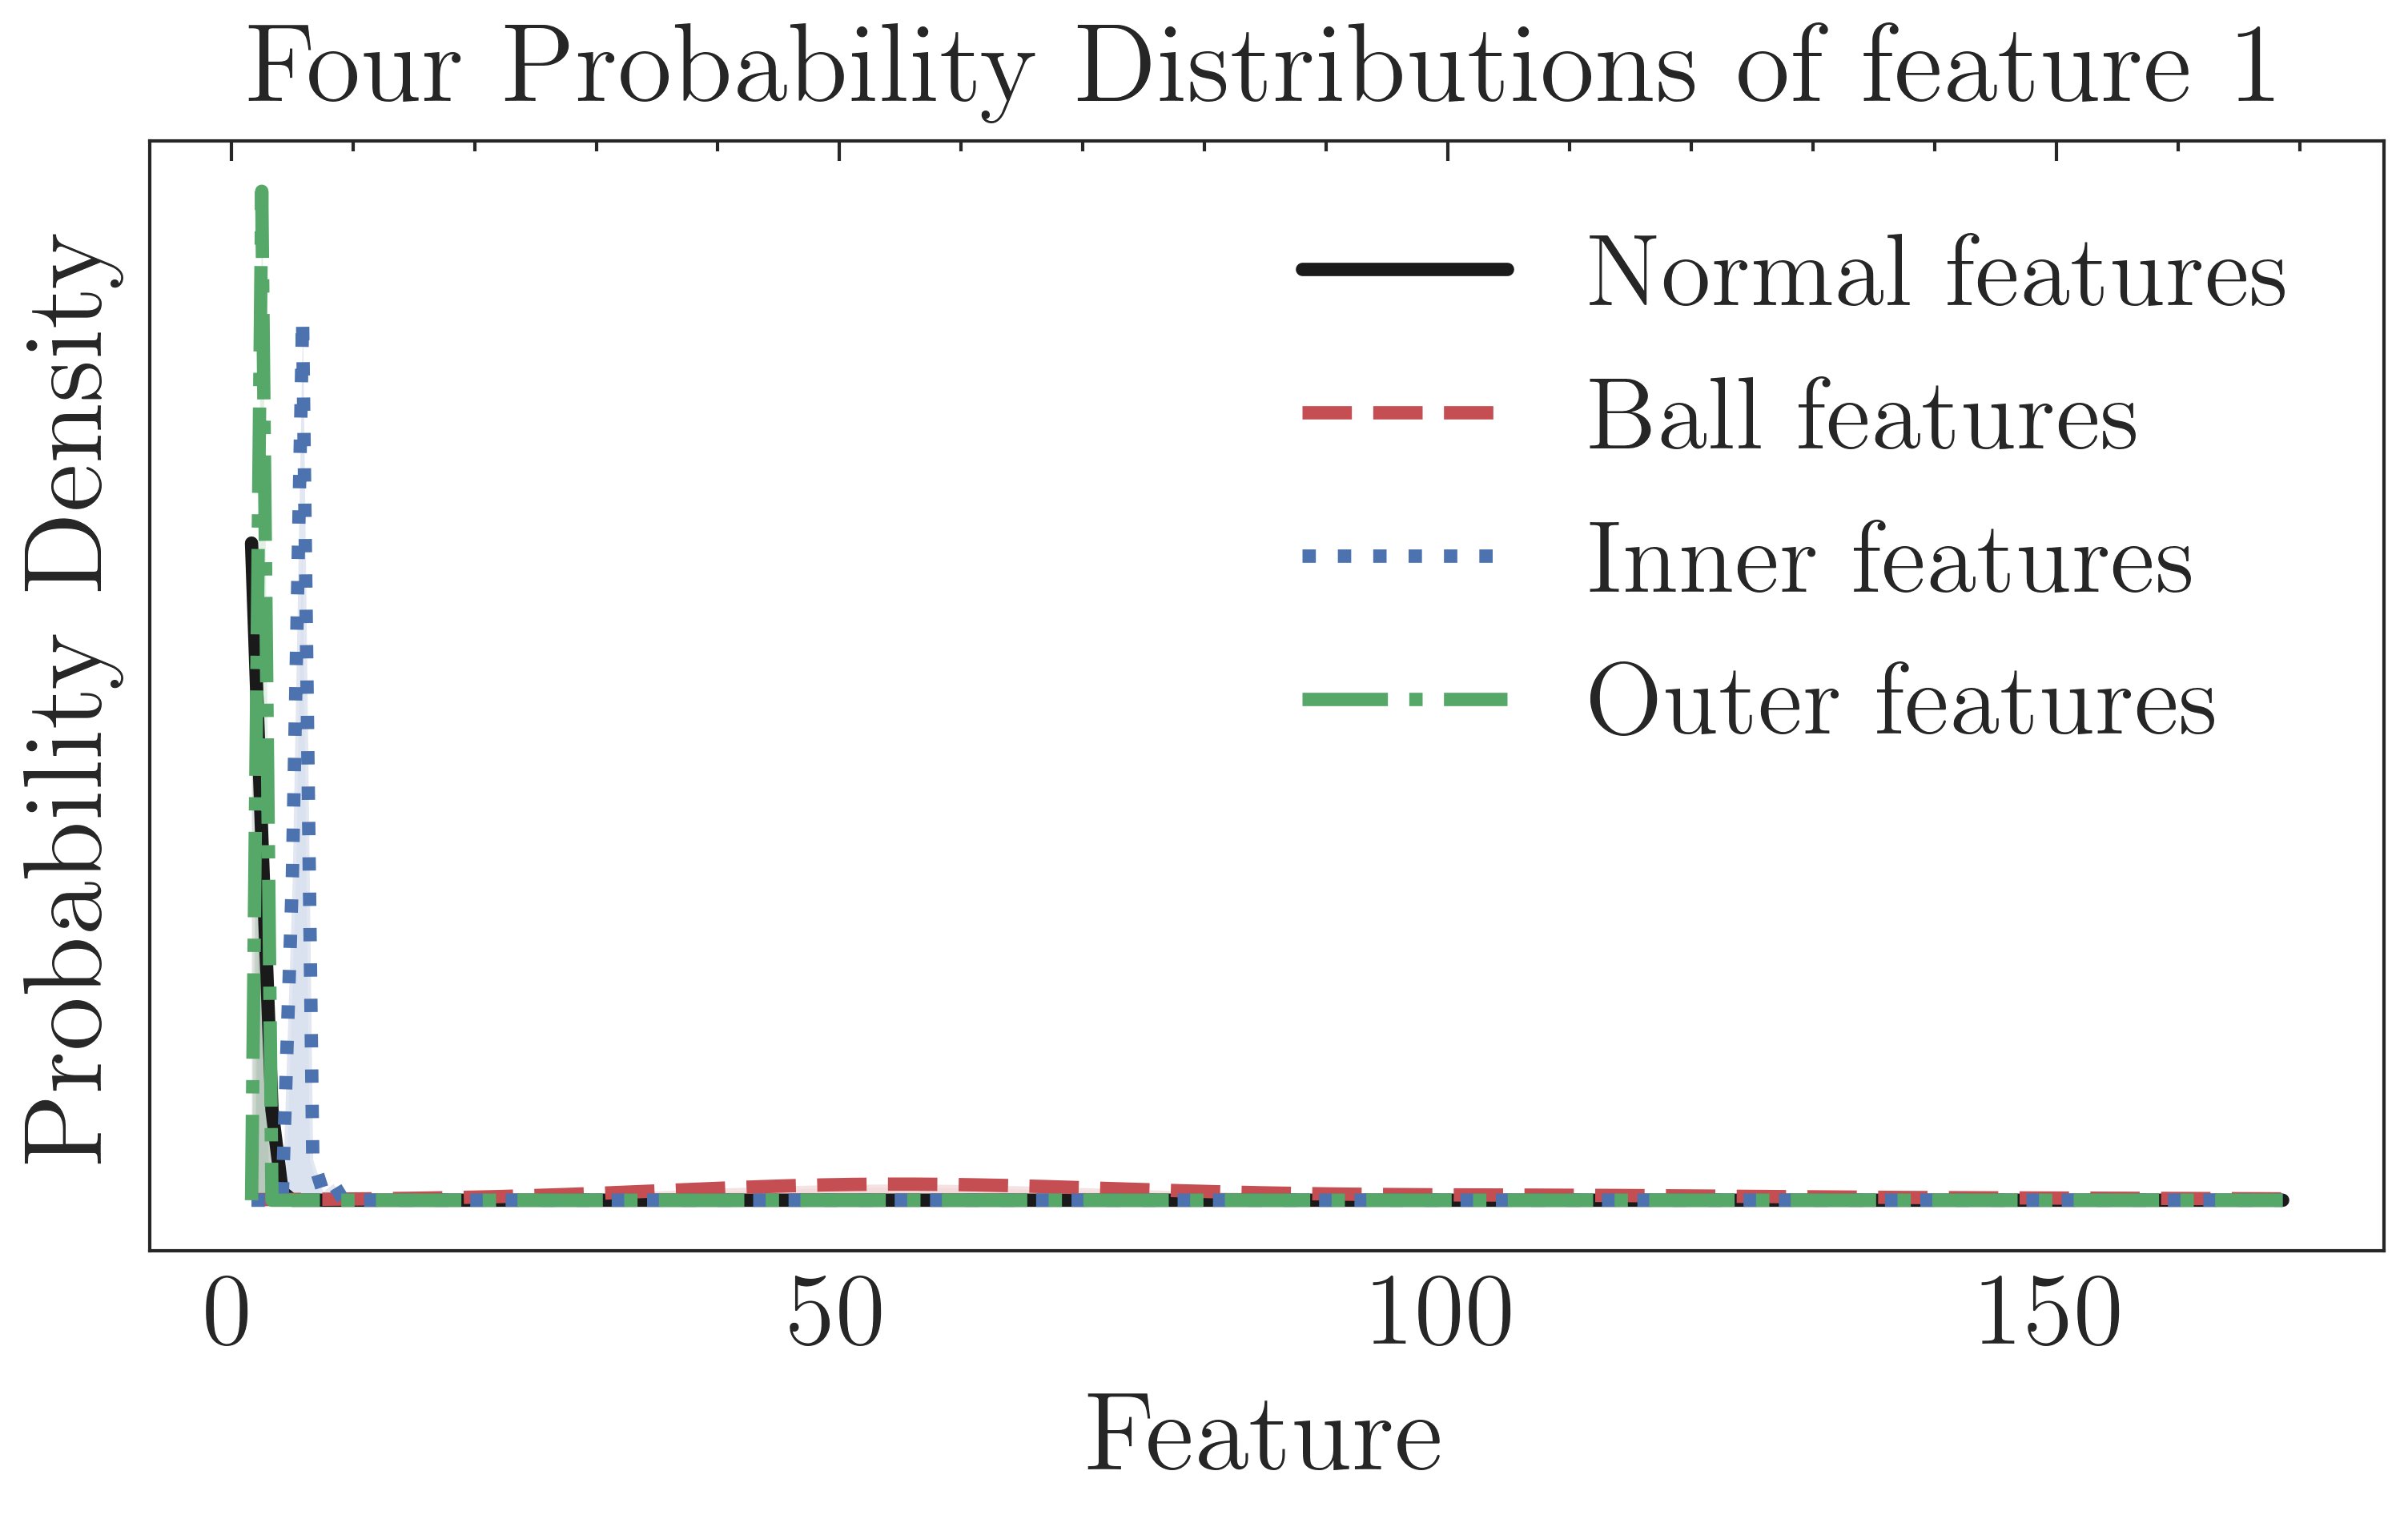

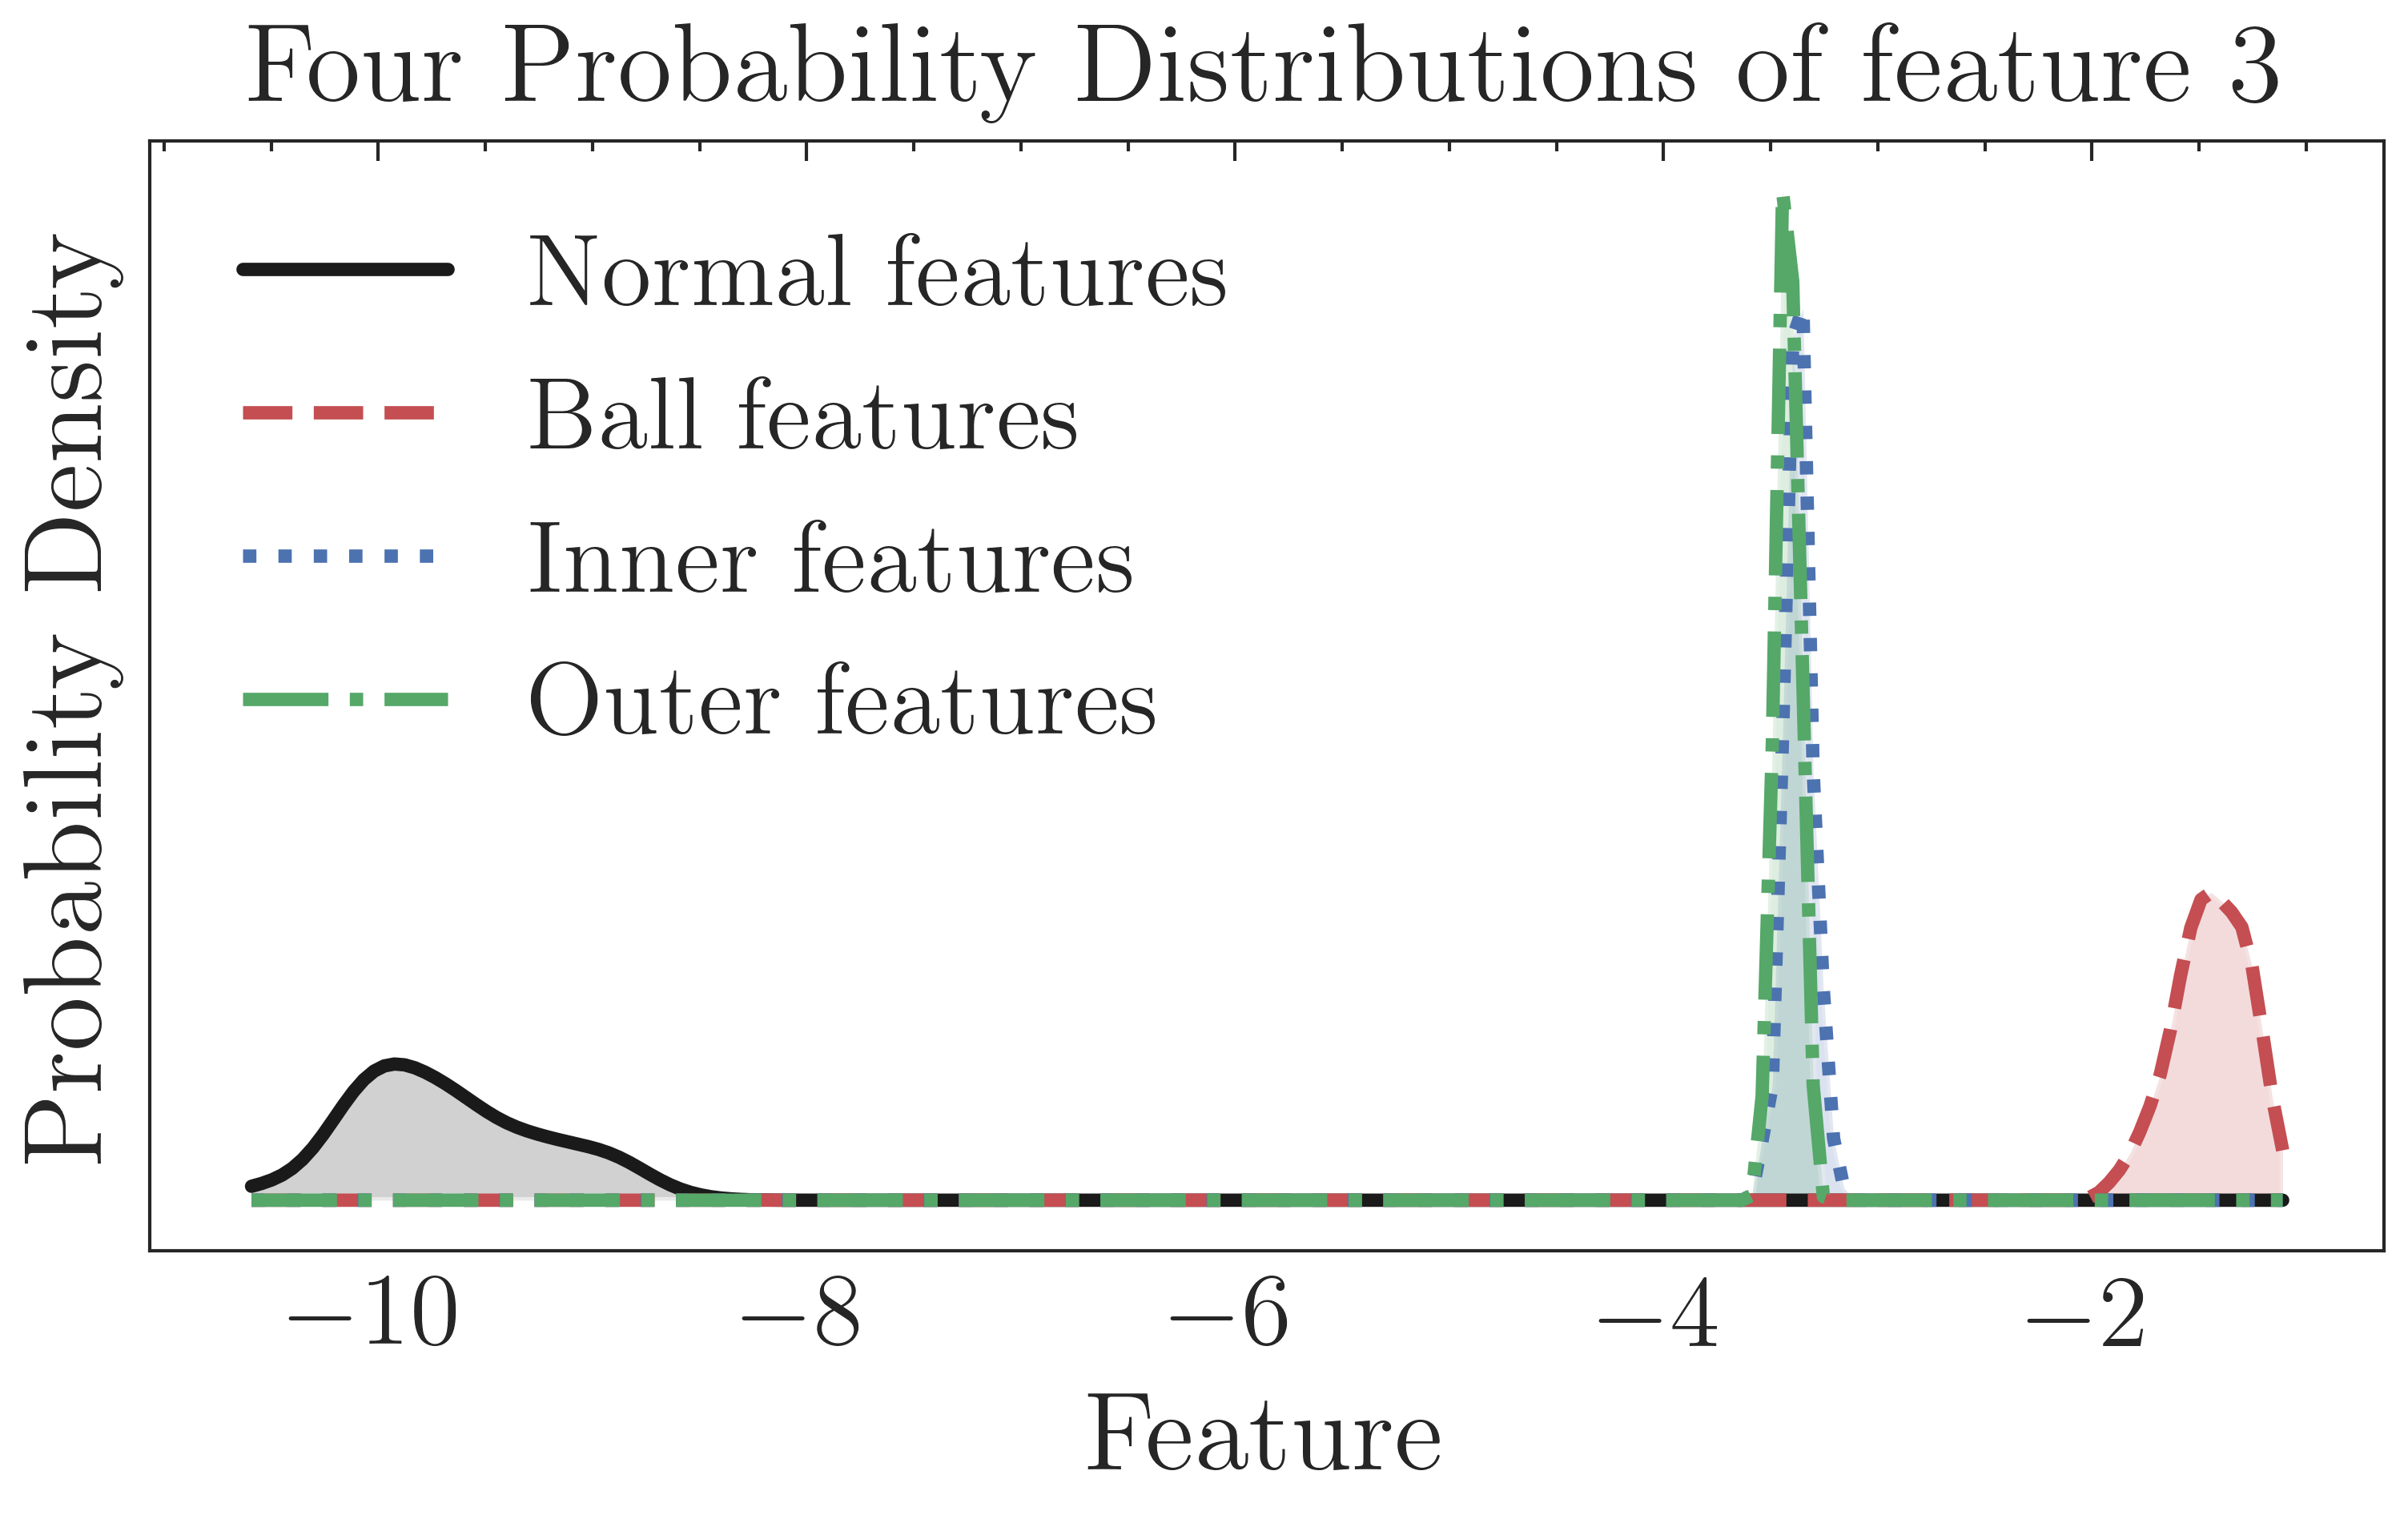

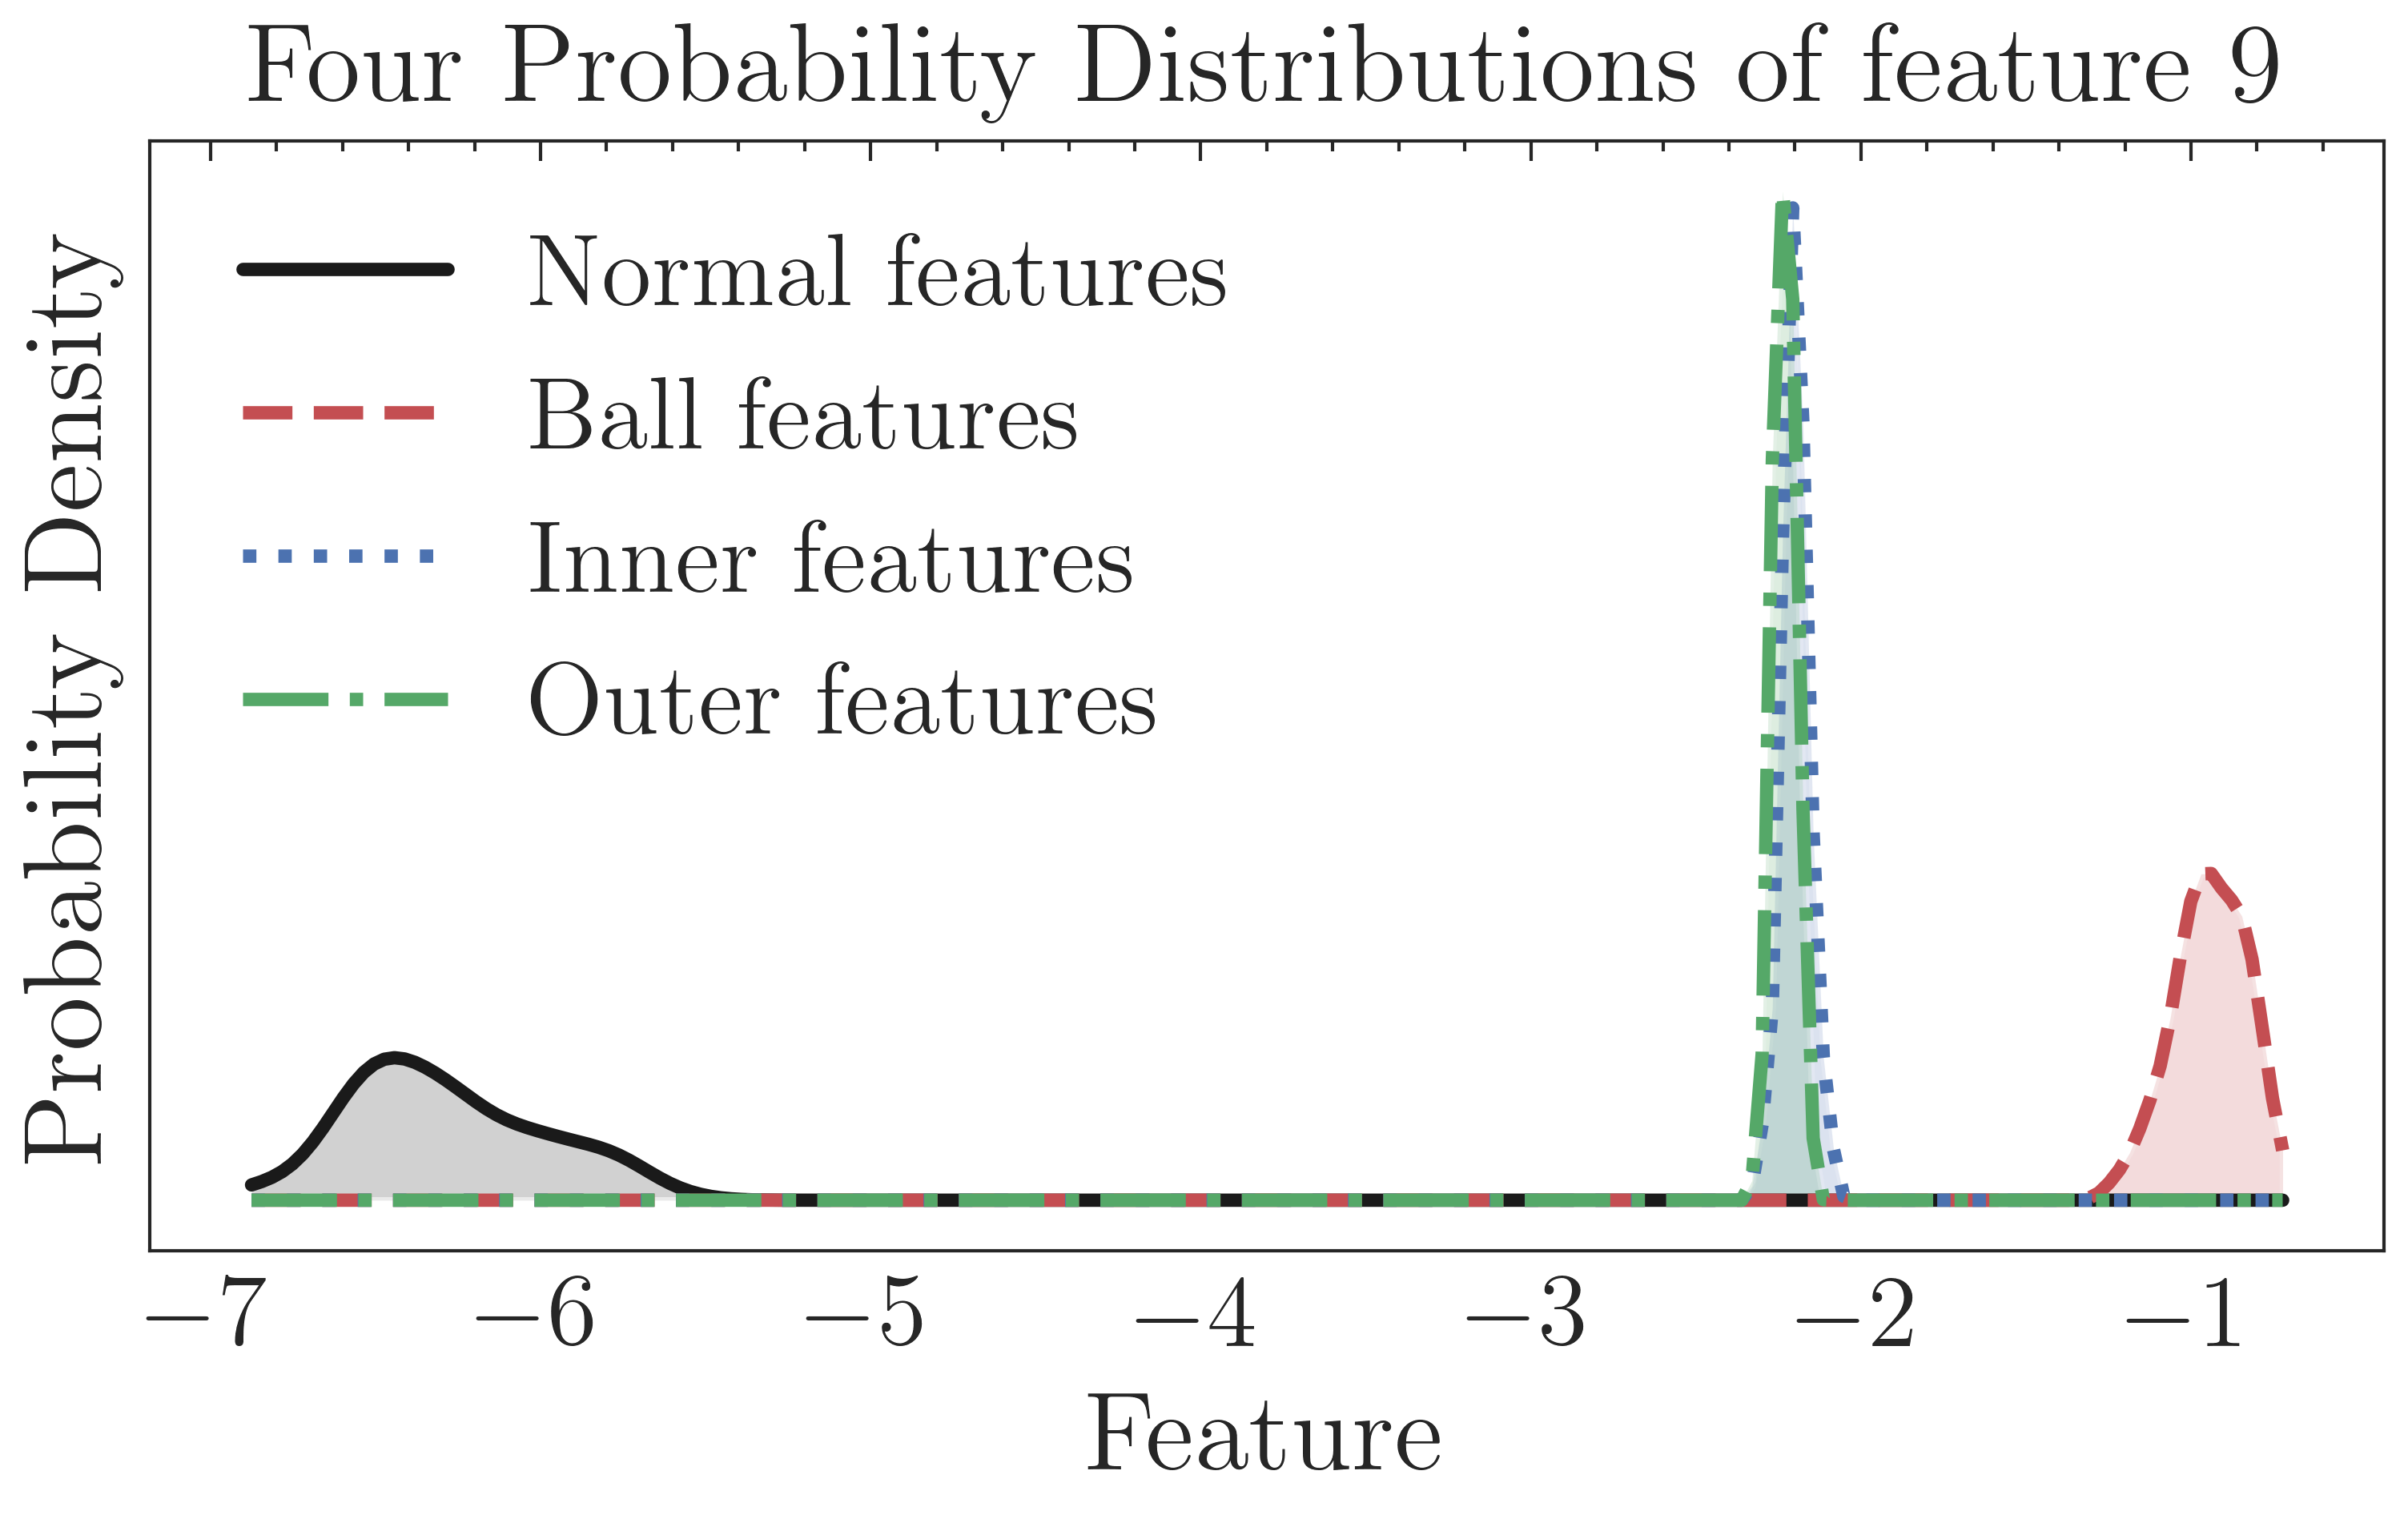

In [58]:
from scipy.stats import gaussian_kde

name = "symbolic_feature_layer.0"

resnet_features1 = FeatureExtractor(exp.net, layers=[name,
                                                    ])

fetures = resnet_features1(testx.cuda())[name]

normal_features = fetures[:100]
ball_features = fetures[100:200]
inner_features = fetures[200:300]
outer_features = fetures[300:400]



## 取到信号

normal_features = normal_features.cpu().detach().numpy().squeeze() 
ball_features = ball_features.cpu().detach().numpy().squeeze()  #
inner_features = inner_features.cpu().detach().numpy().squeeze()
outer_features = outer_features.cpu().detach().numpy().squeeze()

feature_num = normal_features.shape[1]

for i in range(feature_num):
# 计算四组数据的核密度估计
    kde1 = gaussian_kde(normal_features[:,i])
    kde2 = gaussian_kde(ball_features[:,i])
    kde3 = gaussian_kde(inner_features[:,i])
    kde4 = gaussian_kde(outer_features[:,i])

    # 生成横坐标
    xmin = min(normal_features[:,i].min(), ball_features[:,i].min(), inner_features[:,i].min(), outer_features[:,i].min())
    xmax = max(normal_features[:,i].max(), ball_features[:,i].max(), inner_features[:,i].max(), outer_features[:,i].max())
    
    x = np.linspace(xmin, xmax, 200)

    # 画图
    plt.figure(figsize=(6, 3))
    plt.plot(x, kde1(x), label='Normal features', linewidth=2)
    plt.plot(x, kde2(x), label='Ball features', linewidth=2)
    plt.plot(x, kde3(x), label='Inner features', linewidth=2)
    plt.plot(x, kde4(x), label='Outer features', linewidth=2)
    plt.legend()
    plt.title(f'Four Probability Distributions of feature {i}')
    plt.xlabel('Feature')
    plt.ylabel('Probability Density')
    
    # plt.xticks([])
    plt.yticks([]) 

    plt.fill_between(x, kde1(x), alpha=0.2)
    plt.fill_between(x, kde2(x), alpha=0.2)
    plt.fill_between(x, kde3(x), alpha=0.2)
    plt.fill_between(x, kde4(x), alpha=0.2)
    plt.savefig(f'feature{i}.png', transparent=True,dpi=512)
    plt.savefig(f'feature{i}.svg', transparent=True,dpi=512)
    plt.show()
    


In [43]:
kde1

AttributeError: 'gaussian_kde' object has no attribute 'mean'

In [14]:
exp.net.parameters

<bound method Module.parameters of DFN(
  (symbolic_transform_layer): ModuleList(
    (0): neural_symbolc_base(
      (learnable_param): ModuleList(
        (0): frequency_operation()
        (1): frequency_operation()
        (2): frequency_operation()
        (3): frequency_operation()
        (4): frequency_operation()
        (5): frequency_operation()
        (6): frequency_operation()
        (7): frequency_operation()
      )
      (filter_op): frequency_operation()
      (In): InstanceNorm1d(1, eps=1e-05, momentum=0.1, affine=False, track_running_stats=False)
      (channel_conv): Conv1d(1, 12, kernel_size=(1,), stride=(1,), bias=False)
      (down_conv): Conv1d(1, 12, kernel_size=(1,), stride=(1,), bias=False)
    )
    (1): neural_symbolc_base(
      (learnable_param): ModuleList(
        (0): frequency_operation()
        (1): frequency_operation()
        (2): frequency_operation()
        (3): frequency_operation()
        (4): frequency_operation()
        (5): frequency_